<a href="https://colab.research.google.com/github/PrajsPrabs/UpgradBACaseStudy/blob/main/EComm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1646]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [1647]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")


# Data Understanding

In [1648]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")

In [1649]:
# EleData.info()
print(EleData[['product_analytic_sub_category']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))



   product_analytic_sub_category       0
12             AmplifierReceiver    4056
10                AudioAccessory   11713
6                 AudioMP3Player  112892
7                         Camera  101172
1                CameraAccessory  239508
9                  CameraStorage   17985
5                           Game  114406
13           GameMembershipCards      97
2                GamingAccessory  201899
8                  GamingConsole   29059
4                      HomeAudio  124860
11                   HomeTheatre    4254
0                        Speaker  543928
3                   TVVideoSmall  142995


In [1650]:
## correct the datatypes
EleData['order_date']=pd.to_datetime(EleData['order_date'])
EleData['Year']=EleData['Year'].astype(str)
EleData['Month']=EleData['Month'].astype(str)

In [1651]:
##  MMM is on subcategories : 'Camera','HomeAudio','GamingAccessory' hence dropping other rows
EleData.product_analytic_sub_category.value_counts()
EleData = EleData.loc[EleData.product_analytic_sub_category.isin(['Camera','HomeAudio','GamingAccessory'])]
EleData.product_analytic_sub_category.value_counts()


GamingAccessory    201899
HomeAudio          124860
Camera             101172
Name: product_analytic_sub_category, dtype: int64

In [1652]:
print(EleData[['product_analytic_sub_category','product_analytic_vertical']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))


   product_analytic_sub_category product_analytic_vertical      0
21                        Camera                Camcorders    987
17                        Camera           SportsAndAction   2261
16                        Camera           Instant Cameras   2569
4                         Camera             Point & Shoot  38740
3                         Camera                      DSLR  56615
31               GamingAccessory          GameControlMount      1
28               GamingAccessory                 GamingGun      5
27               GamingAccessory                CoolingPad     46
26               GamingAccessory     GamingChargingStation     47
22               GamingAccessory             GamingSpeaker    500
20               GamingAccessory          MotionController   1183
15               GamingAccessory       JoystickGamingWheel   2863
13               GamingAccessory             GamingAdapter   3232
11               GamingAccessory            GamingMousePad   4887
10        

In [1653]:
## dates between July 2015 to June 2016
EleData=EleData.loc[(EleData.order_date >= '2015-07-01') &(EleData.order_date<'2016-07-01')]

In [1654]:
EleData.describe()

order_id  order_item_id          units            sla  \
count  4.277750e+05   4.277750e+05  427775.000000  427775.000000   
mean   2.845230e+15   1.321295e+16       1.021941       5.469492   
std    1.268358e+15   5.458201e+16       0.222356       2.658440   
min    1.528676e+08   2.072001e+08       1.000000       0.000000   
25%    1.600075e+15   1.603993e+15       1.000000       4.000000   
50%    2.611817e+15   2.618906e+15       1.000000       5.000000   
75%    3.610341e+15   4.397844e+15       1.000000       7.000000   
max    4.641665e+15   3.000373e+17      19.000000      60.000000   

         product_mrp  product_procurement_sla  
count  427775.000000            427775.000000  
mean     8297.878123                 2.578220  
std     13781.504587                 1.960068  
min         0.000000                -1.000000  
25%       900.000000                 1.000000  
50%      2000.000000                 2.000000  
75%      6900.000000                 3.000000  
max    280000.000000                15.000000

In [1655]:
## removing duplicate order items records
EleData= EleData.drop_duplicates(subset=["order_id","order_item_id"],keep='first')

In [1656]:
# EleData.info()
Ele_obj_columns=[]
for i in EleData.columns:
  if EleData[i].dtype=='object':
    Ele_obj_columns.append(i)

In [1657]:
## removing duplicates using strip and lower and keep first instance
Ele_obj_columns
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.strip())
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.lower())
EleData= EleData.drop_duplicates(keep='first')
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

In [1658]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

# Data Cleaning

In [1659]:
EleData.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [1660]:
## Year and Month

print(EleData.Year.value_counts())
print(EleData.Month.value_counts())

2016    217241
2015    179448
Name: Year, dtype: int64
10    52752
12    43314
1     41236
2     39987
3     38840
5     37301
11    35110
4     31092
6     28785
9     25571
7     22667
8        34
Name: Month, dtype: int64


In [1661]:
## gmv
# EleData.gmv.isna().sum()
# print(EleData.loc[EleData.gmv==''].count())
# # # trying to impute using mrp
EleData=EleData[(EleData.gmv!='')]
EleData.gmv=EleData.gmv.astype(float)

In [1662]:
# deliverybdays
EleData[EleData.deliverybdays=='\\N']
EleData.deliverybdays.replace('\\N','NA',inplace=True)
EleData.info()
EleData[EleData.deliverycdays=='\\N']
EleData.deliverycdays.replace('\\N','NA',inplace=True)
EleData.deliverybdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.deliverycdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.drop(["deliverybdays","deliverycdays"],1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 395657 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           395657 non-null  object        
 1   order_date                       395657 non-null  datetime64[ns]
 2   Year                             395657 non-null  object        
 3   Month                            395657 non-null  object        
 4   order_id                         395657 non-null  float64       
 5   order_item_id                    395657 non-null  float64       
 6   gmv                              395657 non-null  float64       
 7   units                            395657 non-null  int64         
 8   deliverybdays                    395657 non-null  object        
 9   deliverycdays                    395657 non-null  object        
 10  s1_fact.order_payment_type       395657 

In [1663]:
# order_paymeny_type
EleData["s1_fact.order_payment_type"].value_counts()
EleData.rename(columns={"s1_fact.order_payment_type":"order_payment_type"},inplace=True)
EleData.order_payment_type.value_counts()

cod        279237
prepaid    116420
Name: order_payment_type, dtype: int64

In [1664]:
# sla
EleData.sla=EleData.sla.astype(int)
EleData[EleData.sla==0].shape[0]/EleData.shape[0]
## impute with median
EleData[EleData.sla==0]['sla'] = EleData.sla.median()


In [1665]:
EleData.pincode.value_counts()
## Too many groups , plus format isnt correct so drooping it
EleData.drop(["pincode"],1,inplace=True)

In [1666]:
## product analytics category , sub category and vertical

print(EleData.product_analytic_category.value_counts())
print(EleData.product_analytic_sub_category.value_counts())
print(EleData.product_analytic_vertical.value_counts())
##droppning supercategory as its having only 1 value
EleData.drop(['product_analytic_super_category'],1,inplace=True)

gaminghardware        185057
entertainmentsmall    114716
camera                 95884
Name: product_analytic_category, dtype: int64
gamingaccessory    185057
homeaudio          114716
camera              95884
Name: product_analytic_sub_category, dtype: int64
homeaudiospeaker         79638
gamingheadset            59564
dslr                     54956
gamepad                  52821
point & shoot            35422
gamingmouse              34741
fmradio                  25315
gamingaccessorykit        7613
tvoutcableaccessory       6644
gamingkeyboard            6226
gamingmemorycard          5939
gamingmousepad            4173
voicerecorder             3402
gamingadapter             3037
joystickgamingwheel       2672
boombox                   2456
instant cameras           2415
sportsandaction           2171
dock                      1889
hifisystem                1400
motioncontroller          1039
camcorders                 920
gamingspeaker              496
dockingstation            

In [1667]:
## vertical grouping
print(EleData[['product_analytic_sub_category','product_analytic_vertical']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))
vertical1=(EleData.product_analytic_vertical.value_counts()<10000)[EleData.product_analytic_vertical.value_counts()<10000].index
EleData.product_analytic_vertical.value_counts()<20000

   product_analytic_sub_category product_analytic_vertical      0
21                        camera                camcorders    920
17                        camera           sportsandaction   2171
16                        camera           instant cameras   2415
4                         camera             point & shoot  35422
2                         camera                      dslr  54956
31               gamingaccessory          gamecontrolmount      1
29               gamingaccessory                 gaminggun      3
27               gamingaccessory     gamingchargingstation     43
26               gamingaccessory                coolingpad     45
22               gamingaccessory             gamingspeaker    496
20               gamingaccessory          motioncontroller   1039
14               gamingaccessory       joystickgamingwheel   2672
13               gamingaccessory             gamingadapter   3037
11               gamingaccessory            gamingmousepad   4173
10        

homeaudiospeaker         False
gamingheadset            False
dslr                     False
gamepad                  False
point & shoot            False
gamingmouse              False
fmradio                  False
gamingaccessorykit        True
tvoutcableaccessory       True
gamingkeyboard            True
gamingmemorycard          True
gamingmousepad            True
voicerecorder             True
gamingadapter             True
joystickgamingwheel       True
boombox                   True
instant cameras           True
sportsandaction           True
dock                      True
hifisystem                True
motioncontroller          True
camcorders                True
gamingspeaker             True
dockingstation            True
djcontroller              True
soundmixer                True
coolingpad                True
gamingchargingstation     True
slingbox                  True
gaminggun                 True
karaokeplayer             True
gamecontrolmount          True
Name: pr

In [1668]:
EleData["product_analytic_vertical_derived"]=EleData.product_analytic_vertical.replace(vertical1,"Others")

In [1669]:
print(EleData[['product_analytic_sub_category','product_analytic_vertical_derived']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))


  product_analytic_sub_category product_analytic_vertical_derived      0
9                        camera                            Others   5506
5                        camera                     point & shoot  35422
2                        camera                              dslr  54956
6               gamingaccessory                       gamingmouse  34741
4               gamingaccessory                            Others  37931
3               gamingaccessory                           gamepad  52821
1               gamingaccessory                     gamingheadset  59564
8                     homeaudio                            Others   9763
7                     homeaudio                           fmradio  25315
0                     homeaudio                  homeaudiospeaker  79638


# Data Analysis and feature extraction

In [1670]:
EleData.Year=EleData.Year.astype(object)
EleData.Month=EleData.Month.astype(object)
EleData.columns


Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla', 'cust_id',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived'],
      dtype='object')

In [1671]:
## Deleting columns which wont be required
EleData2=EleData.drop(['fsn_id','cust_id','order_id'],1)


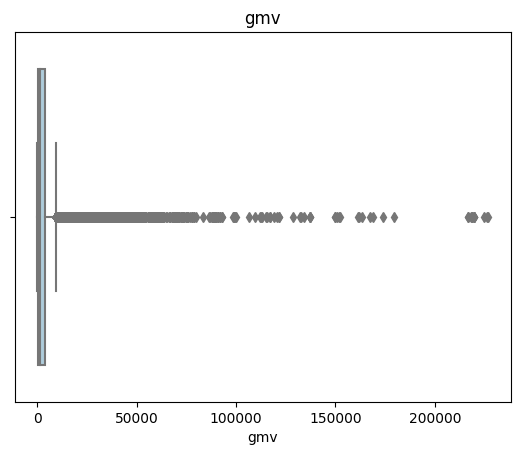

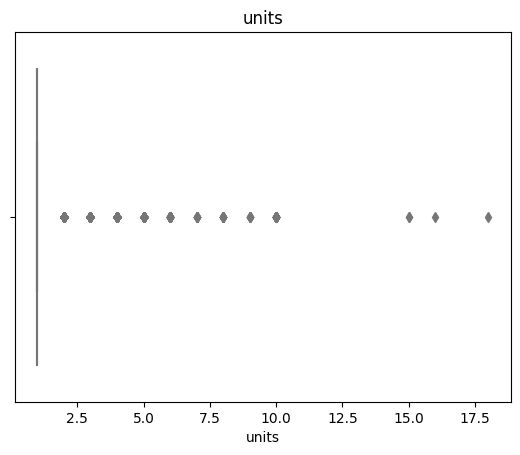

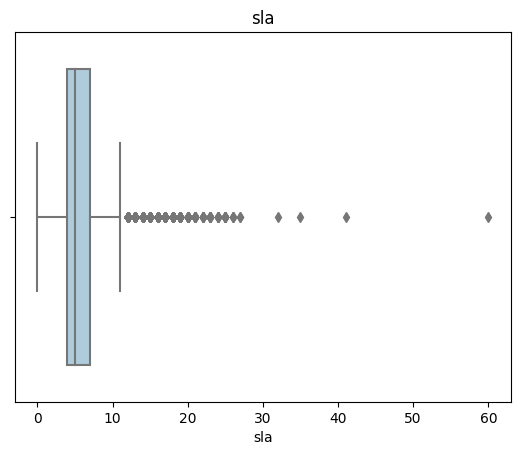

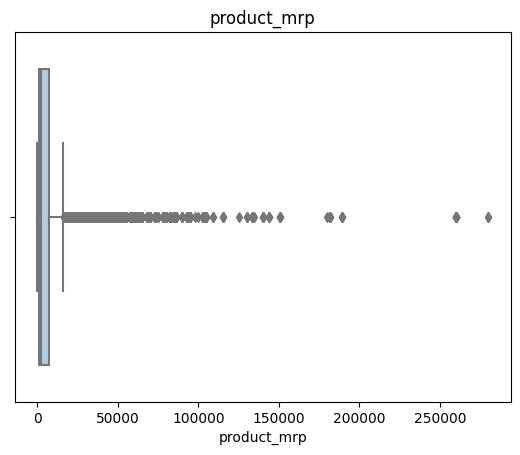

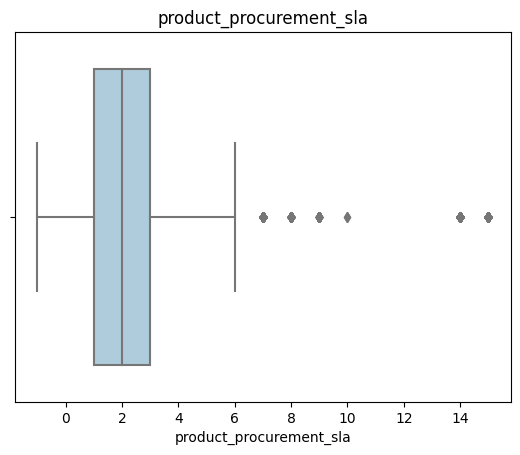

In [1672]:
## integer column handling
num=[]
obj=[]
for i in EleData2.columns:
  if EleData2[i].dtype=='float64':
    num.append(i)
  if EleData2[i].dtype=='int64':
    num.append(i)
  if EleData2[i].dtype=='object':
    obj.append(i)


num.remove('order_item_id')

x=1
for i in num:
  plt.title(i)
  sns.boxplot(x=EleData2[i])
  plt.show()
  x=x+1

## we will treat outliers later based on sub categories

In [1673]:
EleData2.columns
EleData2.order_date=EleData2['order_date'].dt.date

In [1674]:
## Week
EleData2['week']=((pd.to_datetime(EleData2['order_date'])-pd.to_datetime('2015-07-01'))/7)
EleData2['week']=EleData2['week'].apply(lambda x: x.days+1)
EleData2.loc[:,['order_date','week']]
EleData2.week.value_counts()

16    28442
44    13958
19    13225
30    12482
36    12240
25    12165
34    12092
48    11047
26     9762
32     9499
37     9451
23     9406
28     9009
35     9000
24     8572
27     8469
31     8251
33     8234
46     8168
17     8003
18     7957
47     7703
29     7569
22     7442
45     7425
49     7367
40     7159
41     7121
38     7101
50     6966
39     6799
20     6576
51     6530
3      6431
10     6342
15     6243
2      6205
52     6198
13     6141
21     5921
4      5691
12     5595
11     5593
14     5520
42     5282
43     2532
5      2531
53     1724
1      1578
9       933
6         4
8         2
7         1
Name: week, dtype: int64

In [1675]:
# 2. Listing Price and Pricing Discounts
EleData2=EleData2[EleData.product_mrp!=0]
EleData2['gmv']=EleData2.gmv.astype(float)
EleData2['listing_price'] = ((EleData2.gmv)/EleData2.units).round(2)
EleData2['discount_per']=(((EleData2['product_mrp']-EleData2['listing_price'])/EleData2['product_mrp'])).round(2)
EleData2.discount_per.describe()
EleData2[EleData2.product_mrp < EleData2.listing_price]
EleData2=EleData2[EleData2.product_mrp >= EleData2.listing_price]

In [1676]:
## joining rest of the data and calculating other variables from it
# ProdList
# Investment
# MonthlyNPS
# SalesCal
# Ont2015
# Ont2016


In [1677]:
# ## Sales
SalesCal = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Special Sale Calendar")

# SalesCal.head(20)

SalesCal1=pd.DataFrame(['2015-07-18','2015-07-19','2015-08-15','2015-08-16','2015-08-17','2015-08-28','2015-08-29','2015-08-30',
                        '2015-10-15','2015-10-16','2015-10-17','2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12',
                        '2015-11-13','2015-11-14','2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31',
                        '2016-01-01','2016-01-02','2016-01-03','2016-01-20','2016-01-21','2016-01-22','2016-02-01','2016-02-02','2016-02-20','2016-02-21',
                       '2016-02-14','2016-02-15','2016-03-07','2016-03-08','2016-03-09','2016-05-25','2016-05-26','2016-05-27'],columns=["sale_date"])

# SalesCal1=SalesCal1[0].to_list()
# SalesCal1
EleData2.order_date=EleData2.order_date.apply(lambda x :str(x).strip())
EleData2=pd.merge(EleData2,SalesCal1,left_on='order_date',right_on='sale_date',how='left')
# # test[~test["date"].isna()]
# EleData2['sale_date'].value_counts()

In [1678]:
### Weather infomation canada
Ont2015=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2015.xlsx",header=24)
Ont2016=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2016.xlsx",header=24)
Ont_Weather = pd.concat([Ont2015,Ont2016])
Ont_Weather=Ont_Weather.loc[(Ont_Weather['Date/Time']>='2015-07-01') &(Ont_Weather['Date/Time']<'2016-07-01')]

# Ont2015['Max Temp Flag'].value_counts()
todrop= (Ont_Weather.isnull().sum()/Ont_Weather.shape[0]).reset_index()
todrop
req=todrop.loc[todrop[0]<0.50,:]['index'].to_list()
Ont_Weather=Ont_Weather[req]
Ont_Weather =Ont_Weather.drop(['Total Precip (mm)','Snow on Grnd (cm)','Data Quality'],1)

# Ont_Weather
Ont_Weather['week']=((pd.to_datetime(Ont_Weather['Date/Time'])-pd.to_datetime('2015-07-01'))/7)
Ont_Weather['week']=Ont_Weather['week'].apply(lambda x: x.days+1)
Ont_Weather['Date/Time']=Ont_Weather['Date/Time'].dt.date
weekly_kpis=Ont_Weather.groupby('week').mean().reset_index()

In [1679]:
weekly_kpis.head()
weekly_kpis.drop(['Year','Month'],1,inplace=True)

In [1680]:

weekly_kpis=weekly_kpis.sort_values(by='week')
Ont_Weather.info()
weekly_kpis.rename(columns={"Max Temp (°C)":"max_temp_c","Min Temp (°C)":"mon_temp_c","Mean Temp (°C)":"mean_temp_c",
                            "Heat Deg Days (°C)":"heat_deg_c","Cool Deg Days (°C)":"cool_deg_c","Total Rain (mm)":"total_rain",
                            "Total Snow (cm)":"total_snow"},inplace=True)
## filling missing values with fronyfill method as temp is time series
weekly_kpis.ffill(inplace=True)
weekly_kpis.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 181 to 181
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           366 non-null    object 
 1   Year                366 non-null    int64  
 2   Month               366 non-null    int64  
 3   Day                 366 non-null    int64  
 4   Max Temp (°C)       208 non-null    float64
 5   Min Temp (°C)       191 non-null    float64
 6   Mean Temp (°C)      191 non-null    float64
 7   Heat Deg Days (°C)  191 non-null    float64
 8   Cool Deg Days (°C)  191 non-null    float64
 9   Total Rain (mm)     215 non-null    float64
 10  Total Snow (cm)     215 non-null    float64
 11  week                366 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 37.2+ KB


week           0
Day            0
max_temp_c     0
mon_temp_c     0
mean_temp_c    0
heat_deg_c     0
cool_deg_c     0
total_rain     0
total_snow     0
dtype: int64

In [1681]:
# MonthlyNPS
MonthlyNPS = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Monthly NPS Score")
# ?pd.melt
MonthlyNPS.head()
NPS = pd.melt(MonthlyNPS,id_vars="Unnamed: 0",value_vars=["July'15","Aug'15","Sept'15","Oct'15","Nov'15",
                                                  "Dec'15","Jan'16","Feb'16","Mar'16","Apr'16",
                                                  "May'16","June'16"],).reset_index()
# ?pd.pivot
NPS.rename(columns={"Unnamed: 0":"Header","variable":"Month1","value":"Value"},inplace=True)
# NPS
# NPS
NPS['Month']=0
NPS.loc[NPS["Month1"].str.startswith("July"), "Month"] = 7
NPS.loc[NPS["Month1"].str.startswith("Aug"), "Month"] = 8
NPS.loc[NPS["Month1"].str.startswith("Sept"), "Month"] = 9
NPS.loc[NPS["Month1"].str.startswith("Oct"), "Month"] = 10
NPS.loc[NPS["Month1"].str.startswith("Nov"), "Month"] = 11
NPS.loc[NPS["Month1"].str.startswith("Dec"), "Month"] = 12
NPS.loc[NPS["Month1"].str.startswith("Jan"), "Month"] = 1
NPS.loc[NPS["Month1"].str.startswith("Feb"), "Month"] = 2
NPS.loc[NPS["Month1"].str.startswith("Mar"), "Month"] = 3
NPS.loc[NPS["Month1"].str.startswith("Apr"), "Month"] = 4
NPS.loc[NPS["Month1"].str.startswith("May"), "Month"] = 5
NPS.loc[NPS["Month1"].str.startswith("June"), "Month"] = 6
NPS['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016])
NPS['Month']=NPS['Month'].astype(str)
NPS.drop("index",1,inplace=True)

# print(NPS)
# print(NPS)
NPS


Header   Month1        Value Month  Year
0           NPS  July'15    54.599588     7  2015
1   Stock Index  July'15  1177.000000     7  2015
2           NPS   Aug'15    59.987101     8  2015
3   Stock Index   Aug'15  1206.000000     8  2015
4           NPS  Sept'15    46.925419     9  2015
5   Stock Index  Sept'15  1101.000000     9  2015
6           NPS   Oct'15    44.398389    10  2015
7   Stock Index   Oct'15  1210.000000    10  2015
8           NPS   Nov'15    47.000000    11  2015
9   Stock Index   Nov'15  1233.000000    11  2015
10          NPS   Dec'15    45.800000    12  2015
11  Stock Index   Dec'15  1038.000000    12  2015
12          NPS   Jan'16    47.093031     1  2016
13  Stock Index   Jan'16  1052.000000     1  2016
14          NPS   Feb'16    50.327406     2  2016
15  Stock Index   Feb'16  1222.000000     2  2016
16          NPS   Mar'16    49.020550     3  2016
17  Stock Index   Mar'16  1015.000000     3  2016
18          NPS   Apr'16    51.827605     4  2016
19  Stock Index   Apr'16  1242.000000     4  2016
20          NPS   May'16    47.306951     5  2016
21  Stock Index   May'16  1228.000000     5  2016
22          NPS  June'16    50.516687     6  2016
23  Stock Index  June'16  1194.000000     6  2016

In [1682]:
EleData2.rename(columns={"Year_x":"Year","Month_x":"Month"},inplace=True)
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='Stock Index'],how='left',on='Month')
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='NPS'],how='left',on='Month')
# EleData2['Year_x'].count()
EleData2.rename(columns={"Value_x":"Stock_Index","Value_y":"NPS"},inplace=True)


In [1683]:
# lets clean the frame with _x _y coluumns
# EleData2.columns
EleData2['Year']=EleData2['Year_x']
# EleData2['week']=EleData2['week_x']

col=[]
for i in EleData2.columns:
  if (str(i).endswith("_x")) | (str(i).endswith("_y") | (str(i)=='key_0')):
    col.append(i)

EleData2.drop(col,1,inplace=True)


In [1684]:
EleData2.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived', 'week', 'listing_price',
       'discount_per', 'sale_date', 'Stock_Index', 'NPS', 'Year'],
      dtype='object')

In [1685]:
### Investments

Investment = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",header=2,sheet_name="Media Investment")
Investment.isna().sum()
Investment.fillna(0,inplace=True)
Investment.drop(["Unnamed: 0"],1,inplace=True)
Investment=Investment.loc[Investment.Year!=0]
Investment.head()
Investment['month_start'] = pd.to_datetime(Investment[['Year', 'Month']].assign(DAY=1))
Investment.set_index('month_start',inplace=True)


In [1686]:
# Investment.info()
july=Investment.index[-1] + pd.offsets.MonthBegin(1)
july

Timestamp('2016-07-01 00:00:00')

In [1687]:
Investment =Investment.append(Investment.iloc[[-1]].rename({Investment.index[-1]: july}))
Inv2=Investment.resample("W").ffill().reset_index()
Inv2.set_index('month_start',inplace=True)
# Inv2=Inv2.iloc[:-1]
# EleData2['week'].value_counts()
Inv2.head()
Inv2.rename(columns={' Affiliates':'Affiliates'},inplace=True)


In [1688]:
Inv2['Total Investment'] = Inv2['Total Investment']/Inv2.resample('MS')['Total Investment'].transform('size')
Inv2['TV'] = Inv2['TV']/Inv2.resample('MS')['TV'].transform('size')
Inv2['Digital'] = Inv2['Digital'] /Inv2.resample('MS')['Digital'].transform('size')
Inv2['Sponsorship'] = Inv2['Sponsorship']/Inv2.resample('MS')['Sponsorship'].transform('size')
Inv2['Content Marketing'] = Inv2['Content Marketing']/Inv2.resample('MS')['Content Marketing'].transform('size')
Inv2['Online marketing'] = Inv2['Online marketing']/ Inv2.resample('MS')['Online marketing'].transform('size')
Inv2['Affiliates'] = Inv2['Affiliates']/ Inv2.resample('MS')['Affiliates'].transform('size')
Inv2['SEM'] = Inv2['SEM']/Inv2.resample('MS')['SEM'].transform('size')
Inv2['Radio'] = Inv2['Radio']/Inv2.resample('MS')['Radio'].transform('size')
Inv2['Other'] = Inv2['Other']/Inv2.resample('MS')['Other'].transform('size')



In [1689]:
## aDstock
# EleData3.columns
# considering 0.5 decay
ad = ['Total Investment', 'TV', 'Digital','Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates','SEM', 'Radio', 'Other']
def adstock(channel):
  Inv_ad=[]
  for i in range(0,(len(Inv2))):
    if i==0:
      Inv_ad.append(Inv2.iloc[i][channel].round(2))
    else:
      Inv_ad.append((Inv2.iloc[i][channel]+ (0.5 * Inv2.iloc[i-1][channel])).round(2))
  return Inv_ad


In [1690]:
Inv2['Total_Investment_AD']=adstock("Total Investment")
Inv2['TV_AD']=adstock("TV")
Inv2['Digital_AD']=adstock("Digital")
Inv2['Content_Marketing_AD']=adstock("Content Marketing")
Inv2['Sponsorship_AD']=adstock("Sponsorship")
Inv2['Online_marketing_AD']=adstock("Online marketing")
Inv2['Affiliates_AD']=adstock("Affiliates")
Inv2['SEM_AD']=adstock("SEM")
Inv2['Radio_AD']=adstock("Radio")
Inv2['Other_AD']=adstock("Other")


In [1691]:
Inv2['week']=nm.arange(1,54)
weekly_kpis=pd.merge(weekly_kpis,Inv2,on='week')

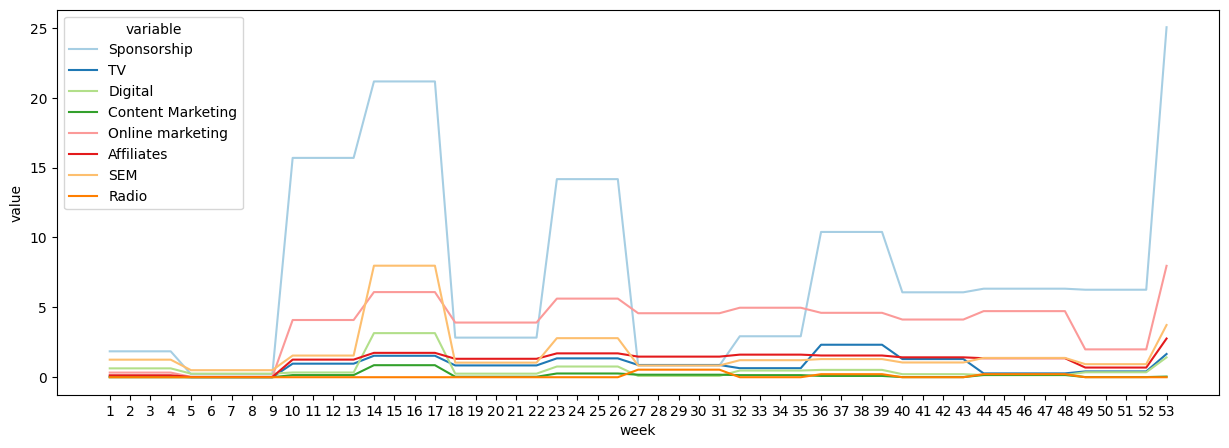

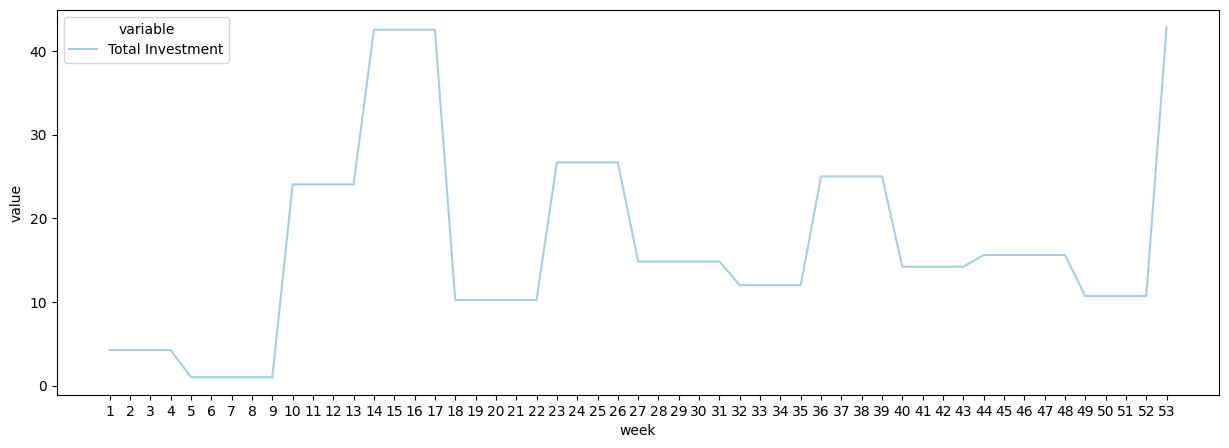

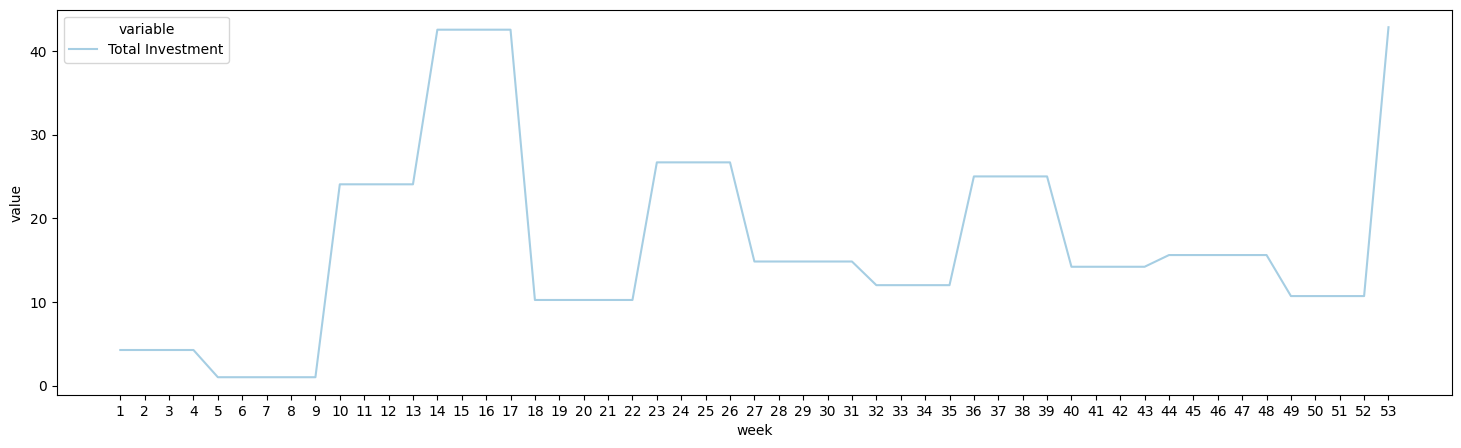

In [1692]:
markinv = ['week', 'Sponsorship','TV','Digital', 'Content Marketing', 'Online marketing','Affiliates', 'SEM', 'Radio']

plt.figure(figsize=(15,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[markinv],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[['Total Investment','week']],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()

plt.figure(figsize=(18,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[['Total Investment','week']],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()



In [1693]:
## Pay Date month end, 1st , 15 the and 16th
EleData2.order_date=pd.to_datetime(EleData2.order_date).dt.date
EleData2["pay_date_flag"]=EleData2['order_date'].apply(lambda x : 1 if ((x).day==15|(x).day==1|(x).day==16)|(pd.to_datetime(x).is_month_end) else 0)


In [1694]:
# holiday flag
import holidays
holidays=pd.DataFrame(pd.Series(holidays.CA(prov='ON',years=[2015,2016]))).reset_index()
holidays=holidays.rename(columns={'index':'Holiday_flag'})
holidays=holidays.drop(0,axis=1)
holidays['Holiday_flag']=pd.to_datetime(holidays['Holiday_flag'], dayfirst=True)
holidays.info()
holidays['Holiday_flag']=holidays['Holiday_flag'].dt.date


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Holiday_flag  18 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 272.0 bytes


In [1695]:
EleData3=pd.merge(EleData2,holidays,how='left',left_on='order_date',right_on='Holiday_flag').fillna(0)

In [1696]:
## payment type
EleData3.order_payment_type= EleData3.order_payment_type.apply(lambda x : 1 if x=='cod' else 0)


In [1697]:
EleData3.pay_date_flag.value_counts()

0    375247
1     10749
Name: pay_date_flag, dtype: int64

In [1698]:
### Luxary vs mass product

pd.DataFrame(EleData3['product_mrp']).describe(percentiles=[.70,.80,.90]).T
EleData3['luxury'] = EleData3['product_mrp'].apply(lambda x:1 if x >= 8000.0 else 0)


In [1699]:
luxury=pd.DataFrame(EleData3.groupby(['luxury','product_analytic_sub_category'])['order_item_id'].agg('count').reset_index())

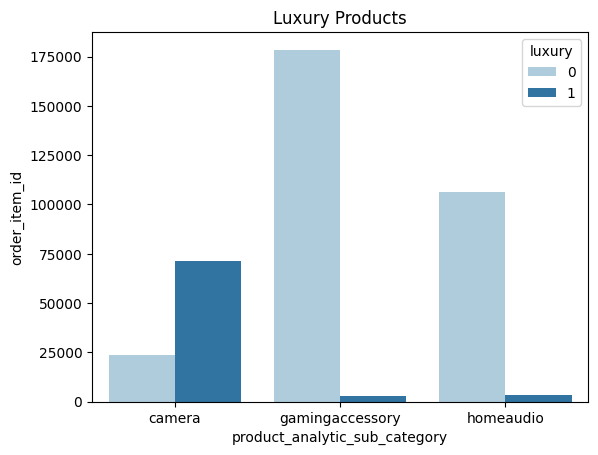

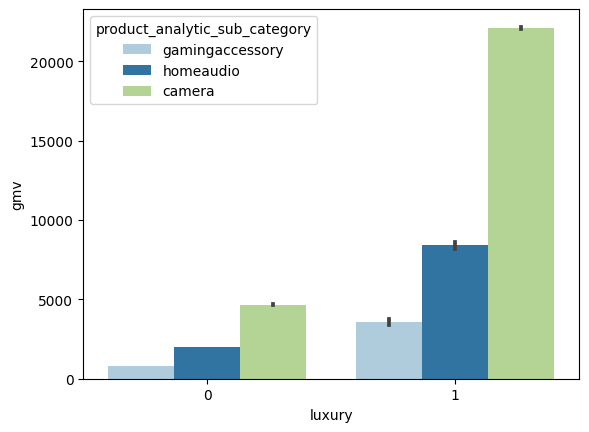

In [1700]:
sns.barplot(data=luxury,x='product_analytic_sub_category',y='order_item_id',hue='luxury')
plt.title('Luxury Products')
plt.show()
sns.barplot(data=EleData3,x='luxury',y='gmv',hue='product_analytic_sub_category')
plt.show()

## Generic EDA

In [1701]:
df_prod=EleData3.groupby(['product_analytic_sub_category','product_analytic_vertical'])['gmv'].sum()
df_prod=pd.DataFrame(df_prod.reset_index())
# df_prod.rename(columns={0:"count"},inplace=True)

In [1702]:
df_prod

product_analytic_sub_category product_analytic_vertical           gmv
0                         camera                camcorders  1.520801e+07
1                         camera                      dslr  1.378907e+09
2                         camera           instant cameras  1.115525e+07
3                         camera             point & shoot  2.587350e+08
4                         camera           sportsandaction  1.932014e+07
5                gamingaccessory                coolingpad  3.833400e+04
6                gamingaccessory          gamecontrolmount  2.099000e+03
7                gamingaccessory                   gamepad  6.082473e+07
8                gamingaccessory        gamingaccessorykit  4.773648e+06
9                gamingaccessory             gamingadapter  1.955297e+06
10               gamingaccessory     gamingchargingstation  5.270600e+04
11               gamingaccessory             gamingheadset  3.145047e+07
12               gamingaccessory            gamingkeyboard  9.289808e+06
13               gamingaccessory          gamingmemorycard  4.299311e+06
14               gamingaccessory               gamingmouse  2.561555e+07
15               gamingaccessory            gamingmousepad  2.849630e+06
16               gamingaccessory             gamingspeaker  3.603120e+05
17               gamingaccessory       joystickgamingwheel  5.305953e+06
18               gamingaccessory          motioncontroller  3.803175e+06
19               gamingaccessory       tvoutcableaccessory  2.575559e+06
20                     homeaudio                   boombox  7.732093e+06
21                     homeaudio              djcontroller  2.335536e+06
22                     homeaudio                      dock  1.085407e+06
23                     homeaudio            dockingstation  3.776040e+05
24                     homeaudio                   fmradio  1.871460e+07
25                     homeaudio                hifisystem  5.323643e+06
26                     homeaudio          homeaudiospeaker  1.938923e+08
27                     homeaudio             karaokeplayer  2.350000e+04
28                     homeaudio                  slingbox  2.049500e+04
29                     homeaudio                soundmixer  6.088680e+05
30                     homeaudio             voicerecorder  1.048322e+07

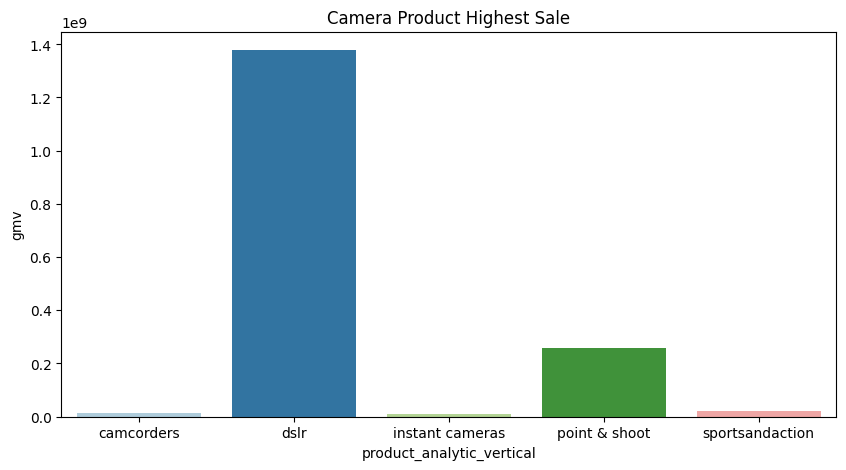

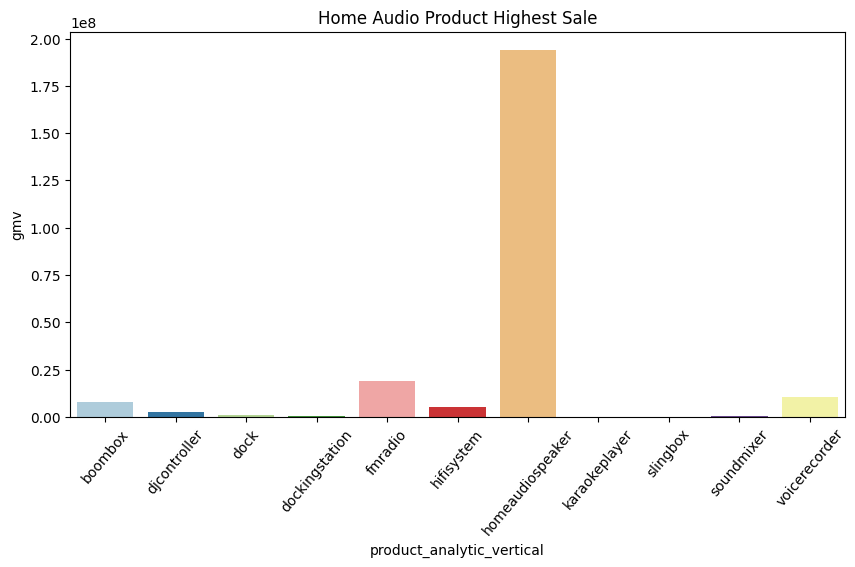

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'coolingpad'),
  Text(1, 0, 'gamecontrolmount'),
  Text(2, 0, 'gamepad'),
  Text(3, 0, 'gamingaccessorykit'),
  Text(4, 0, 'gamingadapter'),
  Text(5, 0, 'gamingchargingstation'),
  Text(6, 0, 'gamingheadset'),
  Text(7, 0, 'gamingkeyboard'),
  Text(8, 0, 'gamingmemorycard'),
  Text(9, 0, 'gamingmouse'),
  Text(10, 0, 'gamingmousepad'),
  Text(11, 0, 'gamingspeaker'),
  Text(12, 0, 'joystickgamingwheel'),
  Text(13, 0, 'motioncontroller'),
  Text(14, 0, 'tvoutcableaccessory')])

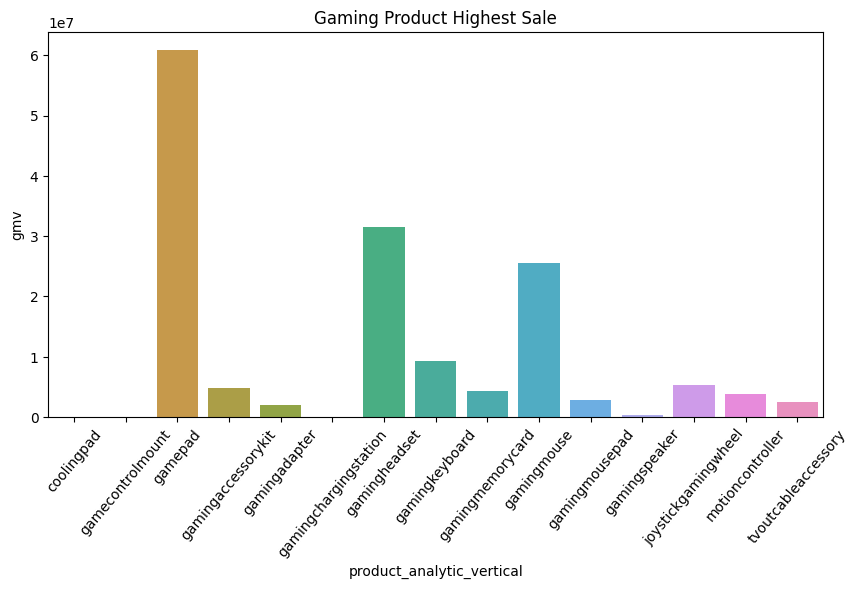

In [1703]:
# df_prod.sort_values('product_analytic_sub_category')
plt.figure(figsize=(10,5))
sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='camera'] , x='product_analytic_vertical' ,y='gmv')
plt.title("Camera Product Highest Sale")
plt.show()

plt.figure(figsize=(10,5))

sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='homeaudio'] , x='product_analytic_vertical',y='gmv' )
plt.title("Home Audio Product Highest Sale")
plt.xticks(rotation = 50)
plt.show()

plt.figure(figsize=(10,5))

sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='gamingaccessory'] , x='product_analytic_vertical',y='gmv')
plt.title("Gaming Product Highest Sale")
plt.xticks(rotation = 50)
# plt.show()

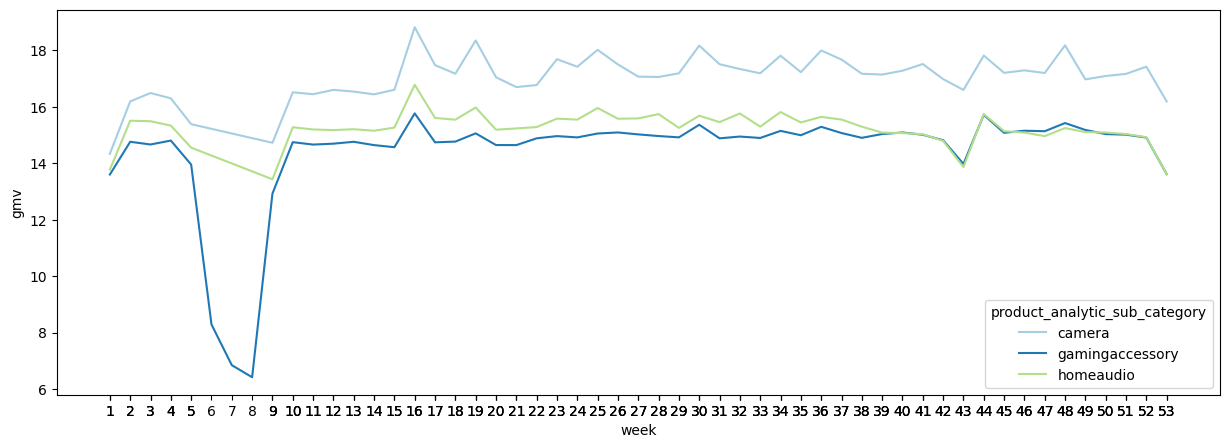

In [1704]:
### Week on Week sales of product category

wowgmv=EleData3.groupby(['week','product_analytic_sub_category'])['gmv'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x=wowgmv.week,y=nm.log(wowgmv.gmv),hue=wowgmv.product_analytic_sub_category)
plt.xticks(wowgmv['week'])
plt.show()


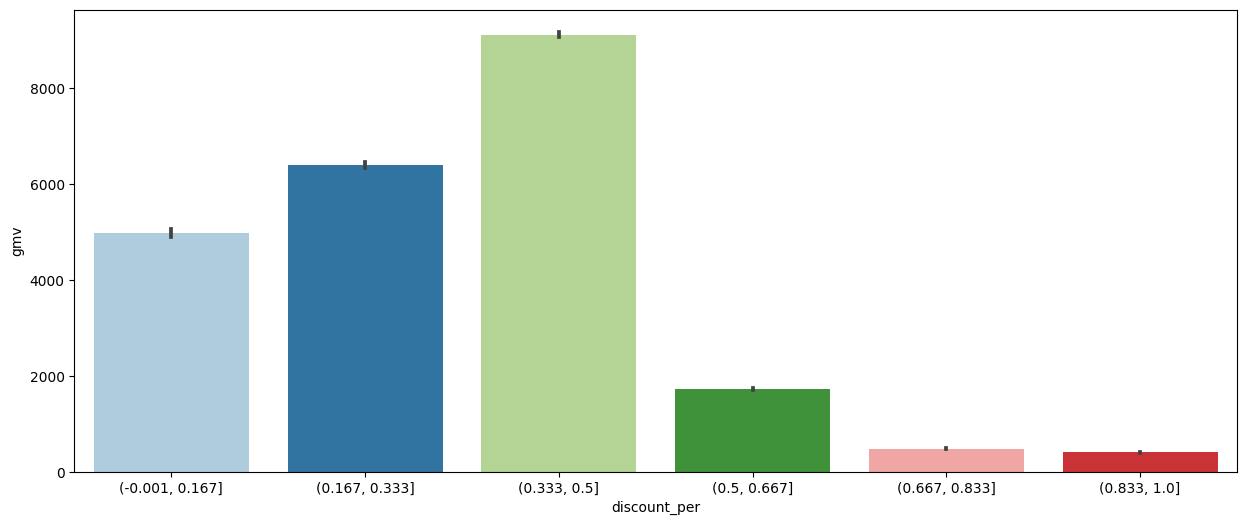

In [1705]:

## sales impact wow
plt.figure(figsize=(15,6))
sns.barplot(y=EleData3['gmv'],x=pd.cut(EleData3['discount_per'],bins=6))
plt.show()



# Data Aggregation and analysis

Camera Analysis

In [1706]:
##
camera=EleData3[EleData3.product_analytic_sub_category=='camera']
# camera.discount_per

In [1707]:
camera.columns


Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived', 'week', 'listing_price',
       'discount_per', 'sale_date', 'Stock_Index', 'NPS', 'Year',
       'pay_date_flag', 'Holiday_flag', 'luxury'],
      dtype='object')

In [1708]:
cam_dummies = pd.get_dummies(camera['product_analytic_vertical'])
camera=pd.concat([camera,cam_dummies],axis=1)


In [1709]:
camera.drop(["product_analytic_sub_category","product_analytic_category"],1,inplace=True)

In [1710]:
num
num.append('discount_per')
num.append('listing_price')

In [1711]:
camera[num].describe()

gmv         units           sla    product_mrp  \
count   94706.000000  94706.000000  94706.000000   94706.000000   
mean    17774.221234      1.011816      4.694370   27114.656505   
std     11423.619524      0.143116      2.399058   16922.490081   
min         0.000000      1.000000      0.000000     599.000000   
25%      6599.000000      1.000000      3.000000    8000.000000   
50%     19490.000000      1.000000      4.000000   34950.000000   
75%     24990.000000      1.000000      6.000000   40000.000000   
max    226947.000000      9.000000     35.000000  280000.000000   

       product_procurement_sla  discount_per  listing_price  
count             94706.000000  94706.000000   94706.000000  
mean                  2.777754      0.321185   17615.696167  
std                   2.490936      0.133102   11240.653746  
min                  -1.000000      0.000000       0.000000  
25%                   1.000000      0.210000    6552.000000  
50%                   3.000000      0.350000   19490.000000  
75%                   4.000000      0.430000   24990.000000  
max                  15.000000      1.000000  226947.000000

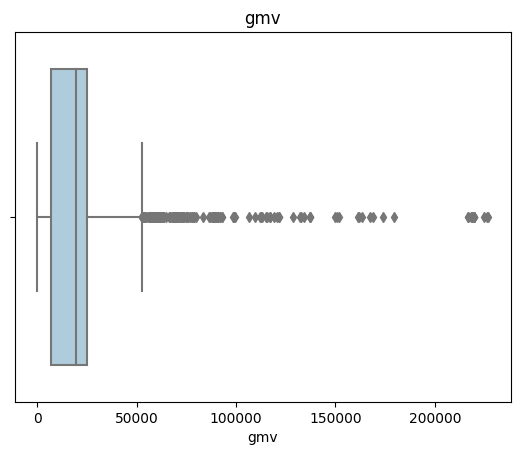

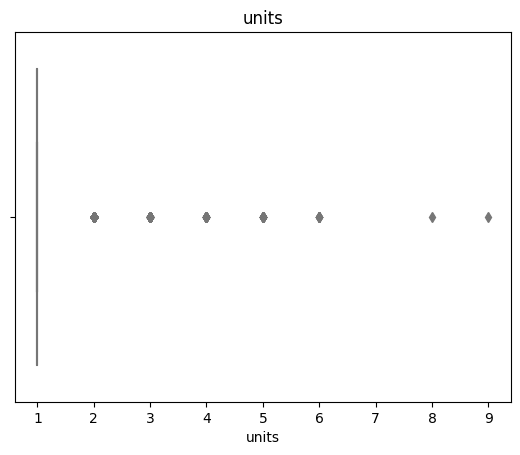

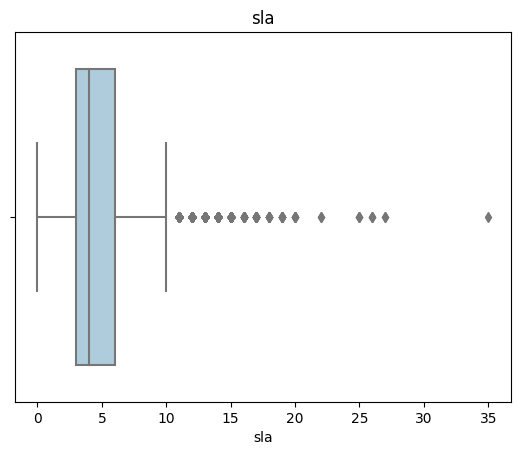

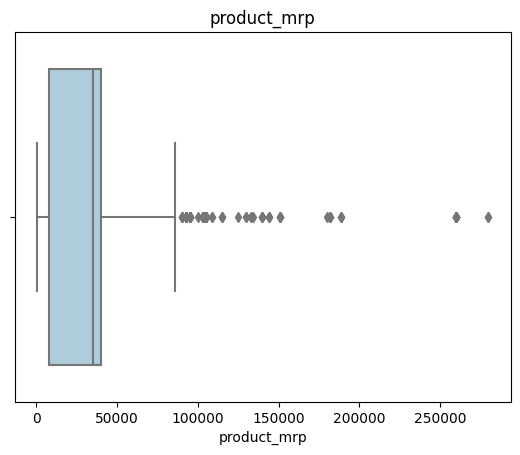

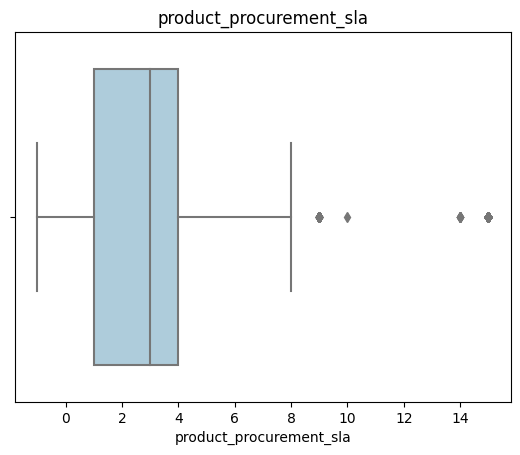

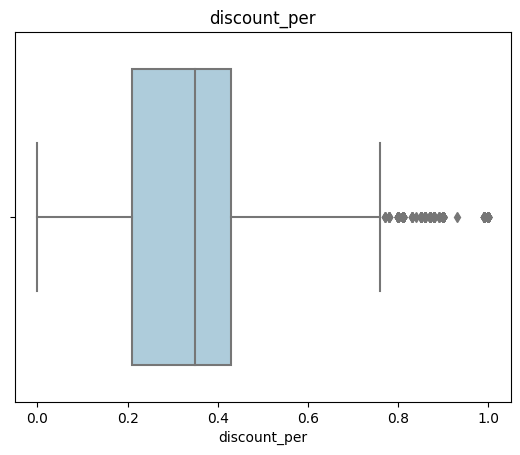

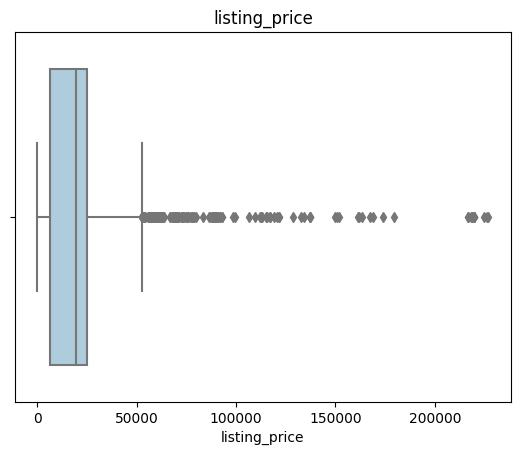

In [1712]:
for i in num:
  sns.boxplot(x=camera[i])
  plt.title(i)
  plt.show()

In [1713]:
# Product mrp , gmv , listing price is fine and expected but we can replace sla , procurement sla

In [1714]:
# q1=camera['gmv'].quantile(0.25)
# q3=camera['gmv'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# camera[camera['gmv']>72373.5]
# camera.loc[camera['gmv']>up,'gmv']=up
# camera.loc[camera['gmv']<lw,'gmv']=lw

In [1715]:
# q1=camera['listing_price'].quantile(0.25)
# q3=camera['listing_price'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# # camera[camera['listing_price']>72373.5]
# camera.loc[camera['listing_price']>up,'listing_price']=up
# camera.loc[camera['listing_price']<lw,'listing_price']=lw

In [1716]:
camera['product_mrp'].describe()

count     94706.000000
mean      27114.656505
std       16922.490081
min         599.000000
25%        8000.000000
50%       34950.000000
75%       40000.000000
max      280000.000000
Name: product_mrp, dtype: float64

In [1717]:
# q1=camera['discount_per'].quantile(0.25)
# q3=camera['discount_per'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# camera[camera['discount_per']>1.39]
# camera.loc[camera['discount_per']>up,'discount_per']=up
# camera.loc[camera['discount_per']<lw,'discount_per']=lw


q1=camera['sla'].quantile(0.25)
q3=camera['sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera.loc[camera['sla']>up,'sla']=up
camera.loc[camera['sla']<lw,'sla']=lw

q1=camera['product_procurement_sla'].quantile(0.25)
q3=camera['product_procurement_sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera.loc[camera['product_procurement_sla']>up,'product_procurement_sla']=up
camera.loc[camera['product_procurement_sla']<lw,'product_procurement_sla']=lw

-1.5   10.5
-3.5   8.5


In [1718]:
camera.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_vertical', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived', 'week',
       'listing_price', 'discount_per', 'sale_date', 'Stock_Index', 'NPS',
       'Year', 'pay_date_flag', 'Holiday_flag', 'luxury', 'camcorders', 'dslr',
       'instant cameras', 'point & shoot', 'sportsandaction'],
      dtype='object')

In [1719]:
camera_wk=camera.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique","dslr":"sum","point & shoot":"sum","luxury":"sum",
                                        'camcorders':"sum",'instant cameras':"sum", 'sportsandaction':"sum"}).round(2)

camera_wk=pd.merge(camera_wk,weekly_kpis,on='week')

camera_wk.rename(columns={"sale_date":"num_of_sales"},inplace=True)

In [1720]:
camera_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day'],1,inplace=True)

In [1721]:
camera_wk.order_payment_type.value_counts()
camera_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
camera_wk["cod_per"]=camera_wk["order_payment_cod"]/camera_wk["order_count"]
camera_wk.drop("order_payment_cod",1,inplace=True)
camera_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)


In [1722]:
camera_wk.num_of_sales=camera_wk.num_of_sales-1
# camera_wk.head()

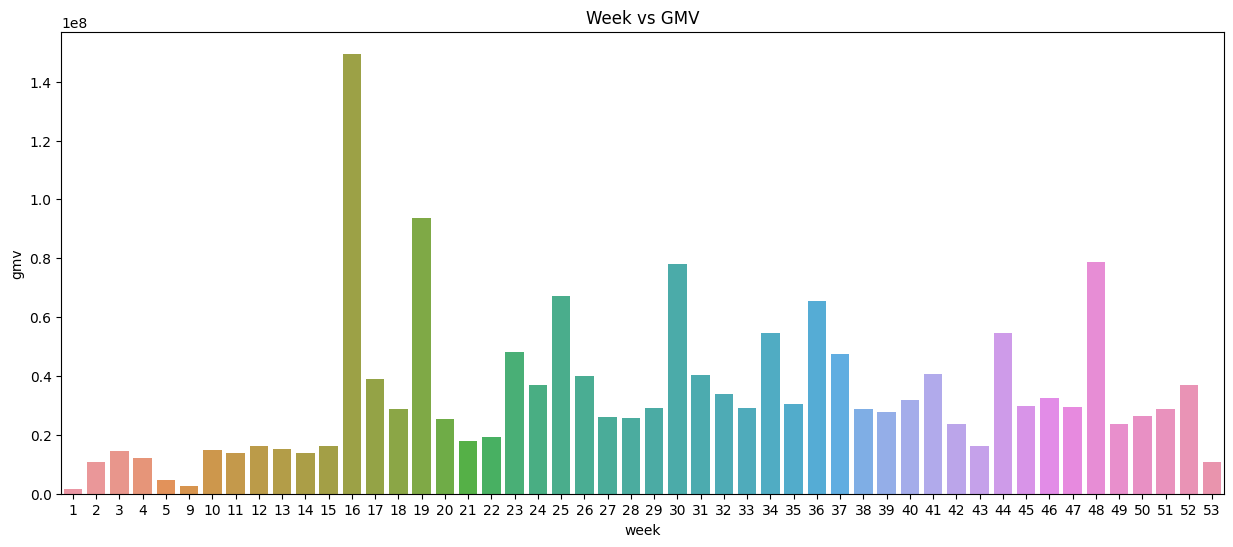

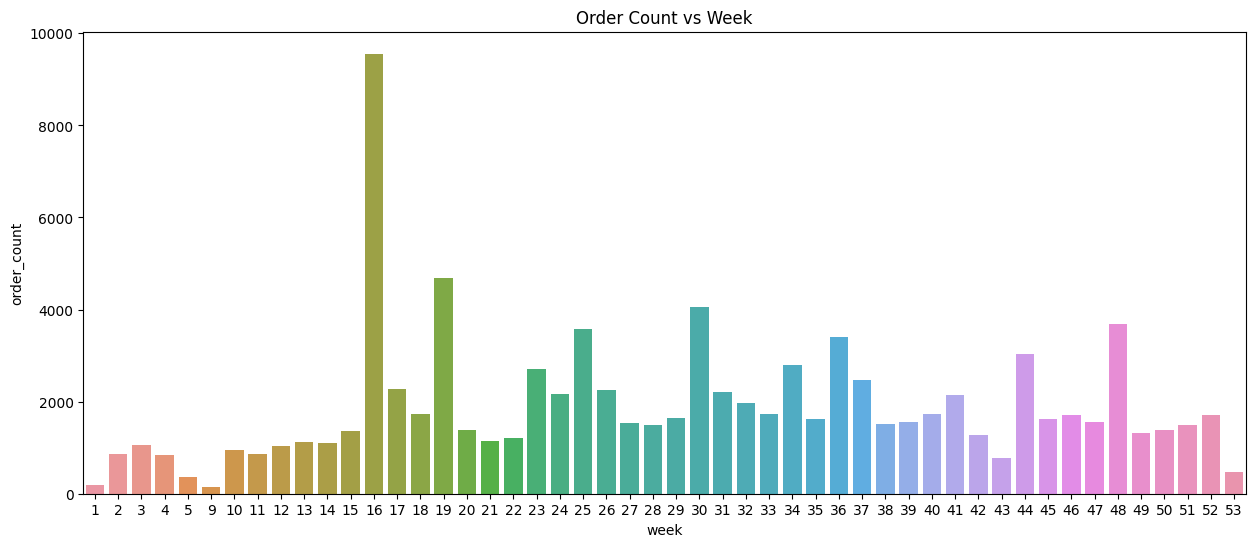

In [1723]:


plt.figure(figsize=(15,6))
sns.barplot(x=camera_wk['week'],y=camera_wk['gmv'])
plt.title("Week vs GMV")
plt.show()
# On an avverage 3 sales a week giving better result


plt.figure(figsize=(15,6))
sns.barplot(x=camera_wk['week'],y=camera_wk['order_count'])
plt.title("Order Count vs Week")
plt.show()

## On week 16 , 19, 25, 30,36,44 and 48 sales was good

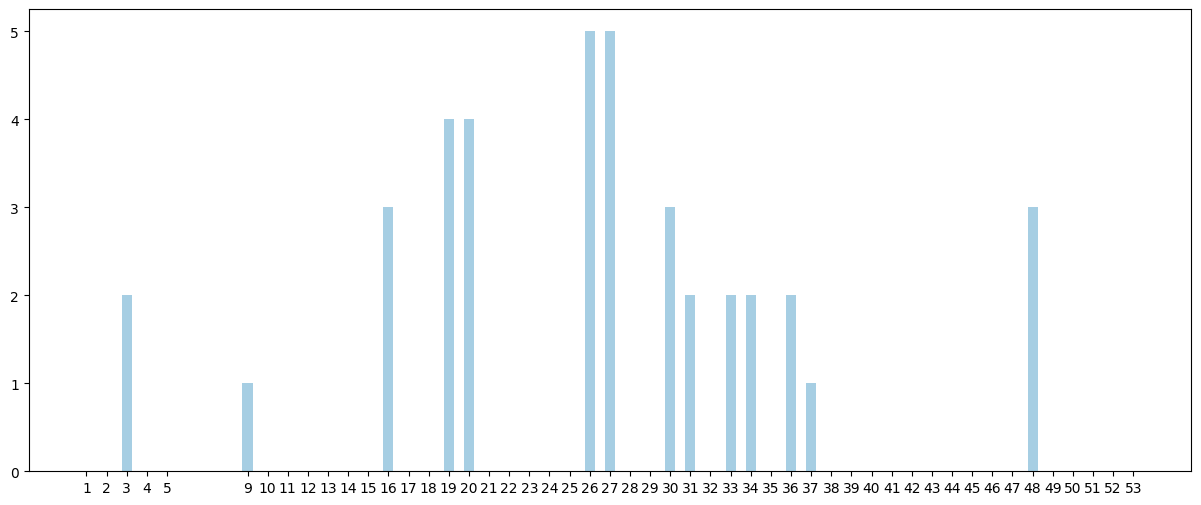

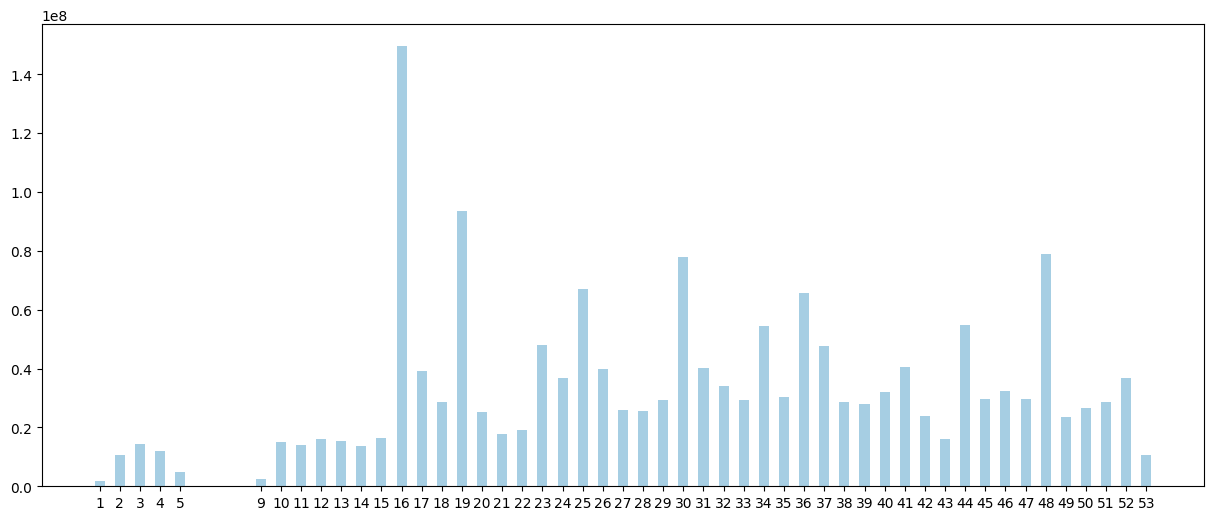

In [1724]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=camera_wk['week'],height=camera_wk['num_of_sales'],width=width)
plt.xticks(camera_wk['week'])
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=camera_wk['week'],height=camera_wk['gmv'],width=width)
plt.xticks(camera_wk['week'])
plt.show()

##  week 16th had 3 days of sale and it improved its gmv, similarly for week 48, 19 and 30
# But in Week 26 27 5 days were sale days bt id didnt improve the GMV much

# Week 16, 19 , 30 , 34,36 and 48 : has impact because has good gmv and number of sales

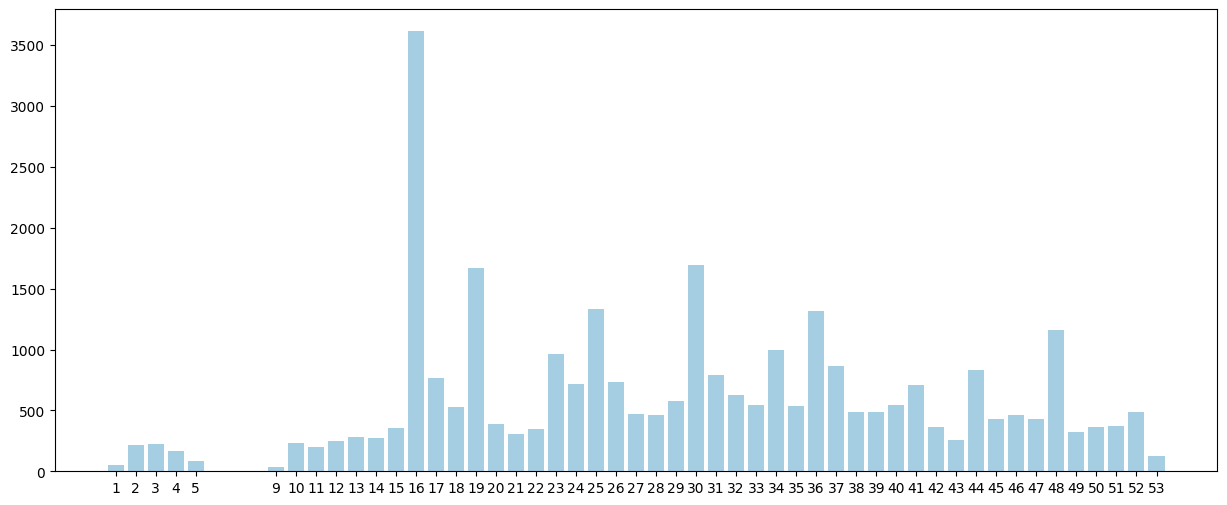

In [1725]:
plt.figure(figsize=(15,6))
plt.bar(x=camera_wk['week'],height=camera_wk['discount_per'])
plt.xticks(camera_wk['week'])
plt.show()



### Now week 25th may not have any sale but disocunts were given for most items and hence GMV was improved which makes sense

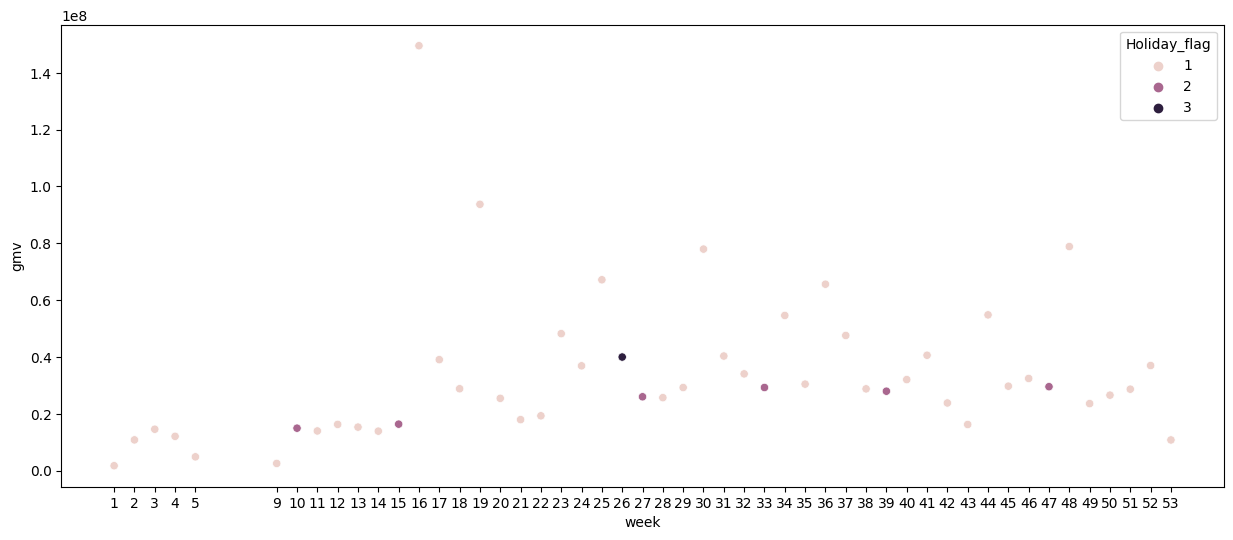

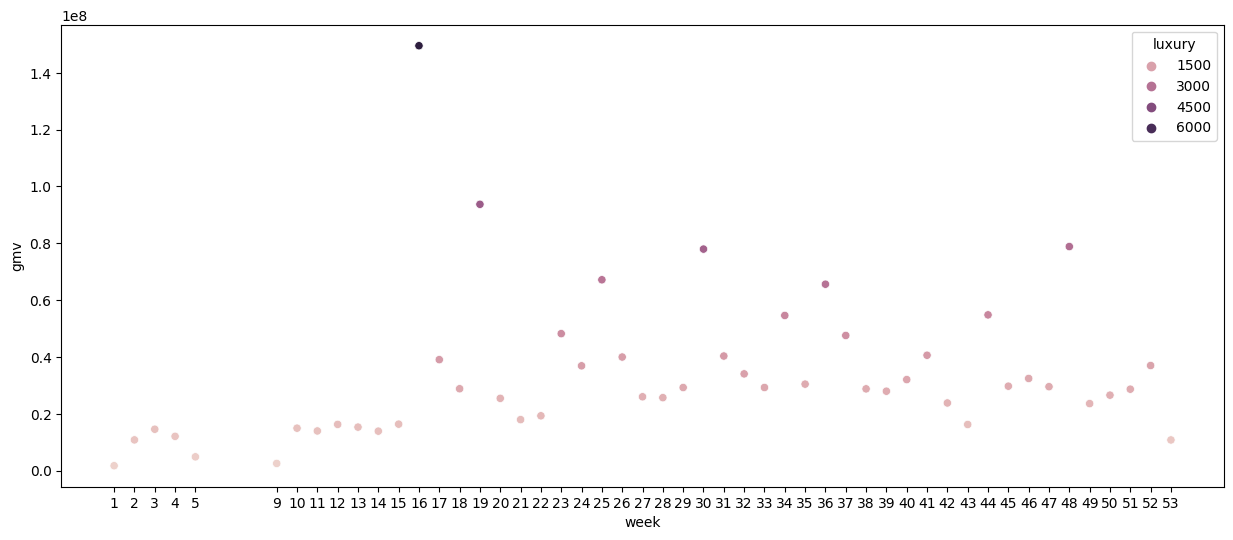

In [1726]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=camera_wk['week'],y=camera_wk['gmv'],hue=camera_wk['Holiday_flag'])
plt.xticks(camera_wk['week'])
plt.show()

plt.figure(figsize=(15,6))
sns.scatterplot(x=camera_wk['week'],y=camera_wk['gmv'],hue=camera_wk['luxury'])
plt.xticks(camera_wk['week'])
plt.show()

# Week 26, 15, 27 33 39 47


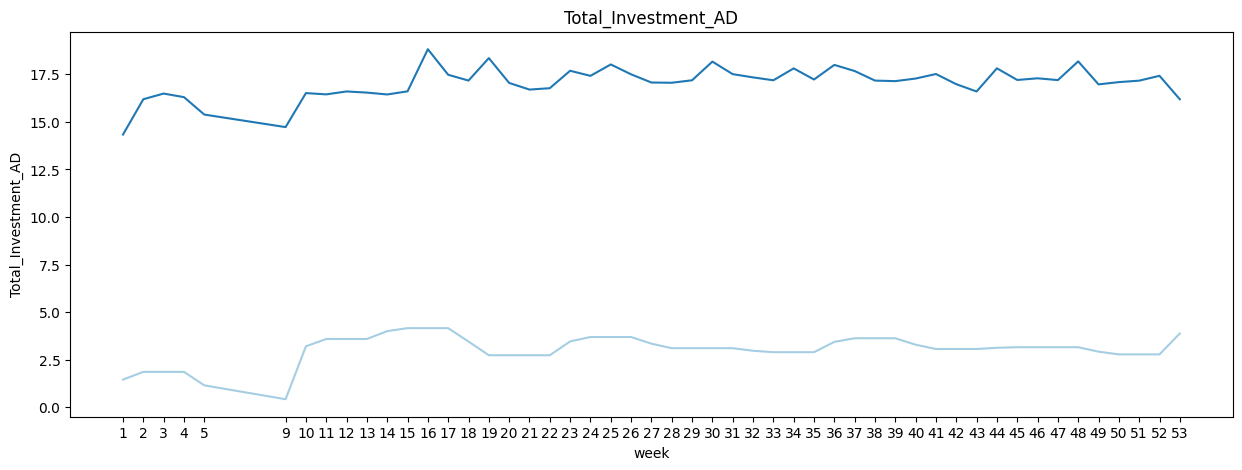

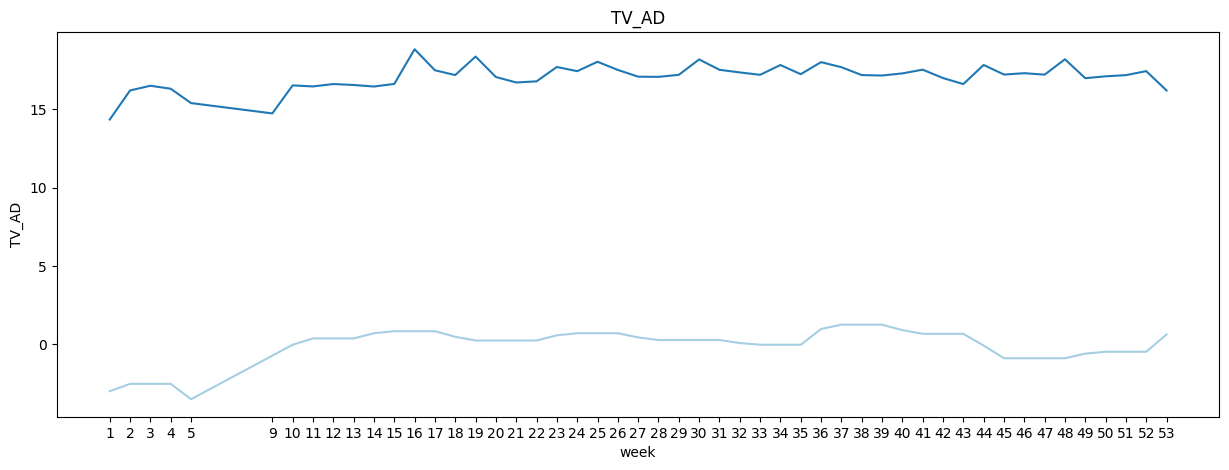

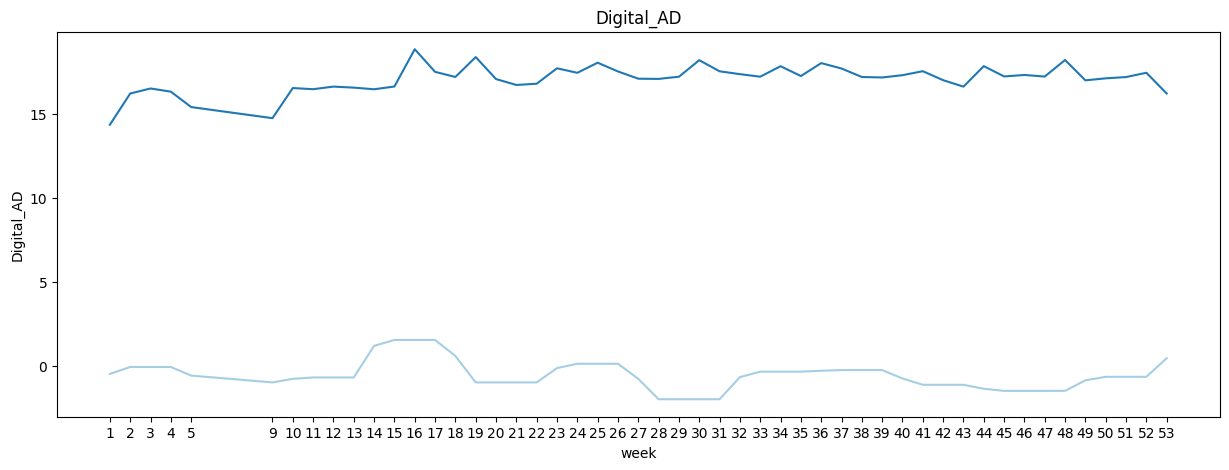

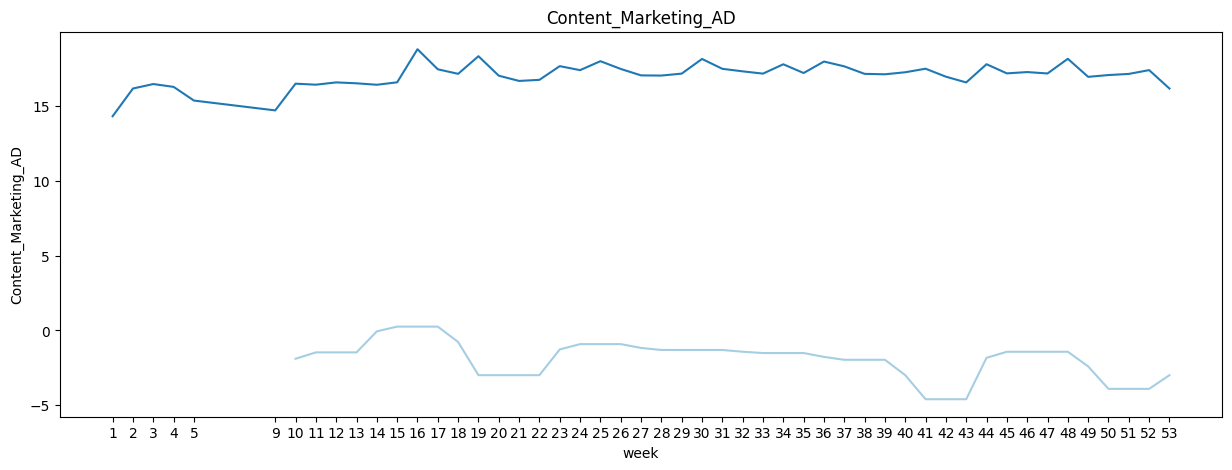

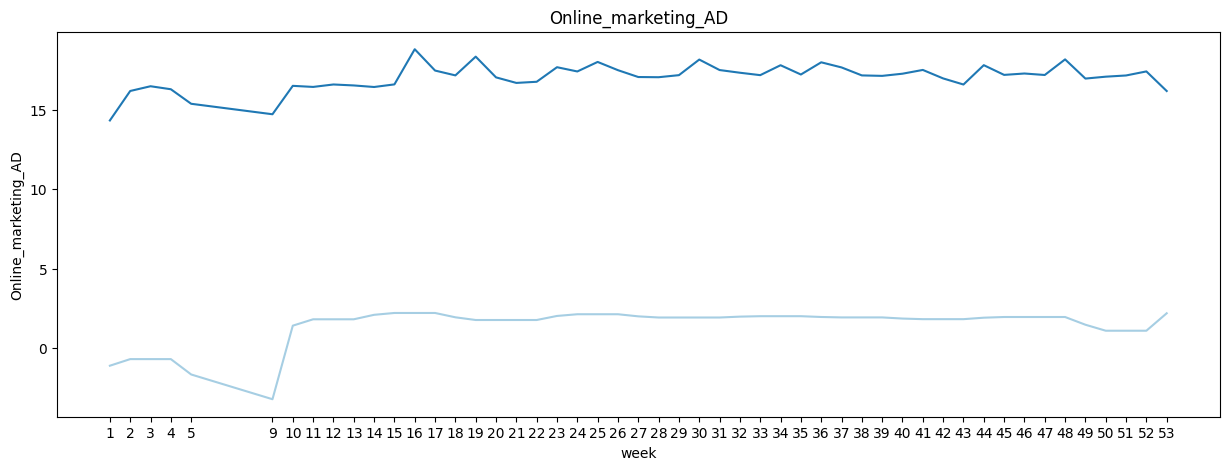

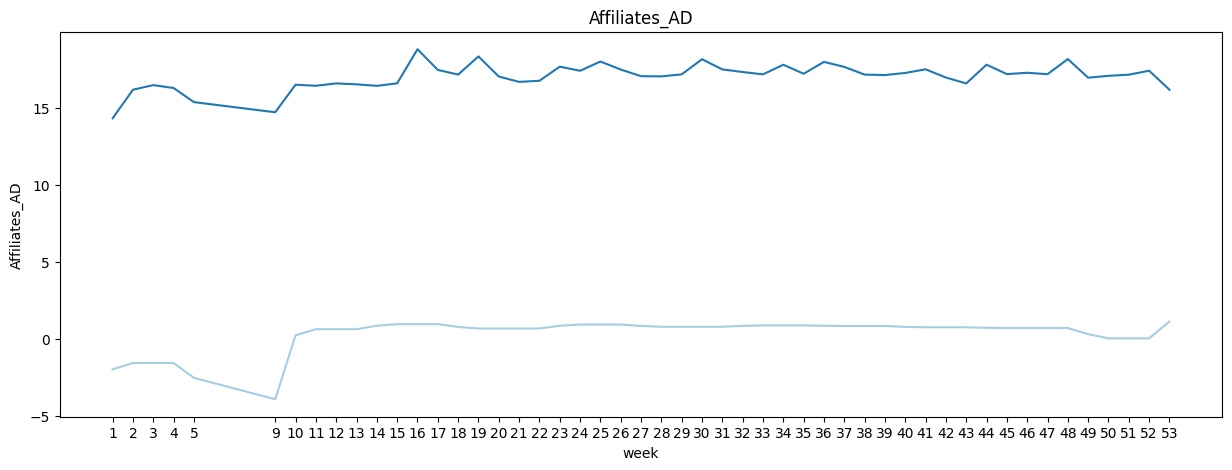

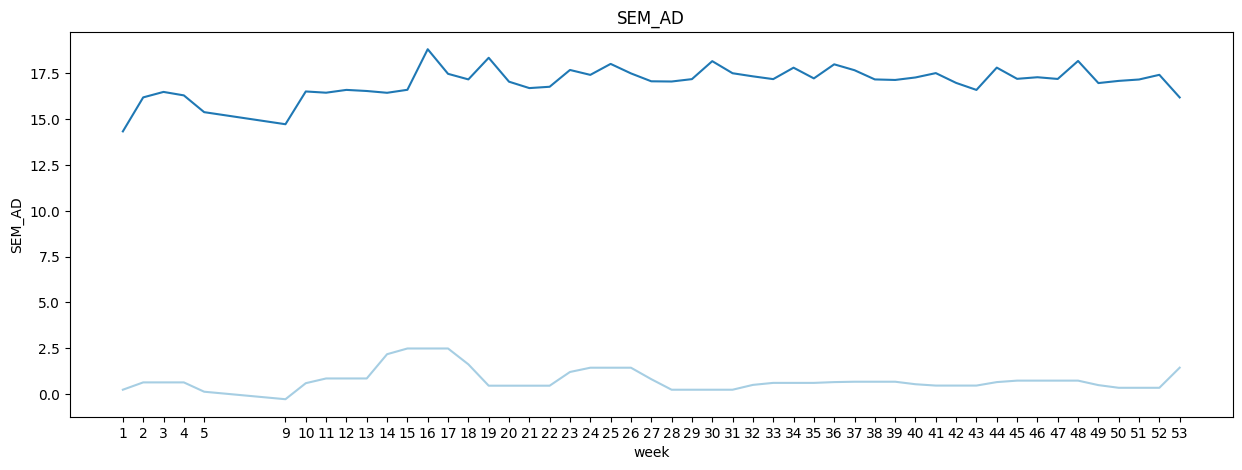

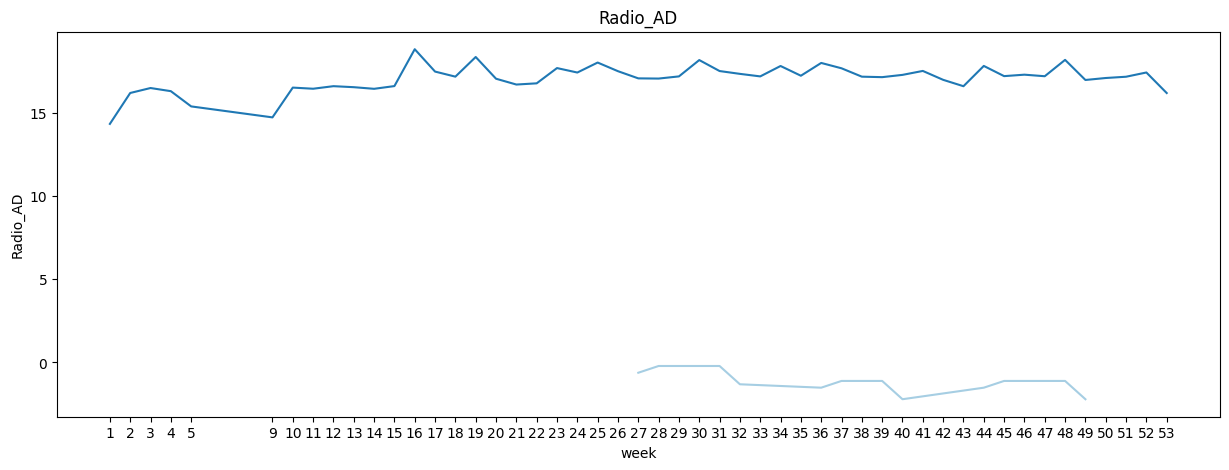

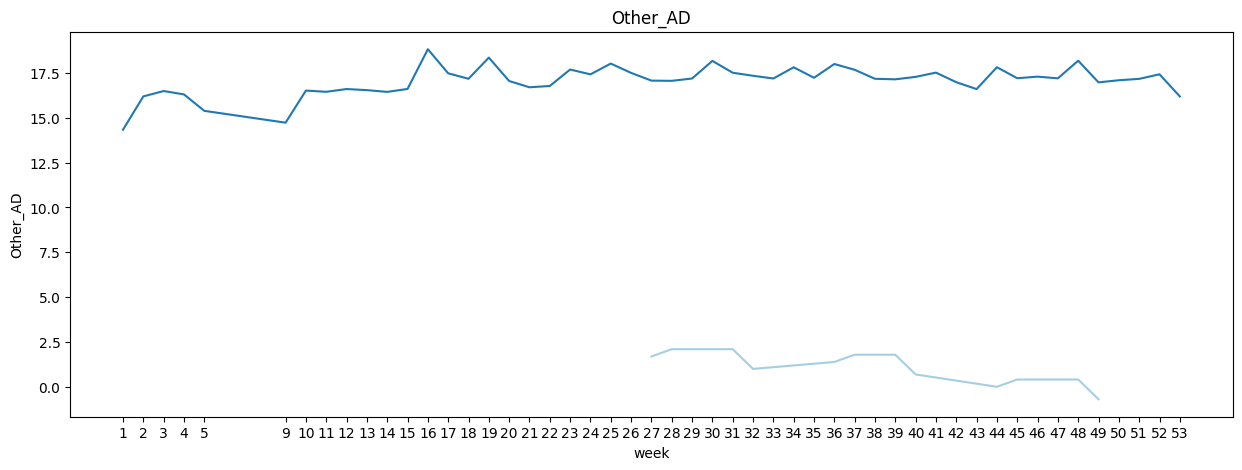

In [1727]:
camera.columns
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=camera_wk['week'],y=nm.log(camera_wk[i]))
    sns.lineplot(x=camera_wk['week'],y=nm.log(camera_wk['gmv']))
    plt.xticks(camera_wk['week'])
    x=x+1
    plt.show()



# tv , online marketing , affliates , radio and other doesnt seems impacting the sales much

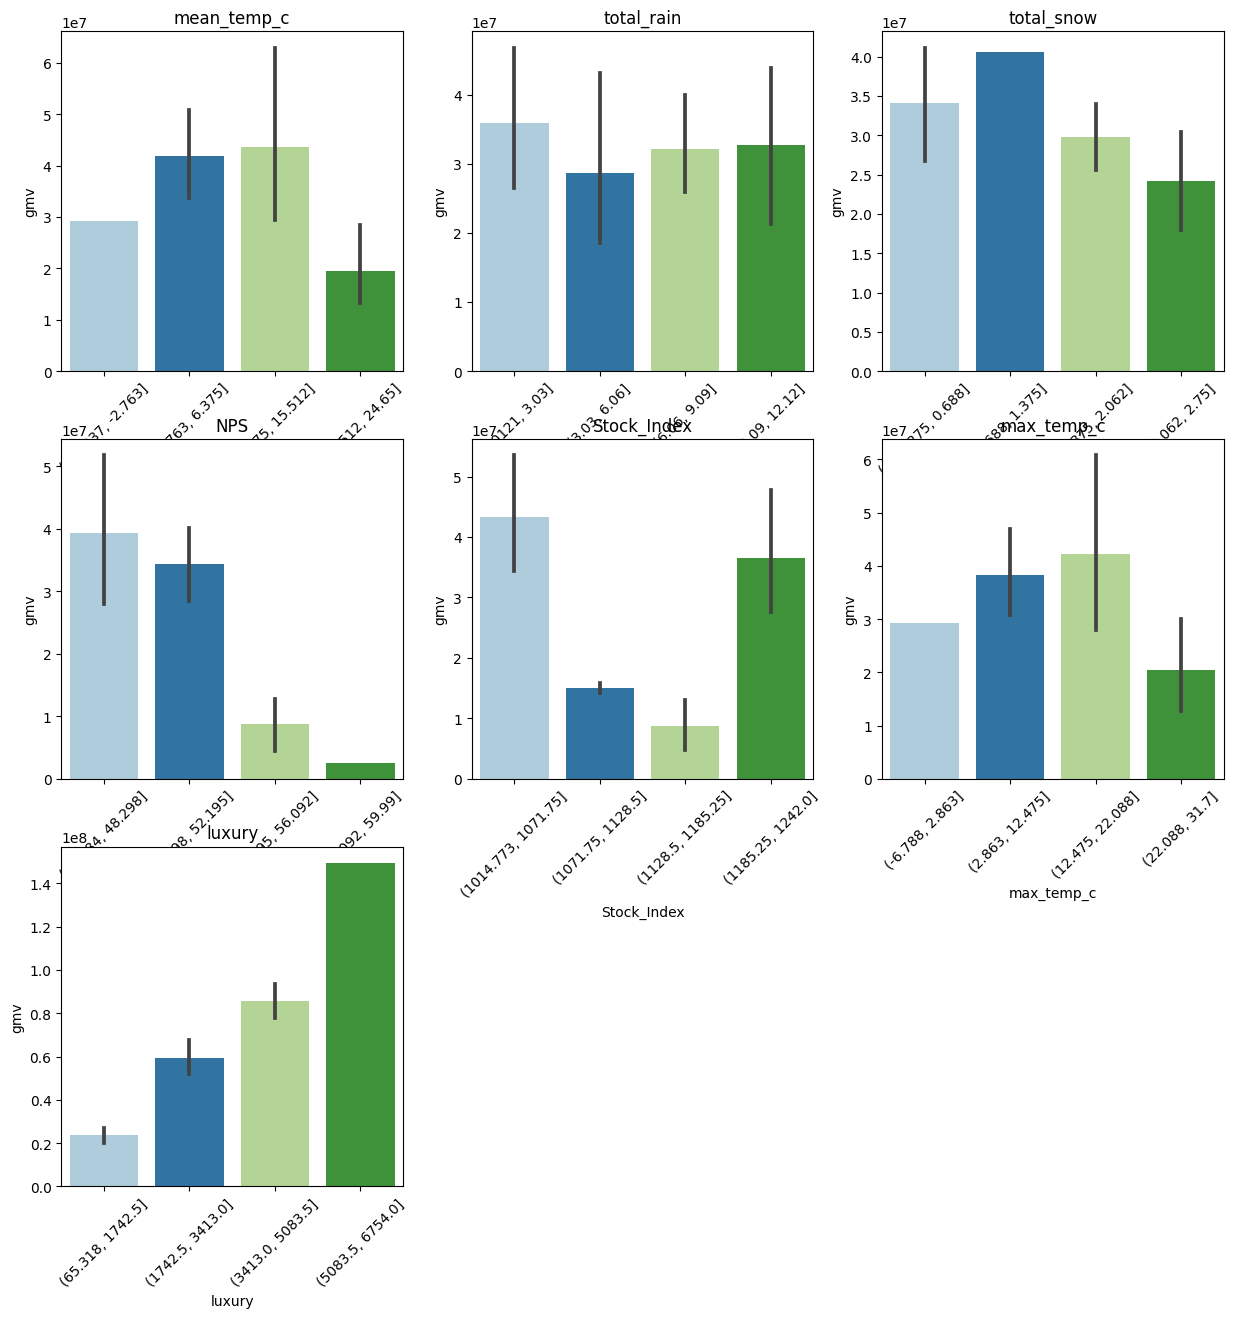

In [1728]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c',"luxury"]

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,3,x)
  plt.title(i)
  sns.barplot(y=camera_wk['gmv'],x=pd.cut(camera_wk[i],bins=4))
  plt.xticks(rotation=45)
  x=x+1

## total rain , stock index looks no pattern

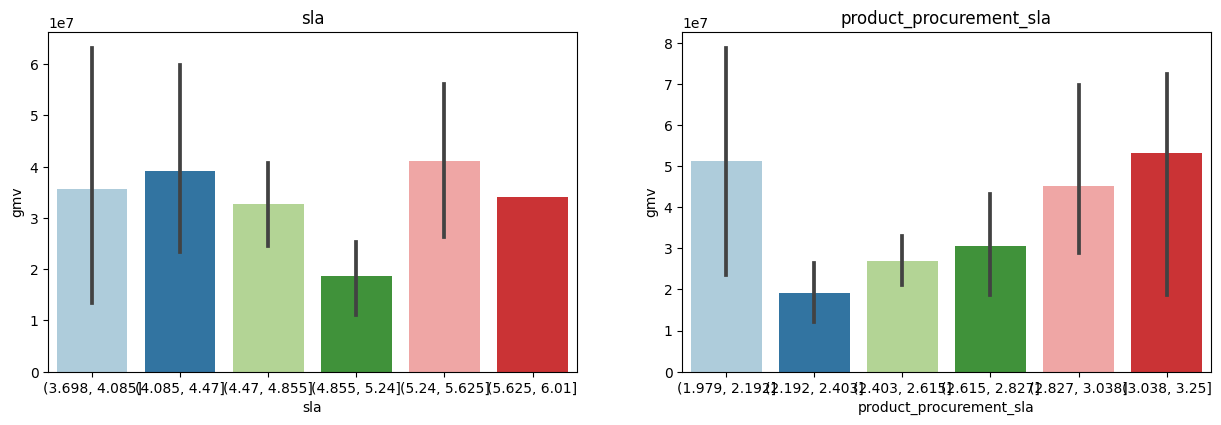

In [1729]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=camera_wk['gmv'],x=pd.cut(camera_wk[i],bins=6))
  x=x+1

# product procurement sla has a pattern , less days probably are cheap products and getting sold out at high number and then high priced product
# taking high procurement time and high gmv
# but doesnt look like a reason of impact

In [1730]:
camera_wk['sales_per']=(camera_wk['num_of_sales'])/7
camera_wk.drop('num_of_sales',1,inplace=True)

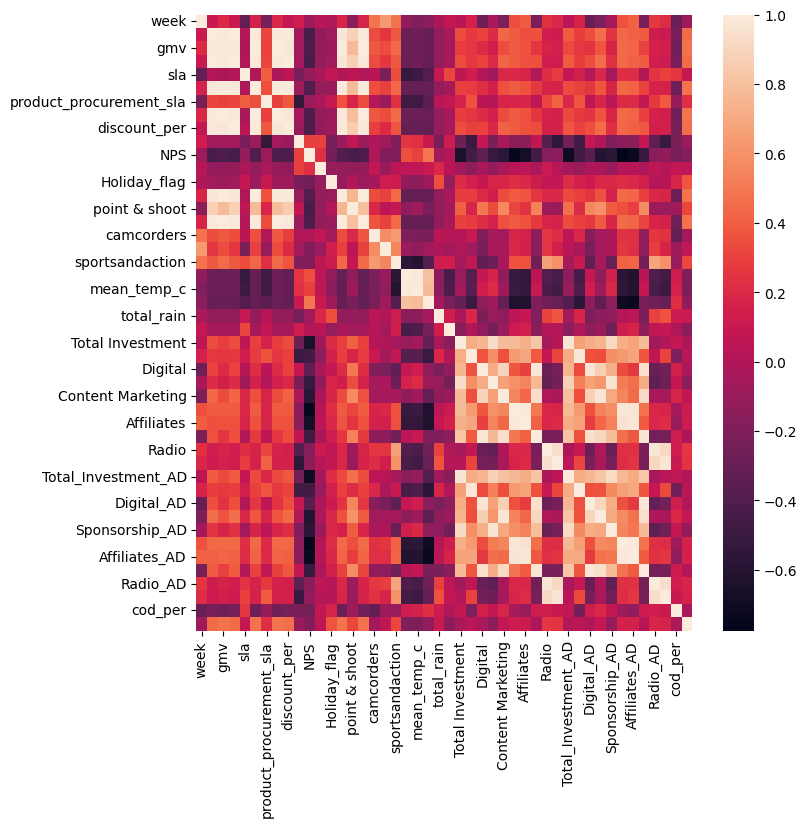

In [1731]:
plt.figure(figsize=(8,8))
sns.heatmap(camera_wk.corr())
plt.show()
# camera

In [1732]:
camera_wk.corr()[(camera_wk.corr()>0.8)|(camera_wk.corr()<-0.8)]


week  order_count       gmv     units  sla  \
week                      1.0          NaN       NaN       NaN  NaN   
order_count               NaN     1.000000  0.983304  0.999869  NaN   
gmv                       NaN     0.983304  1.000000  0.984052  NaN   
units                     NaN     0.999869  0.984052  1.000000  NaN   
sla                       NaN          NaN       NaN       NaN  1.0   
product_mrp               NaN     0.985250  0.997433  0.986146  NaN   
product_procurement_sla   NaN          NaN       NaN       NaN  NaN   
listing_price             NaN     0.984259  0.999892  0.984829  NaN   
discount_per              NaN     0.992702  0.976280  0.993261  NaN   
Stock_Index               NaN          NaN       NaN       NaN  NaN   
NPS                       NaN          NaN       NaN       NaN  NaN   
pay_day_in_wk             NaN          NaN       NaN       NaN  NaN   
Holiday_flag              NaN          NaN       NaN       NaN  NaN   
dslr                      NaN     0.976417  0.993619  0.977697  NaN   
point & shoot             NaN     0.876009       NaN  0.873064  NaN   
luxury                    NaN     0.988205  0.997236  0.989088  NaN   
camcorders                NaN          NaN       NaN       NaN  NaN   
instant cameras           NaN          NaN       NaN       NaN  NaN   
sportsandaction           NaN          NaN       NaN       NaN  NaN   
max_temp_c                NaN          NaN       NaN       NaN  NaN   
mean_temp_c               NaN          NaN       NaN       NaN  NaN   
cool_deg_c                NaN          NaN       NaN       NaN  NaN   
total_rain                NaN          NaN       NaN       NaN  NaN   
total_snow                NaN          NaN       NaN       NaN  NaN   
Total Investment          NaN          NaN       NaN       NaN  NaN   
TV                        NaN          NaN       NaN       NaN  NaN   
Digital                   NaN          NaN       NaN       NaN  NaN   
Sponsorship               NaN          NaN       NaN       NaN  NaN   
Content Marketing         NaN          NaN       NaN       NaN  NaN   
Online marketing          NaN          NaN       NaN       NaN  NaN   
Affiliates                NaN          NaN       NaN       NaN  NaN   
SEM                       NaN          NaN       NaN       NaN  NaN   
Radio                     NaN          NaN       NaN       NaN  NaN   
Other                     NaN          NaN       NaN       NaN  NaN   
Total_Investment_AD       NaN          NaN       NaN       NaN  NaN   
TV_AD                     NaN          NaN       NaN       NaN  NaN   
Digital_AD                NaN          NaN       NaN       NaN  NaN   
Content_Marketing_AD      NaN          NaN       NaN       NaN  NaN   
Sponsorship_AD            NaN          NaN       NaN       NaN  NaN   
Online_marketing_AD       NaN          NaN       NaN       NaN  NaN   
Affiliates_AD             NaN          NaN       NaN       NaN  NaN   
SEM_AD                    NaN          NaN       NaN       NaN  NaN   
Radio_AD                  NaN          NaN       NaN       NaN  NaN   
Other_AD                  NaN          NaN       NaN       NaN  NaN   
cod_per                   NaN          NaN       NaN       NaN  NaN   
sales_per                 NaN          NaN       NaN       NaN  NaN   

                         product_mrp  product_procurement_sla  listing_price  \
week                             NaN                      NaN            NaN   
order_count                 0.985250                      NaN       0.984259   
gmv                         0.997433                      NaN       0.999892   
units                       0.986146                      NaN       0.984829   
sla                              NaN                      NaN            NaN   
product_mrp                 1.000000                      NaN       0.997090   
product_procurement_sla          NaN                      1.0            NaN   
listing_price               0.997090           

In [1733]:
camera_wk.columns
camera_wk.drop([ 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates',
       'SEM', 'Radio', 'Other'],1,inplace=True)

In [1734]:
camera_wk.drop(['NPS','product_procurement_sla','listing_price','Digital_AD','Other_AD','SEM_AD','max_temp_c'],1,inplace=True)

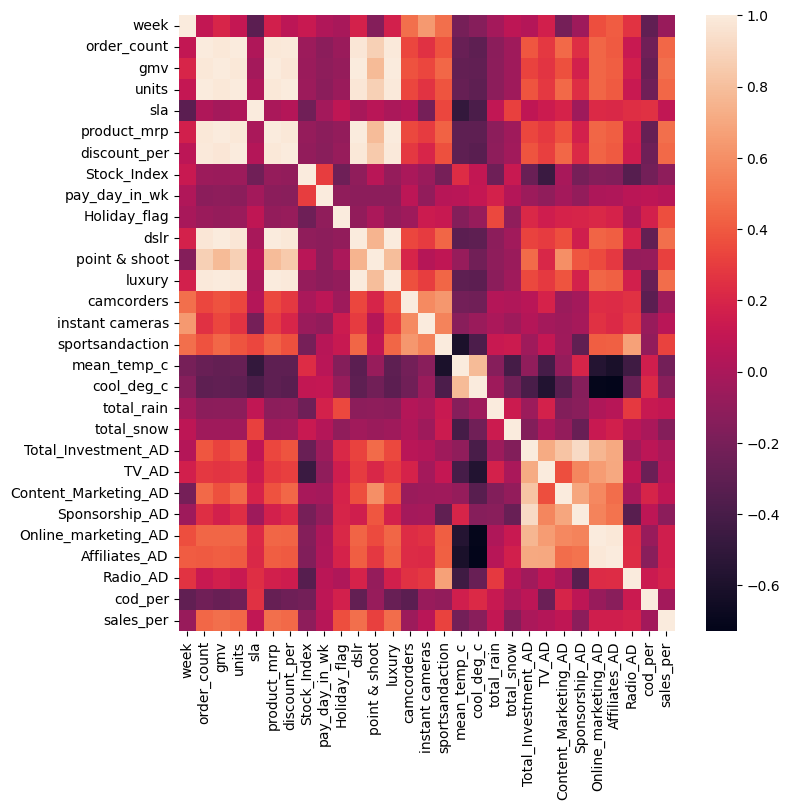

In [1735]:
plt.figure(figsize=(8,8))
sns.heatmap(camera_wk.corr())
plt.show()
# camera

In [1736]:
camera_wk.drop(['cool_deg_c','cod_per'],1,inplace=True)
camera_wk.drop(['total_snow'],1,inplace=True)

In [1737]:
revenue_avg=pd.DataFrame(camera.groupby('product_analytic_vertical').agg(nums=('order_item_id', 'count'),rev=('gmv', nm.sum))).reset_index()

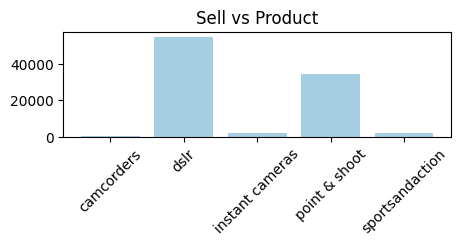

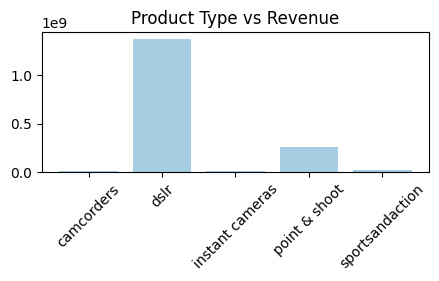

In [1738]:
revenue_avg['avg']=revenue_avg.rev/revenue_avg.nums
plt.figure(figsize=(5,3))
# fig,ax0,ax1 = plt.subplots(2,1)
plt.subplot(2, 1, 2)

plt.bar(x=revenue_avg.product_analytic_vertical,height=revenue_avg.nums)
plt.title("Sell vs Product")
plt.xticks(rotation=45)

plt.show()
plt.figure(figsize=(5,4))
plt.subplot(2, 1, 1)
plt.bar(x=revenue_avg.product_analytic_vertical,height=revenue_avg.rev)
plt.xticks(rotation=45)
plt.title("Product Type vs Revenue")

plt.show()




In [1739]:
# Now for each category :
# Product : Point & shoot , Camorders , dslt and sportsandaction, Luxury
# Customer : Stock_Index , pay_day,sla and holiday_flag
# Pricing : discount_per, gmv,sales_per
# Ads : Total , TV, Content,Sponsorship, Online, Radio
# Weather : Mean temp and rain

Camera Modeling


In [1740]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [1741]:
camera_wk.head()

week  order_count         gmv  units   sla  product_mrp  discount_per  \
0     1          183   1683100.0    187  4.97      2075447         50.14   
1     2          866  10776027.0    871  4.73     13665461        218.17   
2     3         1053  14527023.0   1065  4.30     18871251        223.39   
3     4          849  12022872.0    856  4.31     15082885        165.17   
4     5          373   4812133.0    380  4.14      6130674         82.01   

   Stock_Index  pay_day_in_wk  Holiday_flag  ...  mean_temp_c  total_rain  \
0       1177.0              0             1  ...    19.800000    1.433333   
1       1177.0              0             1  ...    20.483333    3.283333   
2       1177.0              0             1  ...    22.883333    1.100000   
3       1177.0              0             1  ...    23.716667    0.771429   
4       1177.0              1             1  ...    23.940000    5.560000   

   Total_Investment_AD  TV_AD  Content_Marketing_AD  Sponsorship_AD  \
0                 4.27   0.05                   0.0            1.85   
1                 6.40   0.08                   0.0            2.78   
2                 6.40   0.08                   0.0            2.78   
3                 6.40   0.08                   0.0            2.78   
4                 3.15   0.03                   0.0            1.14   

   Online_marketing_AD  Affiliates_AD  Radio_AD  sales_per  
0                 0.33           0.14       0.0   0.000000  
1                 0.50           0.21       0.0   0.000000  
2                 0.50           0.21       0.0   0.285714  
3                 0.50           0.21       0.0   0.000000  
4                 0.19           0.08       0.0   0.000000  

[5 rows x 26 columns]

In [1742]:
camera_wk.drop(['units','order_count','product_mrp','week'],1,inplace=True)


In [1743]:
## dropping other variables who doesnt look like havong an impact from analysis done above
# total rain, nps,tv , online marketing , affliates , radio and other ads doesnt seems impacting the sales much
# camera_wk.drop(['Other_AD','total_rain','listing_price','Others'],1,inplace=True)

In [1744]:
# camera_wk.drop('Holiday_flag',1,inplace=True)
# camera_wk.drop('cool_deg_c',1,inplace=True)

In [1745]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(camera_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1746]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train

In [1747]:
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train

In [1748]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1749]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [1750]:
## as variables are more than observations check RFE method
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=12, step=1)

In [1751]:
selector.fit(X_train, y_train)

# print(selector.support_)
# print(selector.ranking_)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['sla', 'discount_per', 'pay_day_in_wk', 'dslr', 'point & shoot',
       'luxury', 'camcorders', 'total_rain', 'Total_Investment_AD',
       'Content_Marketing_AD', 'Online_marketing_AD', 'sales_per'],
      dtype='object')

In [1752]:
list(features)

['sla',
 'discount_per',
 'pay_day_in_wk',
 'dslr',
 'point & shoot',
 'luxury',
 'camcorders',
 'total_rain',
 'Total_Investment_AD',
 'Content_Marketing_AD',
 'Online_marketing_AD',
 'sales_per']

In [1753]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3994.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           8.27e-34
Time:                        12:11:32   Log-Likelihood:                 141.74
No. Observations:                  35   AIC:                            -257.5
Df Residuals:                      22   BIC:                            -237.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0126 

Features      VIF
3                   dslr  4780.12
5                 luxury  4534.56
1           discount_per   413.32
4          point & shoot   113.56
10   Online_marketing_AD    28.61
8    Total_Investment_AD    23.91
9   Content_Marketing_AD    11.57
0                    sla     8.52
6             camcorders     7.83
7             total_rain     3.56
11             sales_per     2.51
2          pay_day_in_wk     2.17

In [1754]:
features=features.drop('Total_Investment_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4136.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           3.59e-35
Time:                        12:11:32   Log-Likelihood:                 140.05
No. Observations:                  35   AIC:                            -256.1
Df Residuals:                      23   BIC:                            -237.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0137 

Features      VIF
3                   dslr  4768.58
5                 luxury  4509.28
1           discount_per   409.54
4          point & shoot   113.40
9    Online_marketing_AD    19.51
0                    sla     8.49
6             camcorders     7.83
8   Content_Marketing_AD     6.44
7             total_rain     3.51
10             sales_per     2.43
2          pay_day_in_wk     1.92

In [1755]:

features=features.drop('pay_day_in_wk')
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4728.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           5.28e-37
Time:                        12:11:32   Log-Likelihood:                 139.98
No. Observations:                  35   AIC:                            -258.0
Df Residuals:                      24   BIC:                            -240.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0136 

Features      VIF
2                  dslr  4739.10
4                luxury  4433.55
1          discount_per   403.02
3         point & shoot   112.61
8   Online_marketing_AD    18.19
0                   sla     8.47
5            camcorders     7.73
7  Content_Marketing_AD     5.42
6            total_rain     2.98
9             sales_per     2.40

In [1756]:
features=features.drop('sales_per',1)
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5407.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           7.99e-39
Time:                        12:11:32   Log-Likelihood:                 139.77
No. Observations:                  35   AIC:                            -259.5
Df Residuals:                      25   BIC:                            -244.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0140 

Features      VIF
2                  dslr  4625.67
4                luxury  4226.75
1          discount_per   402.38
3         point & shoot   111.01
8   Online_marketing_AD    18.16
0                   sla     8.46
5            camcorders     6.52
7  Content_Marketing_AD     5.36
6            total_rain     2.73

In [1757]:
features=features.drop('camcorders')
X_train_m==build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5693.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           3.80e-40
Time:                        12:11:32   Log-Likelihood:                 137.92
No. Observations:                  35   AIC:                            -257.8
Df Residuals:                      26   BIC:                            -243.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0138 

Features      VIF
2                  dslr  2838.61
4                luxury  2147.42
1          discount_per   391.03
3         point & shoot    81.88
7   Online_marketing_AD    18.15
0                   sla     8.01
6  Content_Marketing_AD     5.36
5            total_rain     2.45

In [1758]:
features=features.drop('Online_marketing_AD')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6578.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           6.34e-42
Time:                        12:11:32   Log-Likelihood:                 137.46
No. Observations:                  35   AIC:                            -258.9
Df Residuals:                      27   BIC:                            -246.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0129 

Features      VIF
2                  dslr  2803.91
4                luxury  2142.24
1          discount_per   332.99
3         point & shoot    81.61
0                   sla     5.10
6  Content_Marketing_AD     3.24
5            total_rain     2.18

In [1759]:
features=features.drop('luxury')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6078.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.93e-42
Time:                        12:11:32   Log-Likelihood:                 132.74
No. Observations:                  35   AIC:                            -251.5
Df Residuals:                      28   BIC:                            -240.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0148 

Features     VIF
1          discount_per  149.78
2                  dslr  100.58
3         point & shoot   14.41
5  Content_Marketing_AD    3.02
0                   sla    2.87
4            total_rain    1.76

In [1760]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
cam_model1=lm.params

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              9597.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                    1.92e-46
Time:                        12:11:32   Log-Likelihood:                          125.32
No. Observations:                  35   AIC:                                     -238.6
Df Residuals:                      29   BIC:                                     -229.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

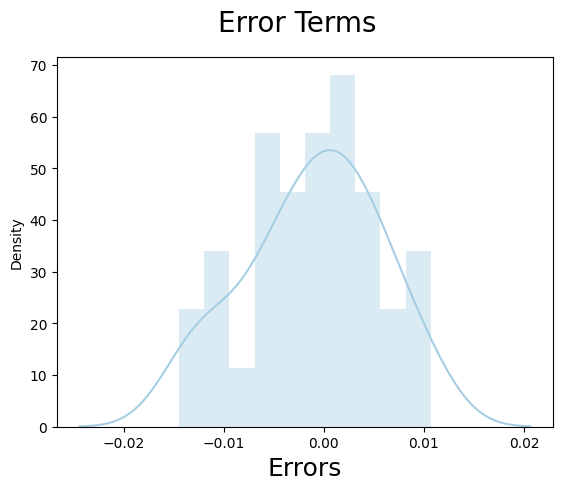

In [1761]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


Text(0, 0.5, 'y_pred')

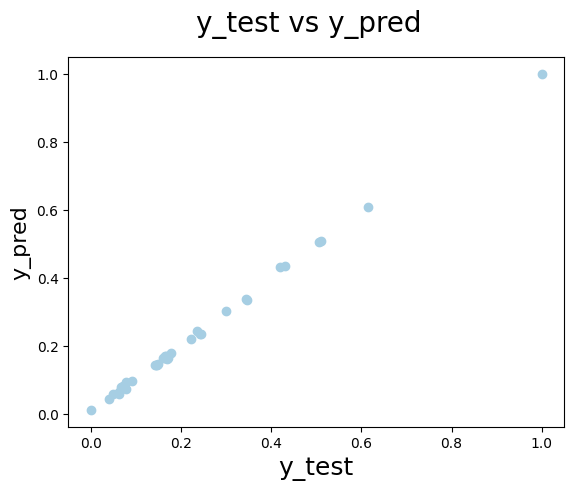

In [1762]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [1763]:
## on test
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]

In [1764]:
y_test_pred=lm.predict(X_test)

Text(0, 0.5, 'y_test_pred')

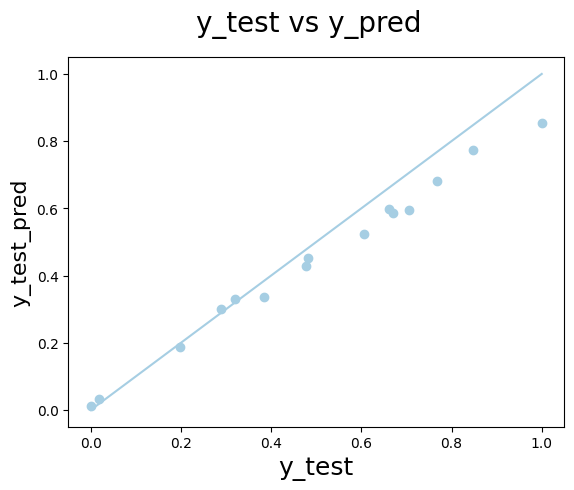

In [1548]:
# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

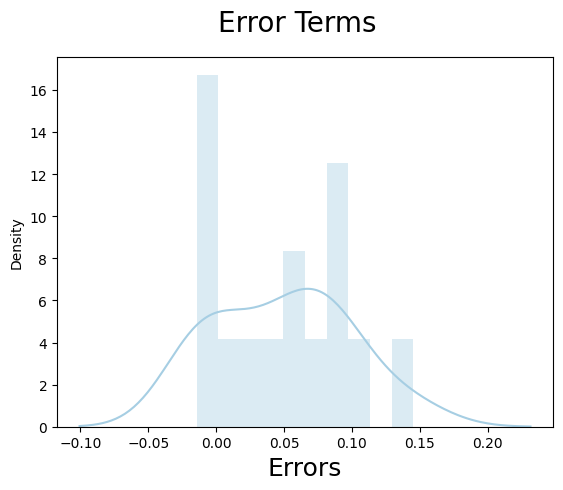

In [1549]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


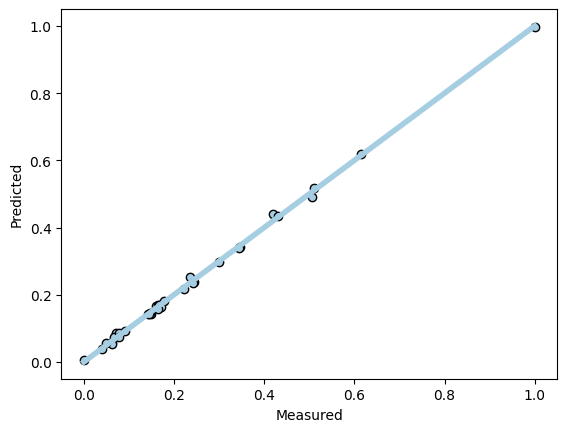

In [1550]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [1551]:
cam_feat=features

In [1552]:
cam_model1_x=pd.DataFrame(cam_model1)

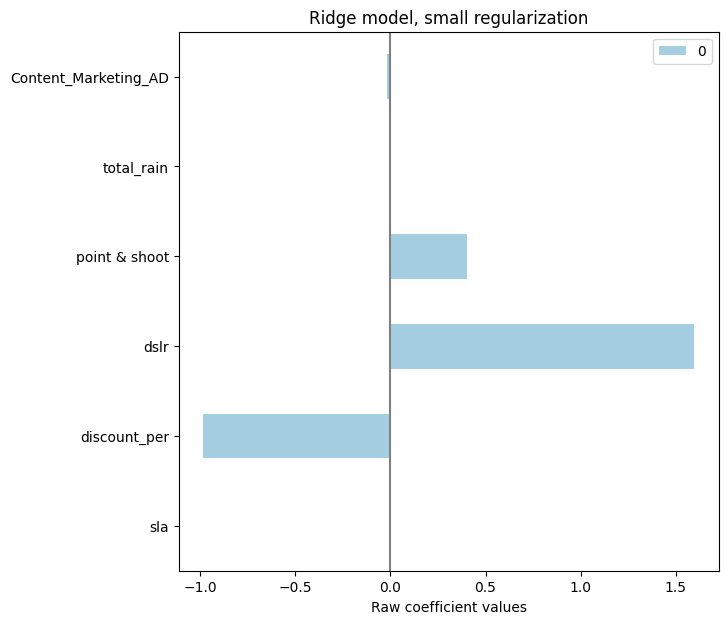

In [1553]:
cam_model1_x.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

Multiplicative

In [1554]:

# camera_wk=camera.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
#                                         'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
#                                          'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
#                                           'sale_date':"nunique"}).round(2)

# camera_wk=pd.merge(camera_wk,weekly_kpis,on='week')


# camera_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
#        'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

# # camera_wk.sale_date.value_counts()
# camera_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
# camera_wk["cod_per"]=camera_wk["order_payment_cod"]/camera_wk["order_count"]
# camera_wk.drop("order_payment_cod",1,inplace=True)
# camera_wk.rename(columns={"sale_date":"num_of_sales"},inplace=True)
# camera_wk['sales_per']=((camera_wk['num_of_sales']-1)/7)*100
# camera_wk.drop('num_of_sales',1,inplace=True)

In [1555]:

# camera_wk.drop(['units','order_count','product_mrp'],1,inplace=True)
# camera_wk.drop(['Other_AD','Radio_AD','Online_marketing_AD','Affiliates_AD','total_rain','NPS'],1,inplace=True)
# camera_wk.drop(['sla','product_procurement_sla'],1,inplace=True)
# camera_wk.drop('cool_deg_c',1,inplace=True)

In [1556]:
camera_wk[camera_wk.columns]=nm.log(camera_wk[camera_wk.columns])
# camera_wk.columns

In [1557]:
camera_wk.describe()

camera_wk=camera_wk.replace([nm.inf, -nm.inf], 0)
camera_wk=camera_wk.fillna(0)



In [1558]:
df_train, df_test = train_test_split(camera_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1559]:
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)
# X_train.columns
#
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['sla', 'discount_per', 'Holiday_flag', 'dslr', 'point & shoot',
       'luxury', 'camcorders', 'sportsandaction', 'total_rain',
       'Total_Investment_AD', 'TV_AD', 'Content_Marketing_AD',
       'Online_marketing_AD', 'Affiliates_AD', 'sales_per'],
      dtype='object')

In [1560]:
m1=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     925.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           6.03e-24
Time:                        11:58:58   Log-Likelihood:                 121.87
No. Observations:                  35   AIC:                            -211.7
Df Residuals:                      19   BIC:                            -186.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0124 

Features       VIF
13         Affiliates_AD  26071.00
12   Online_marketing_AD  24305.47
5                 luxury   2490.74
3                   dslr   1626.36
1           discount_per    839.01
10                 TV_AD    625.12
9    Total_Investment_AD    476.44
4          point & shoot     72.33
6             camcorders     46.53
7        sportsandaction     36.16
11  Content_Marketing_AD     25.53
0                    sla     24.44
14             sales_per     13.98
8             total_rain     13.56
2           Holiday_flag      1.94

In [1561]:
features=features.drop('Holiday_flag',1)
m1=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1043.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.83e-25
Time:                        11:58:58   Log-Likelihood:                 121.86
No. Observations:                  35   AIC:                            -213.7
Df Residuals:                      20   BIC:                            -190.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0131 

Features       VIF
12         Affiliates_AD  25459.89
11   Online_marketing_AD  23592.89
4                 luxury   2389.91
2                   dslr   1621.09
1           discount_per    826.88
9                  TV_AD    623.42
8    Total_Investment_AD    443.32
3          point & shoot     69.34
5             camcorders     46.10
6        sportsandaction     32.46
10  Content_Marketing_AD     24.91
0                    sla     23.11
13             sales_per     11.86
7             total_rain     11.85

In [1562]:
features=features.drop('sportsandaction',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1177.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           5.24e-27
Time:                        11:58:58   Log-Likelihood:                 121.83
No. Observations:                  35   AIC:                            -215.7
Df Residuals:                      21   BIC:                            -193.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0138 

Features       VIF
11         Affiliates_AD  22720.26
10   Online_marketing_AD  20651.67
4                 luxury   2384.11
2                   dslr   1508.23
1           discount_per    797.76
8                  TV_AD    596.46
7    Total_Investment_AD    388.46
3          point & shoot     66.12
5             camcorders     33.74
9   Content_Marketing_AD     24.35
0                    sla     22.20
6             total_rain     11.36
12             sales_per     10.74

In [1563]:
features=features.drop('Total_Investment_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1328.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.49e-28
Time:                        11:58:58   Log-Likelihood:                 121.72
No. Observations:                  35   AIC:                            -217.4
Df Residuals:                      22   BIC:                            -197.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0149 

Features      VIF
10         Affiliates_AD  8453.02
9    Online_marketing_AD  6816.36
4                 luxury  2161.13
2                   dslr  1382.99
1           discount_per   781.64
7                  TV_AD   131.86
3          point & shoot    64.54
5             camcorders    33.06
0                    sla    19.15
8   Content_Marketing_AD    13.69
6             total_rain    10.95
11             sales_per    10.69

In [1564]:
features=features.drop('Affiliates_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1426.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           7.39e-30
Time:                        11:58:58   Log-Likelihood:                 120.66
No. Observations:                  35   AIC:                            -217.3
Df Residuals:                      23   BIC:                            -198.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.637e-05 

Features      VIF
4                 luxury  2094.91
2                   dslr  1360.05
1           discount_per   672.45
9    Online_marketing_AD   123.74
7                  TV_AD    91.87
3          point & shoot    64.39
5             camcorders    32.87
0                    sla    17.09
8   Content_Marketing_AD    13.52
10             sales_per    10.69
6             total_rain     8.99

In [1565]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1594.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.41e-31
Time:                        11:58:59   Log-Likelihood:                 120.21
No. Observations:                  35   AIC:                            -218.4
Df Residuals:                      24   BIC:                            -201.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0041 

Features      VIF
4                luxury  2089.84
2                  dslr  1359.95
1          discount_per   668.53
9   Online_marketing_AD   123.08
7                 TV_AD    77.93
3         point & shoot    63.59
5            camcorders    26.82
8  Content_Marketing_AD    13.02
0                   sla    11.76
6            total_rain     7.79

In [1566]:
features=features.drop('camcorders',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1845.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           5.42e-33
Time:                        11:58:59   Log-Likelihood:                 120.21
No. Observations:                  35   AIC:                            -220.4
Df Residuals:                      25   BIC:                            -204.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0041 

Features      VIF
4                luxury  1634.23
2                  dslr  1356.52
1          discount_per   424.51
8   Online_marketing_AD   121.98
6                 TV_AD    77.87
3         point & shoot    63.47
7  Content_Marketing_AD    10.67
0                   sla    10.37
5            total_rain     7.69

In [1567]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2077.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.84e-34
Time:                        11:58:59   Log-Likelihood:                 119.54
No. Observations:                  35   AIC:                            -221.1
Df Residuals:                      26   BIC:                            -207.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0012 

Features      VIF
4                luxury  1608.81
2                  dslr  1338.43
1          discount_per   368.94
3         point & shoot    63.25
6                 TV_AD    19.88
7  Content_Marketing_AD    10.65
0                   sla     9.71
5            total_rain     7.58

In [1568]:
features=features.drop('sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2408.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           4.87e-36
Time:                        11:58:59   Log-Likelihood:                 119.12
No. Observations:                  35   AIC:                            -222.2
Df Residuals:                      27   BIC:                            -209.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0024 

Features      VIF
3                luxury  1505.38
1                  dslr  1131.28
0          discount_per   344.39
2         point & shoot    59.28
5                 TV_AD    13.60
6  Content_Marketing_AD     9.95
4            total_rain     6.86

In [1569]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2753.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.89e-37
Time:                        11:58:59   Log-Likelihood:                 118.14
No. Observations:                  35   AIC:                            -222.3
Df Residuals:                      28   BIC:                            -211.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0094      0.010     -0.928

Features      VIF
3         luxury  1503.57
1           dslr  1086.22
0   discount_per   320.28
2  point & shoot    54.65
5          TV_AD    13.59
4     total_rain     5.46

In [1570]:
features=features.drop('total_rain',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3137.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.07e-38
Time:                        11:58:59   Log-Likelihood:                 116.62
No. Observations:                  35   AIC:                            -221.2
Df Residuals:                      29   BIC:                            -211.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0023      0.007      0.311

Features      VIF
3         luxury  1285.74
1           dslr   910.28
0   discount_per   319.35
2  point & shoot    43.35
4          TV_AD    11.97

In [1571]:
lm_m = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm_m.summary()) # model summary
y_train_pred=lm_m.predict(X_train[features])
cam_features1=features
cam_model2=lm_m

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.570e+04
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                    1.63e-53
Time:                        11:58:59   Log-Likelihood:                          116.56
No. Observations:                  35   AIC:                                     -223.1
Df Residuals:                      30   BIC:                                     -215.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Mean_Squared_Error : 7.497567090281535e-05
r_square_value : 0.9981480864352477


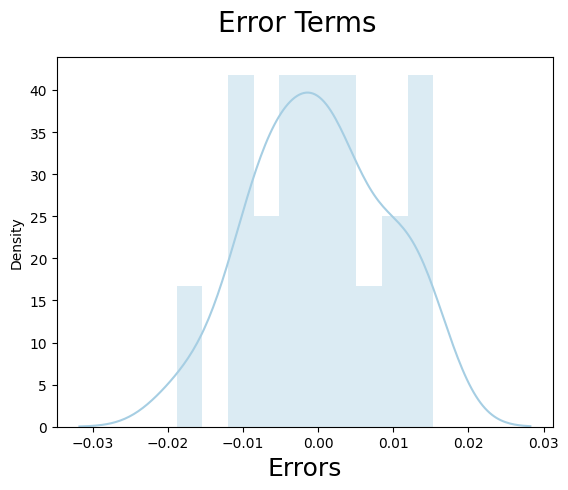

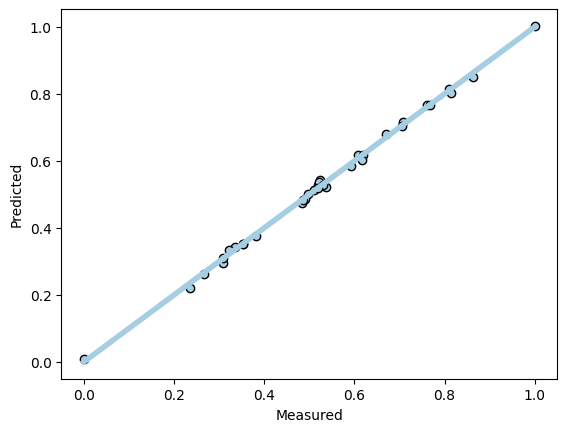

In [1572]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


fig, ax = plt.subplots()
ax.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [1573]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)
scores


array([0.9937479 , 0.99957992, 0.99119554, 0.99826703, 0.99618264,
       0.99629403, 0.99228761, 0.98563937, 0.98665306, 0.99640583])

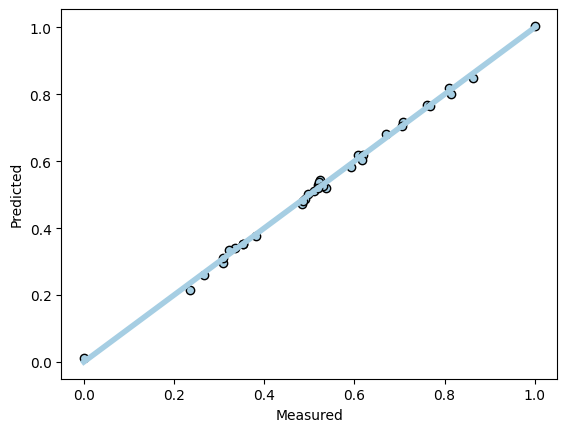

In [1574]:

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [1575]:
df_test[df_test.columns]=scaler.fit_transform(df_test[df_test.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']


In [1576]:
y_test_pred= lm_m.predict(X_test[features])

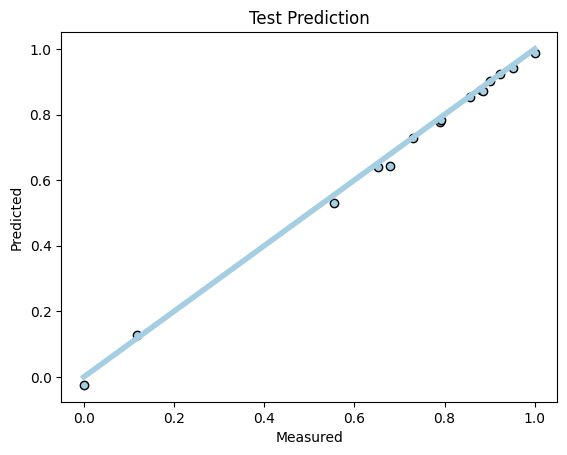

In [1580]:
y_test.min()
y_test.max()
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],lw=4)
plt.title("Test Prediction")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

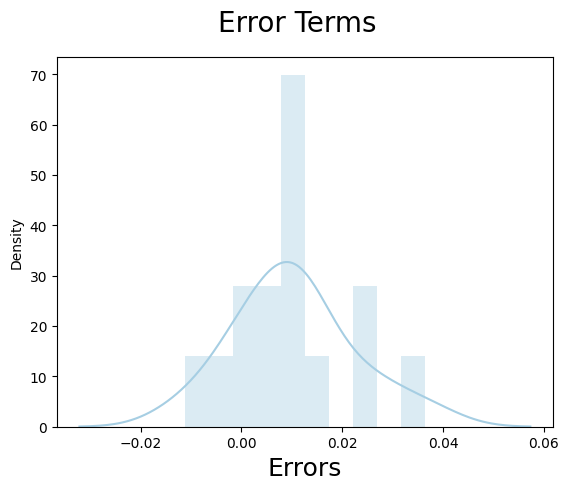

In [1581]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [1582]:
cam_features2=pd.DataFrame(cam_model2.params)

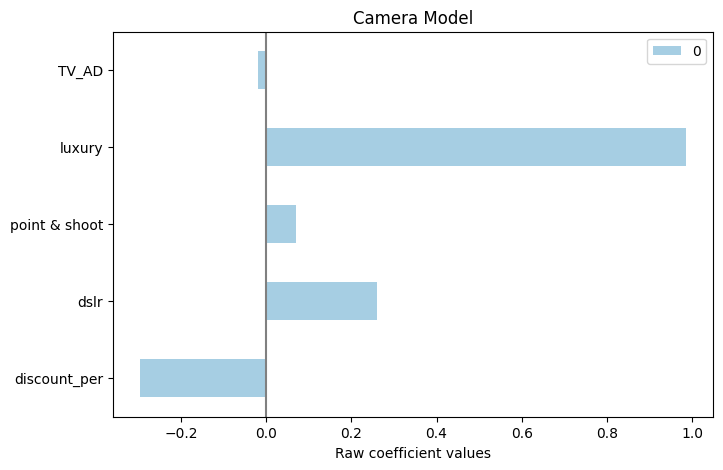

In [1583]:
cam_features2.plot.barh(figsize=(10, 5))
plt.title("Camera Model")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

# Home Audio

In [1584]:
##
ha=EleData3[EleData3.product_analytic_sub_category=='homeaudio']
# camera.discount_per
# EleData3.product_analytic_sub_category.value_counts()

In [1585]:
ha.isnull().sum()
## analysis and all pending
ha_dummies=pd.get_dummies(ha.product_analytic_vertical)
ha=pd.concat([ha,ha_dummies],axis=1)

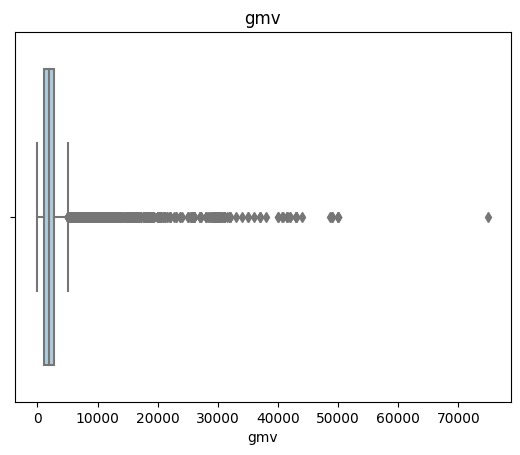

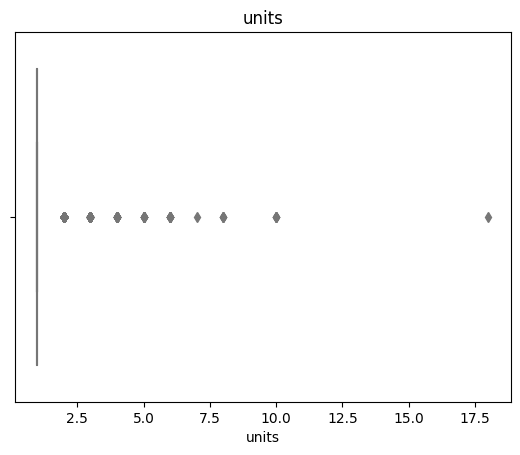

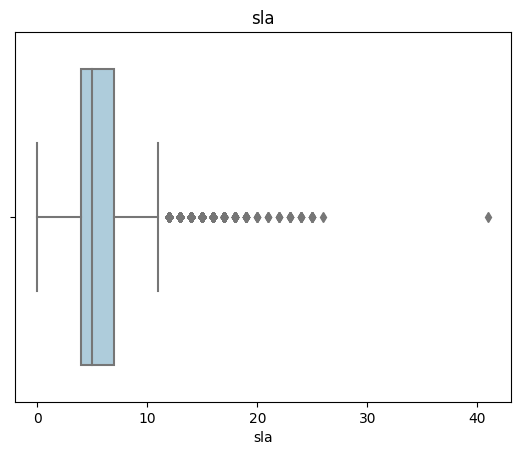

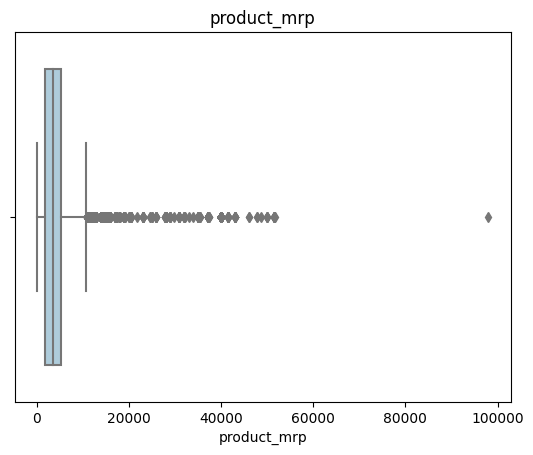

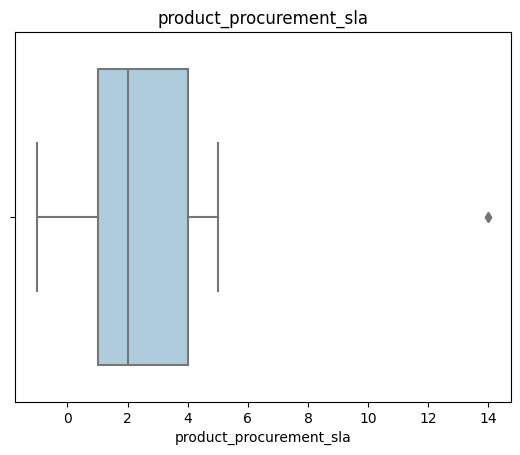

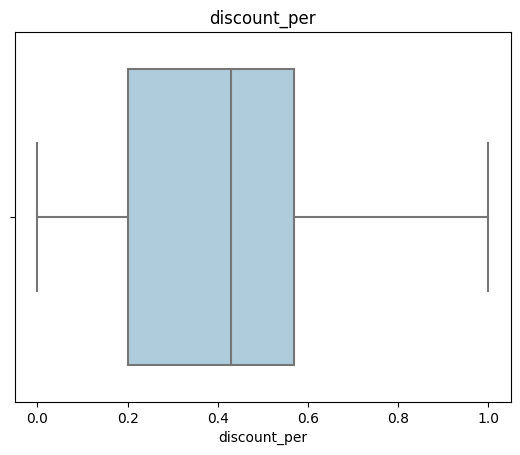

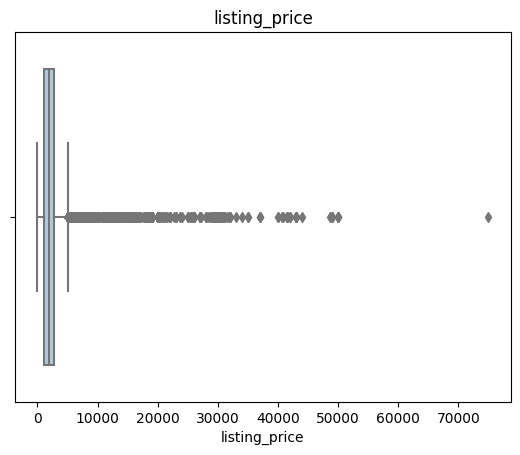

In [1586]:
for i in num:
  sns.boxplot(x=ha[i])
  plt.title(i)
  plt.show()


In [1587]:


# q1=ha['product_mrp'].quantile(0.25)
# q3=ha['product_mrp'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# # ha[ha['product_mrp']>112000]
# ha.loc[ha['product_mrp']>up,'product_mrp']=up
# ha.loc[ha['product_mrp']<lw,'product_mrp']=lw


# q1=ha['gmv'].quantile(0.25)
# q3=ha['gmv'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# ha.loc[ha['gmv']>up,'gmv']=up
# ha.loc[ha['gmv']<lw,'gmv']=lw


# q1=ha['listing_price'].quantile(0.25)
# q3=ha['listing_price'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# ha.loc[ha['listing_price']>up,'listing_price']=up
# ha.loc[ha['listing_price']<lw,'listing_price']=lw


# q1=ha['discount_per'].quantile(0.25)
# q3=ha['discount_per'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# ha.loc[ha['discount_per']>up,'discount_per']=up
# ha.loc[ha['discount_per']<lw,'discount_per']=lw

# ha[ha['discount_per']>1.39]
q1=ha['sla'].quantile(0.25)
q3=ha['sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['sla']>up,'sla']=up
ha.loc[ha['sla']<lw,'sla']=lw
q1=ha['product_procurement_sla'].quantile(0.25)
q3=ha['product_procurement_sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['product_procurement_sla']>up,'product_procurement_sla']=up
ha.loc[ha['product_procurement_sla']<lw,'product_procurement_sla']=lw

-0.5   11.5
-3.5   8.5


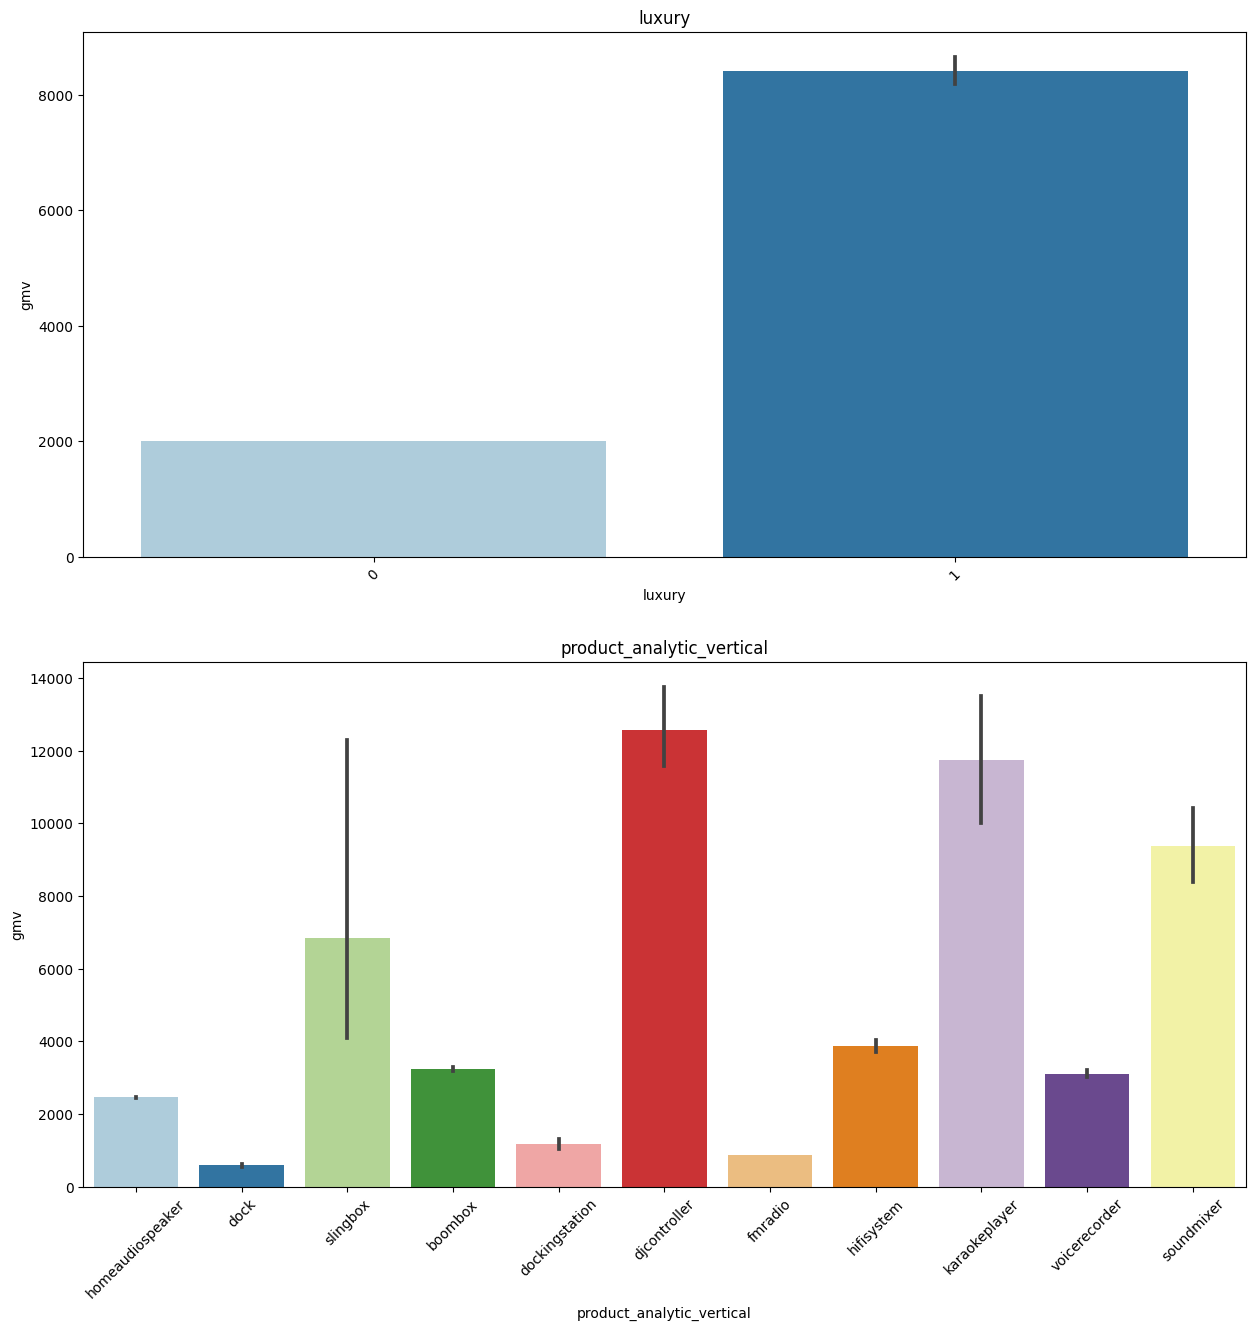

In [1588]:
p = ['luxury','product_analytic_vertical']

plt.figure(figsize=(15, 15))
x=1
for i in p:
  plt.subplot(2,1,x)
  plt.title(i)
  sns.barplot(y=ha['gmv'],x=ha[i])
  plt.xticks(rotation=45)
  x=x+1



In [1589]:
ha.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived', 'week', 'listing_price',
       'discount_per', 'sale_date', 'Stock_Index', 'NPS', 'Year',
       'pay_date_flag', 'Holiday_flag', 'luxury', 'boombox', 'djcontroller',
       'dock', 'dockingstation', 'fmradio', 'hifisystem', 'homeaudiospeaker',
       'karaokeplayer', 'slingbox', 'soundmixer', 'voicerecorder'],
      dtype='object')

In [1590]:
revenue_avg=pd.DataFrame(ha.groupby('product_analytic_vertical').agg(nums=('order_item_id', 'count'),rev=('gmv', nm.sum))).reset_index()

In [1591]:
revenue_avg['avg']=revenue_avg.rev/revenue_avg.nums

In [1592]:
revenue_avg

product_analytic_vertical   nums           rev           avg
0                    boombox   2390  7.732093e+06   3235.185356
1               djcontroller    186  2.335536e+06  12556.645161
2                       dock   1836  1.085407e+06    591.180283
3             dockingstation    320  3.776040e+05   1180.012500
4                    fmradio  21580  1.871460e+07    867.219880
5                 hifisystem   1376  5.323643e+06   3868.926599
6           homeaudiospeaker  78626  1.938923e+08   2466.006977
7              karaokeplayer      2  2.350000e+04  11750.000000
8                   slingbox      3  2.049500e+04   6831.666667
9                 soundmixer     65  6.088680e+05   9367.200000
10             voicerecorder   3367  1.048322e+07   3113.520048

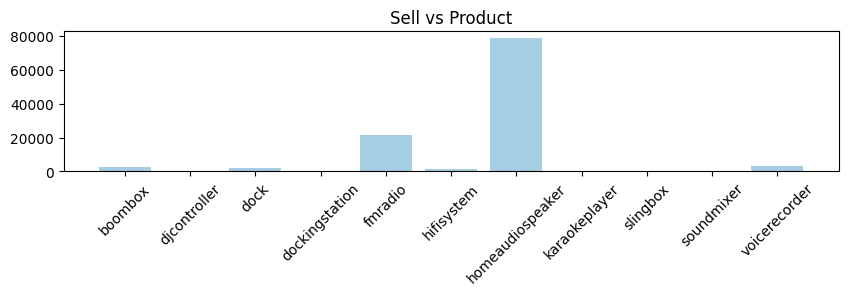

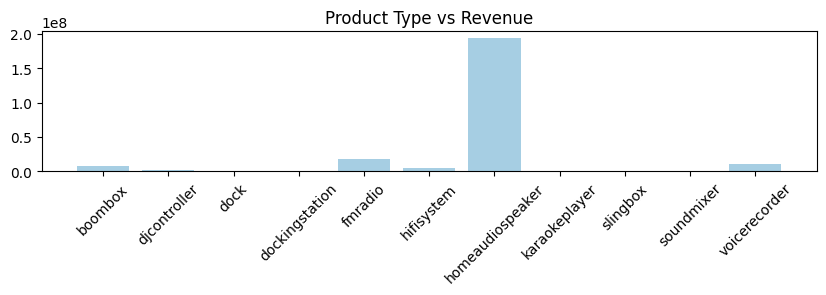

In [1593]:
revenue_avg['avg']=revenue_avg.rev/revenue_avg.nums
plt.figure(figsize=(10,4))
plt.subplot(2, 1, 2)





plt.bar(x=revenue_avg.product_analytic_vertical,height=revenue_avg.nums)
plt.title("Sell vs Product")
plt.xticks(rotation=45)

plt.show()
plt.figure(figsize=(10,4))
plt.subplot(2, 1, 1)
plt.bar(x=revenue_avg.product_analytic_vertical,height=revenue_avg.rev)
plt.xticks(rotation=45)
plt.title("Product Type vs Revenue")

plt.show()




In [1594]:

ha_wk=ha.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique","fmradio":"sum","homeaudiospeaker":"sum",
                                'luxury':'sum', 'boombox':'sum', 'djcontroller':'sum','dock':'sum', 'dockingstation':'sum', 'fmradio':'sum', 'hifisystem':'sum', 'homeaudiospeaker':'sum',
                                'karaokeplayer':'sum', 'slingbox':'sum', 'soundmixer':'sum', 'voicerecorder':'sum'}).round(2)

ha_wk=pd.merge(ha_wk,weekly_kpis,on='week')

ha_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

ha_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

ha_wk.order_payment_type.value_counts()
ha_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
ha_wk["cod_per"]=ha_wk["order_payment_cod"]/ha_wk["order_count"]
ha_wk.drop("order_payment_cod",1,inplace=True)
ha_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)


In [1595]:
ha_wk['sales_per']=(ha_wk['num_of_sales']-1)/7
ha_wk.drop('num_of_sales',1,inplace=True)

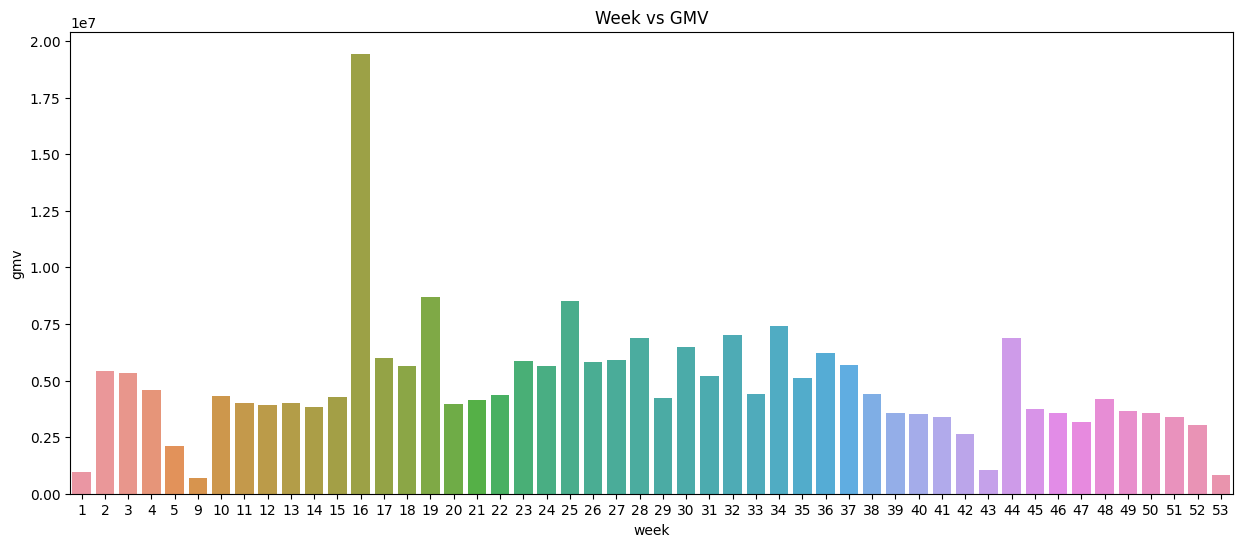

In [1596]:
plt.figure(figsize=(15,6))
sns.barplot(x=ha_wk['week'],y=ha_wk['gmv'])
plt.title("Week vs GMV")
plt.show()

### 16 , 19 , 25, 30 ,32,34  ,44 week

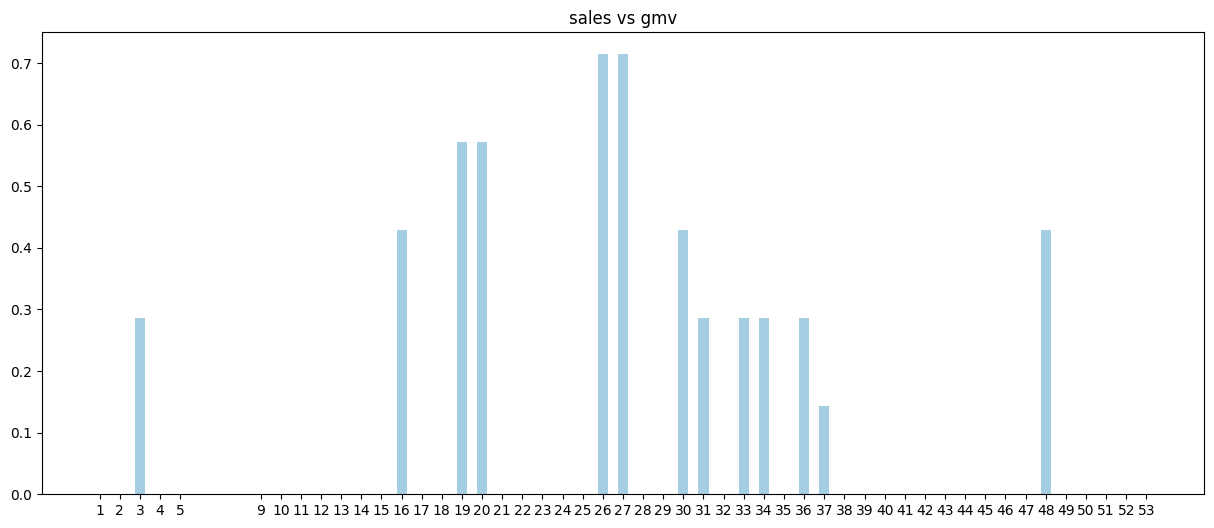

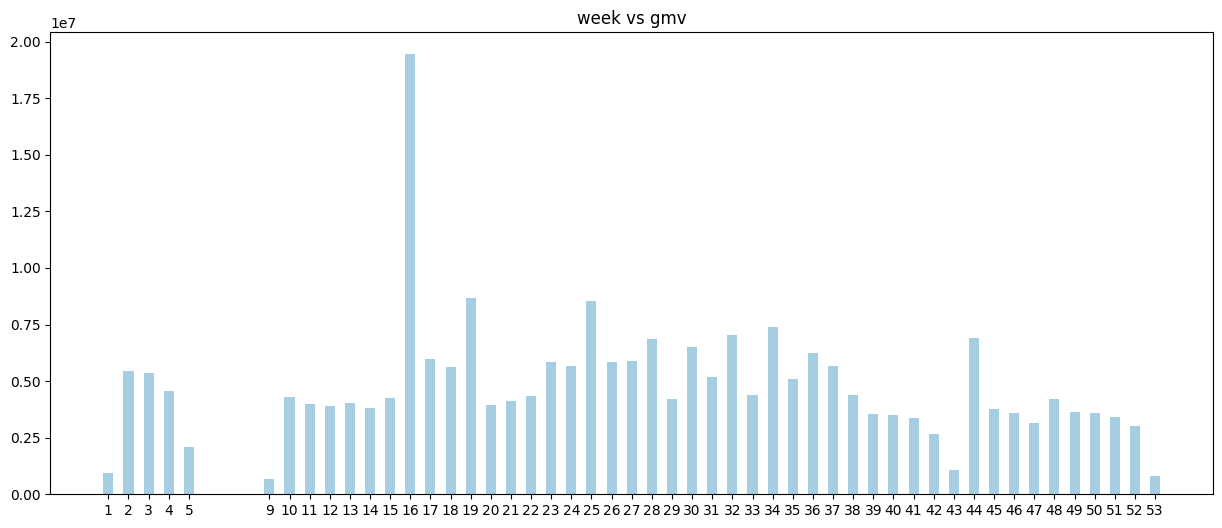

In [1597]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=ha_wk['week'],height=ha_wk['sales_per'],width=width)
plt.xticks(ha_wk['week'])
plt.title('sales vs gmv')
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=ha_wk['week'],height=ha_wk['gmv'],width=width)
plt.xticks(ha_wk['week'])
plt.title('week vs gmv')
plt.show()


## sales 16 , 19, 20, 26,27,30,31, 33,34,48
## doesnt have much impact specially week 20 ,33,34 etc

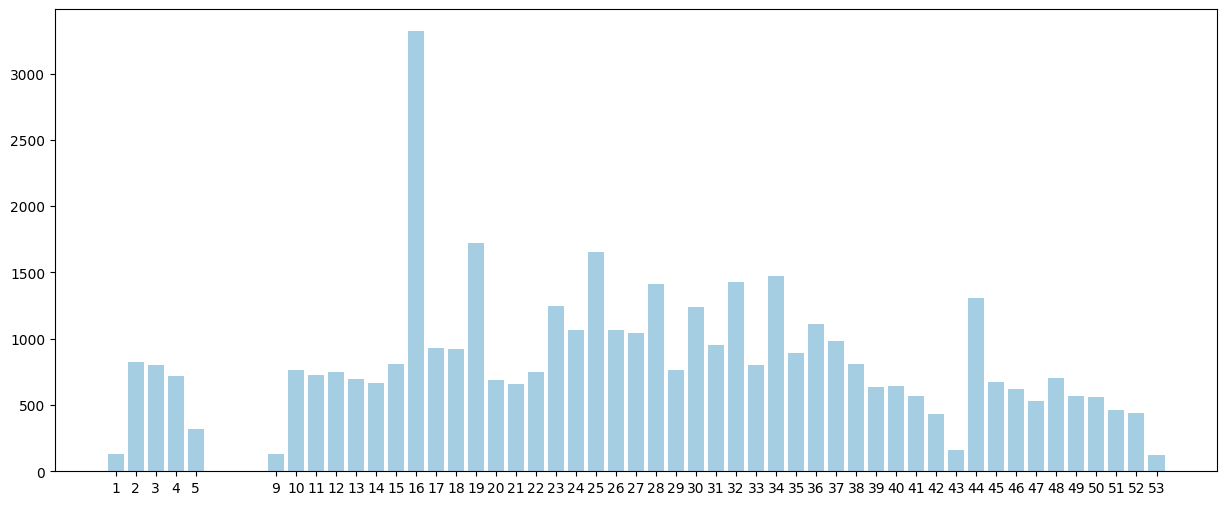

In [1598]:
plt.figure(figsize=(15,6))
plt.bar(x=ha_wk['week'],height=ha_wk['discount_per'])
plt.xticks(ha_wk['week'])
plt.show()

# 16,19,23,25,28,30,32,34,44
## impacting gmv

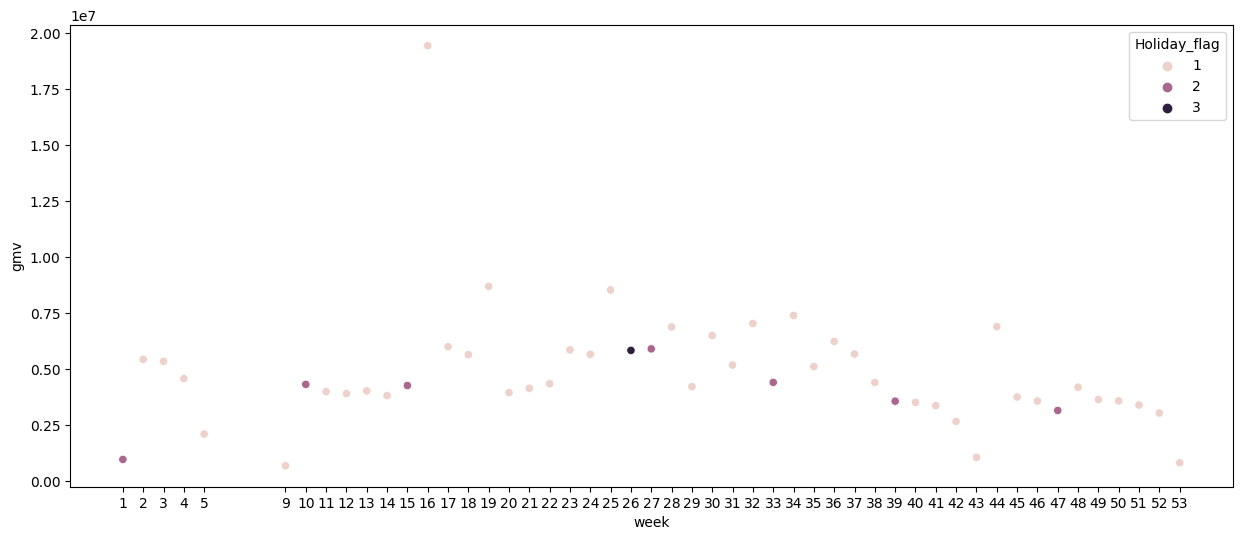

In [1599]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=ha_wk['week'],y=ha_wk['gmv'],hue=ha_wk['Holiday_flag'])
plt.xticks(ha_wk['week'])
plt.show()


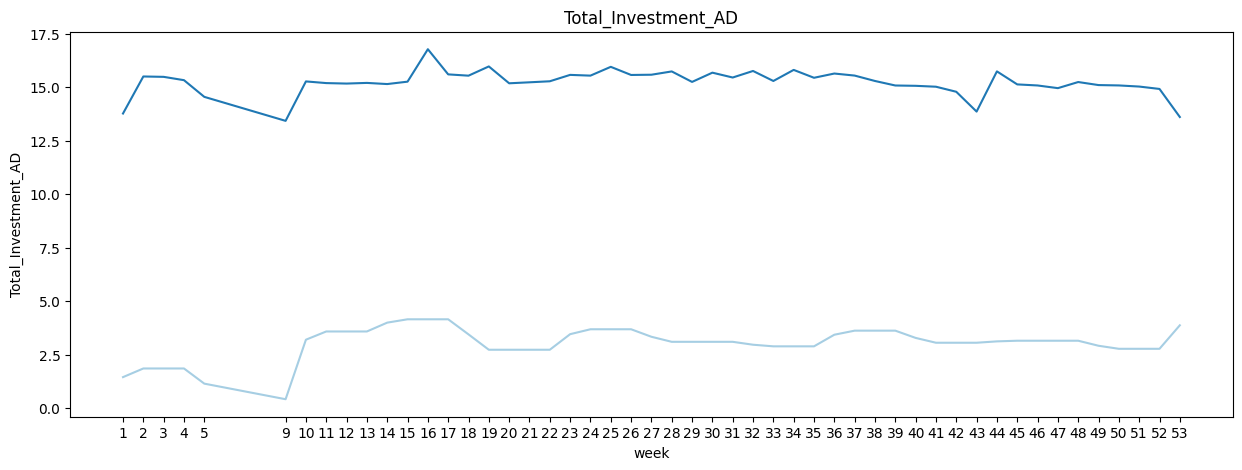

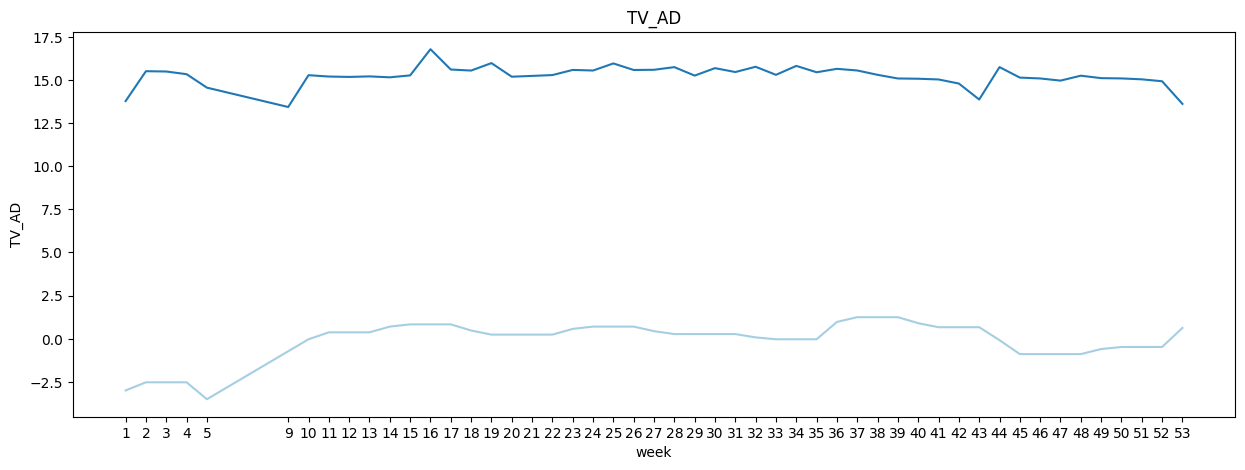

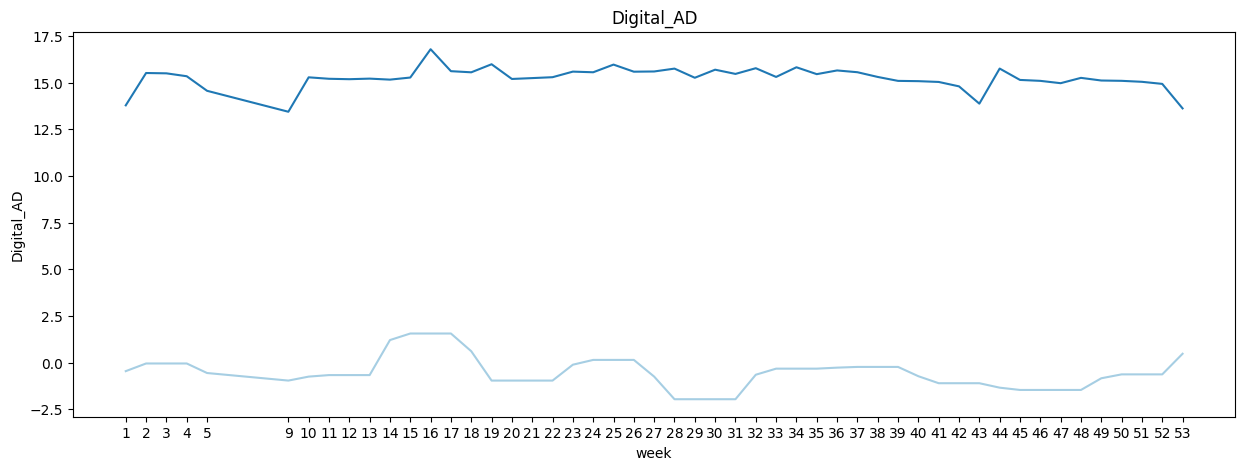

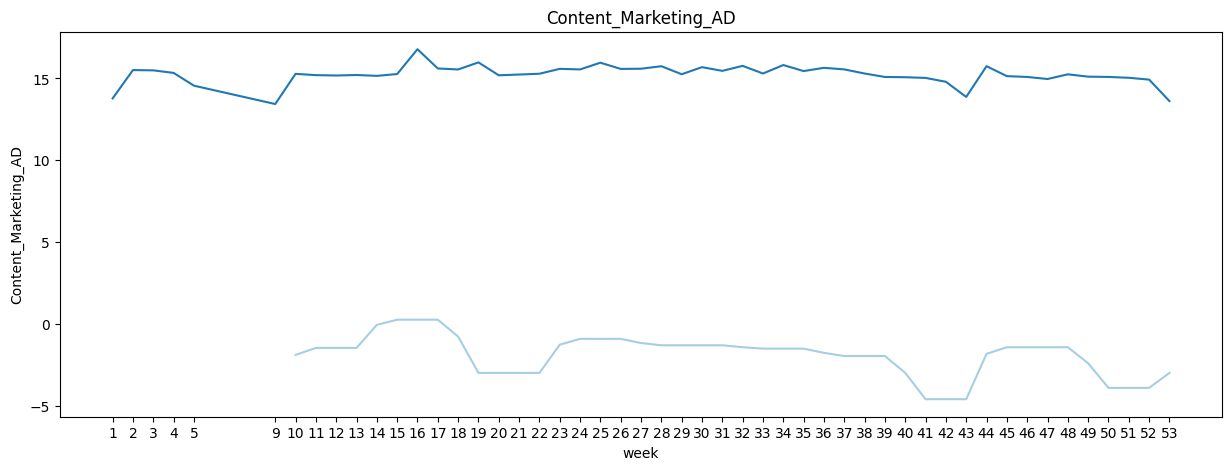

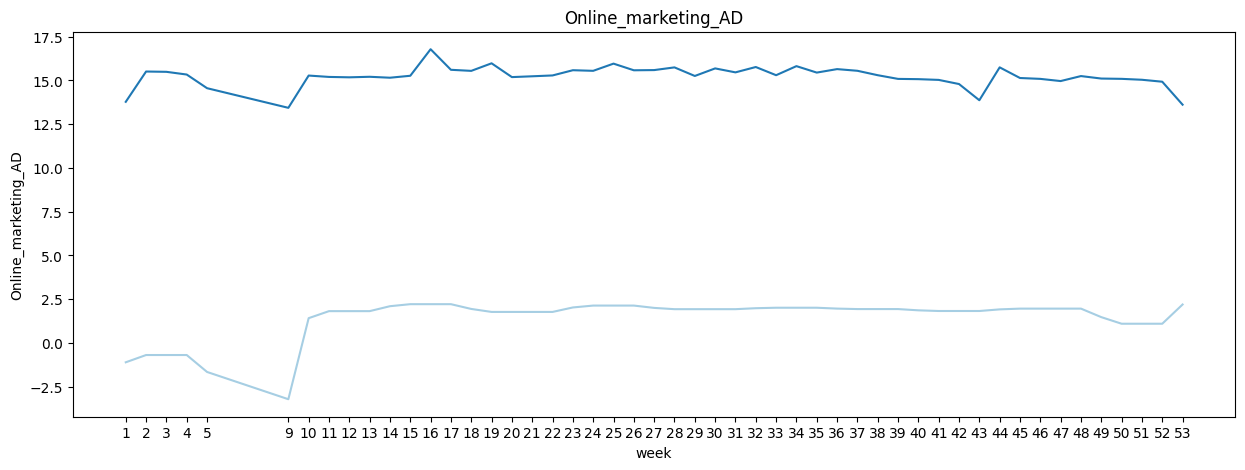

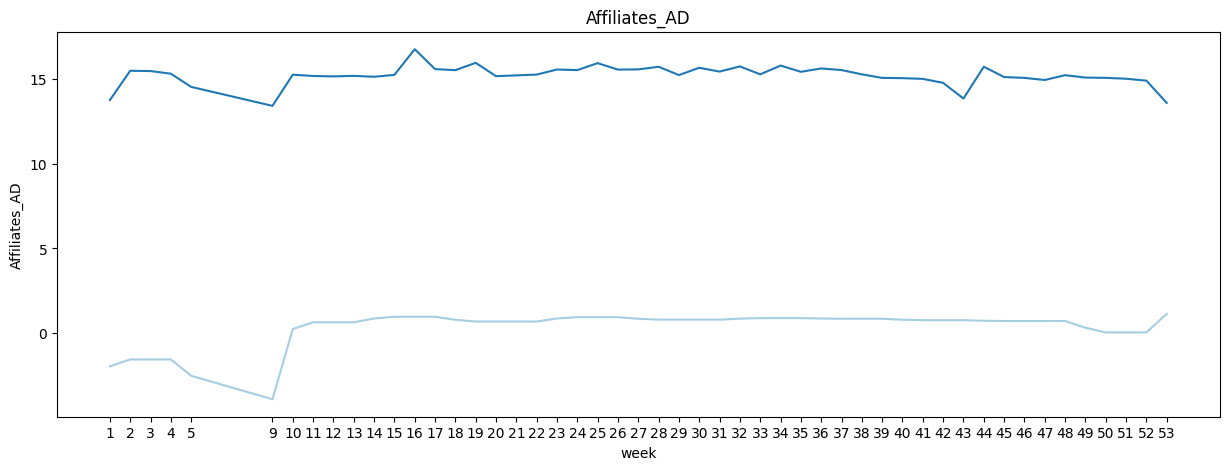

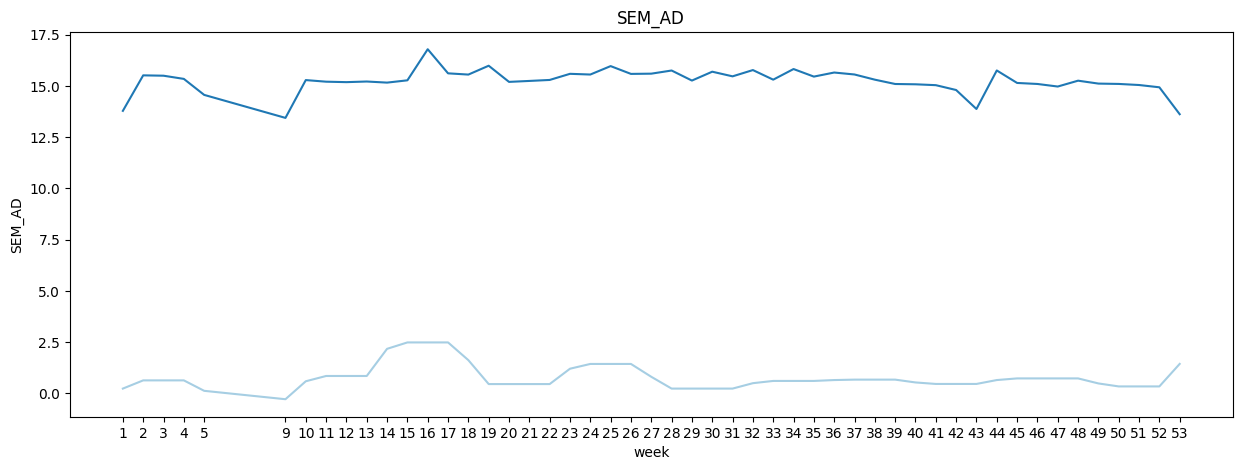

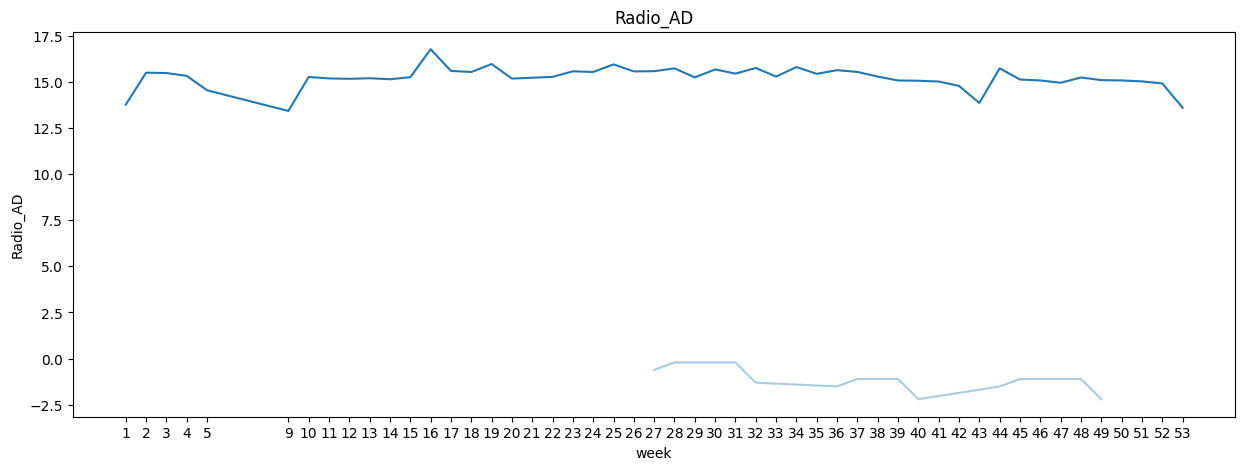

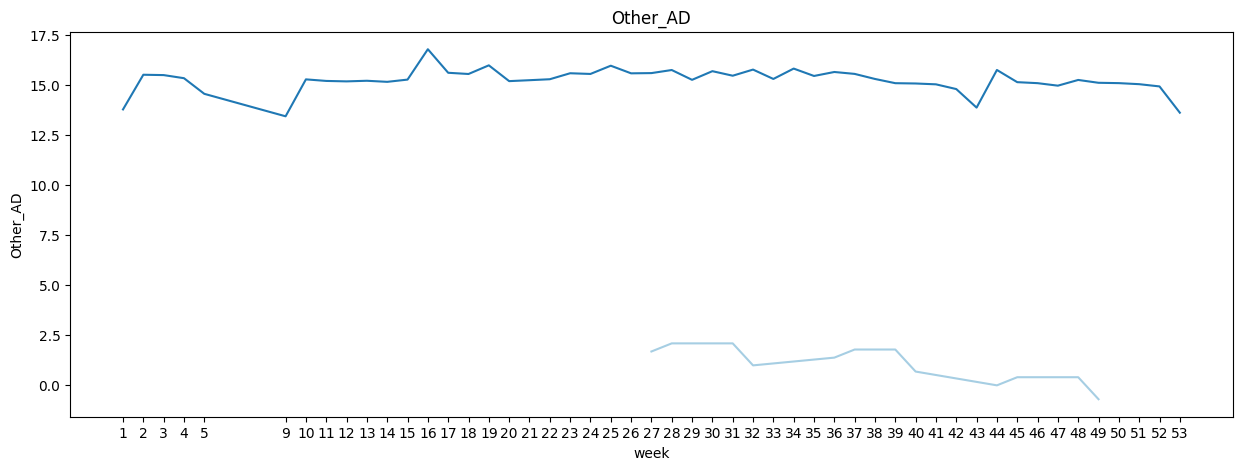

In [1600]:
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=ha_wk['week'],y=nm.log(ha_wk[i]))
    sns.lineplot(x=ha_wk['week'],y=nm.log(ha_wk['gmv']))
    plt.xticks(ha_wk['week'])
    x=x+1
    plt.show()

## radio , other , conent , digital and total : not required



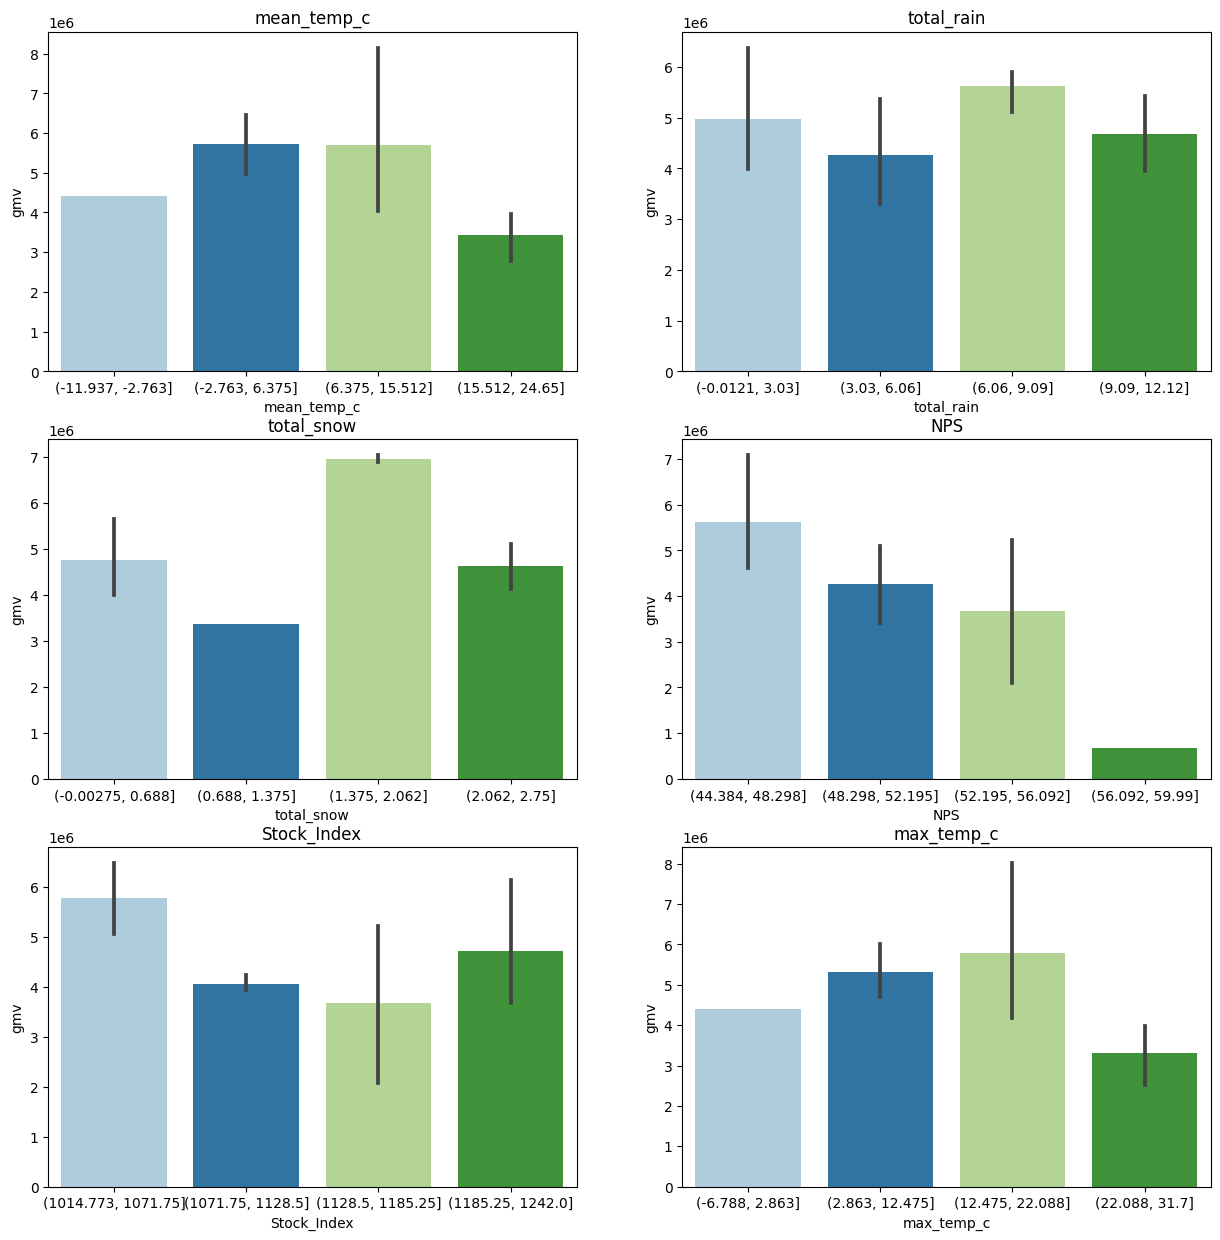

In [1601]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=ha_wk['gmv'],x=pd.cut(ha_wk[i],bins=4))
  x=x+1


# max and mean almost same impact : so max temp can be remobed

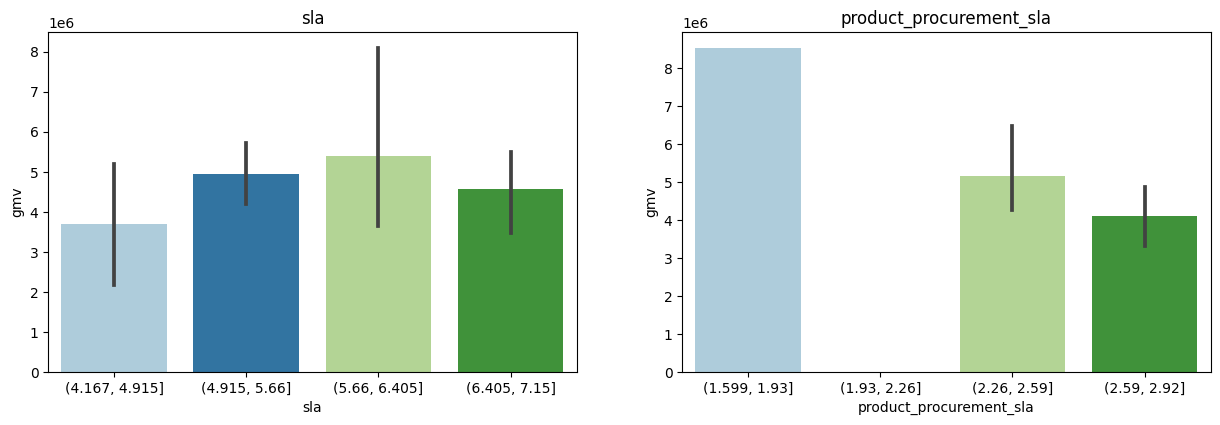

In [1602]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=ha_wk['gmv'],x=pd.cut(ha_wk[i],bins=4))
  x=x+1

## product procurement sla has a impact

In [1603]:
ha_wk.drop(["units","order_count","product_mrp"],1,inplace=True)


In [1604]:
ha_wk.drop(['Other_AD'],1,inplace=True)

In [1605]:
ha_wk.corr()[(ha_wk.corr()>0.9)|(ha_wk.corr()<-0.9)]

week       gmv  sla  product_procurement_sla  \
week                      1.0       NaN  NaN                      NaN   
gmv                       NaN  1.000000  NaN                      NaN   
sla                       NaN       NaN  1.0                      NaN   
product_procurement_sla   NaN       NaN  NaN                      1.0   
listing_price             NaN  0.999987  NaN                      NaN   
discount_per              NaN  0.985769  NaN                      NaN   
Stock_Index               NaN       NaN  NaN                      NaN   
NPS                       NaN       NaN  NaN                      NaN   
pay_day_in_wk             NaN       NaN  NaN                      NaN   
Holiday_flag              NaN       NaN  NaN                      NaN   
fmradio                   NaN       NaN  NaN                      NaN   
homeaudiospeaker          NaN  0.990529  NaN                      NaN   
luxury                    NaN  0.903618  NaN                      NaN   
boombox                   NaN       NaN  NaN                      NaN   
djcontroller              NaN       NaN  NaN                      NaN   
dock                      NaN       NaN  NaN                      NaN   
dockingstation            NaN       NaN  NaN                      NaN   
hifisystem                NaN       NaN  NaN                      NaN   
karaokeplayer             NaN       NaN  NaN                      NaN   
slingbox                  NaN       NaN  NaN                      NaN   
soundmixer                NaN       NaN  NaN                      NaN   
voicerecorder             NaN       NaN  NaN                      NaN   
max_temp_c                NaN       NaN  NaN                      NaN   
mean_temp_c               NaN       NaN  NaN                      NaN   
cool_deg_c                NaN       NaN  NaN                      NaN   
total_rain                NaN       NaN  NaN                      NaN   
total_snow                NaN       NaN  NaN                      NaN   
Total_Investment_AD       NaN       NaN  NaN                      NaN   
TV_AD                     NaN       NaN  NaN                      NaN   
Digital_AD                NaN       NaN  NaN                      NaN   
Content_Marketing_AD      NaN       NaN  NaN                      NaN   
Sponsorship_AD            NaN       NaN  NaN                      NaN   
Online_marketing_AD       NaN       NaN  NaN                      NaN   
Affiliates_AD             NaN       NaN  NaN                      NaN   
SEM_AD                    NaN       NaN  NaN                      NaN   
Radio_AD                  NaN       NaN  NaN                      NaN   
cod_per                   NaN       NaN  NaN                      NaN   
sales_per                 NaN       NaN  NaN                      NaN   

                         listing_price  discount_per  Stock_Index  NPS  \
week                               NaN           NaN          NaN  NaN   
gmv                           0.999987      0.985769          NaN  NaN   
sla                                NaN           NaN          NaN  NaN   
product_procurement_sla            NaN           NaN          NaN  NaN   
listing_price                 1.000000      0.985750          NaN  NaN   
discount_per                  0.985750      1.000000          NaN  NaN   
Stock_Index                        NaN           NaN          1.0  NaN   
NPS                                NaN           NaN          NaN  1.0   
pay_day_in_wk                      NaN           NaN          NaN  NaN   
Holiday_flag                       NaN           NaN          NaN  NaN   
fmradio                            NaN           NaN          NaN  NaN   
homeaudiospeaker              0.990566      0.994179          NaN  NaN   
luxury                        0.903003           NaN          NaN  NaN   
boombox                            NaN           NaN          NaN  NaN   
djcontroller                       NaN           NaN          NaN  

In [1606]:
ha_wk.drop(['listing_price','SEM_AD'],1,inplace=True)

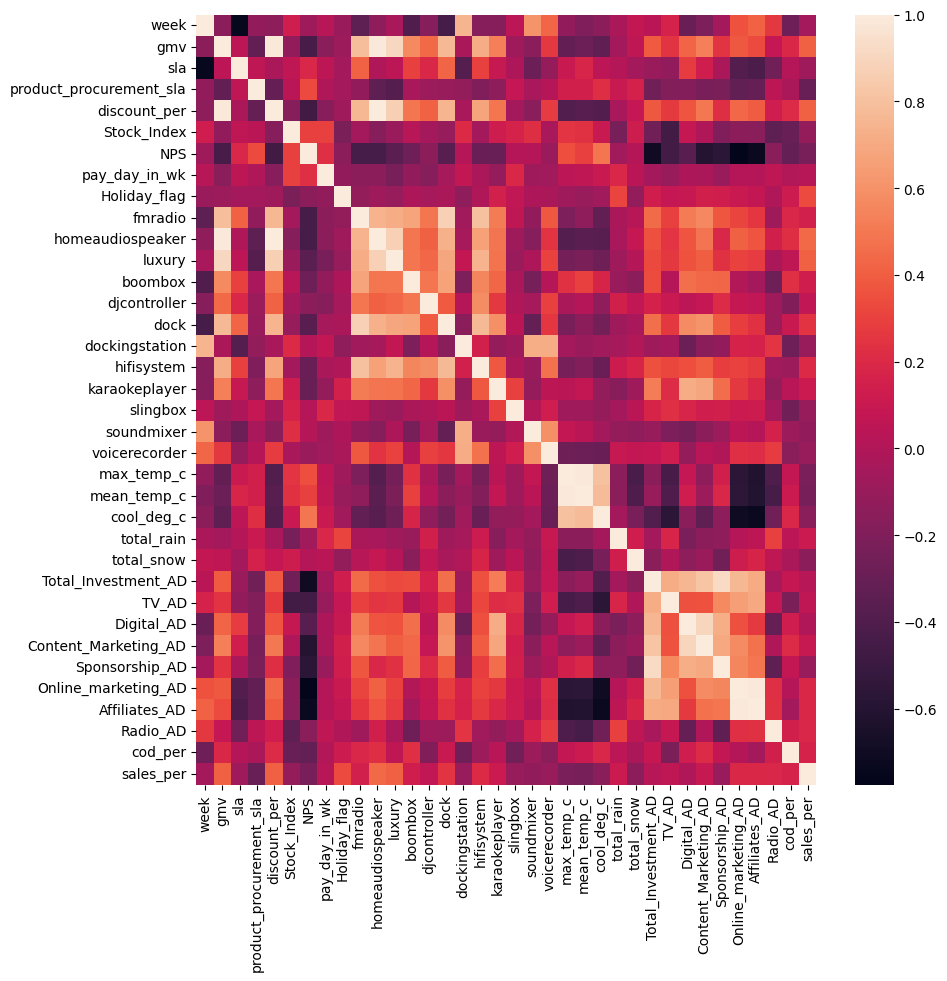

In [1607]:
plt.figure(figsize=(10,10))
sns.heatmap(ha_wk.corr())
plt.show()
# camera

In [1608]:
ha_wk.drop(['max_temp_c','NPS','Total_Investment_AD'],1,inplace=True)

In [1609]:
ha_wk.drop(['dock','fmradio','dockingstation'],1,inplace=True)## avg revenue generation is less hence can be skipped
ha_wk.drop(['Affiliates_AD','total_snow'],1,inplace=True)


In [1765]:

df_train, df_test = train_test_split(ha_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)

# print(selector.support_)
# print(selector.ranking_)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features



Index(['sla', 'product_procurement_sla', 'discount_per', 'homeaudiospeaker',
       'luxury', 'boombox', 'djcontroller', 'hifisystem', 'voicerecorder',
       'mean_temp_c', 'cool_deg_c', 'Digital_AD', 'Content_Marketing_AD',
       'cod_per', 'sales_per'],
      dtype='object')

In [1771]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso


In [1795]:
from sklearn.linear_model import Ridge

ridge = Ridge()
x=ridge.fit(X_train, y_train)

In [1798]:
x.Parameters_

AttributeError: ignored

In [1782]:
search.fit(X_train,y_train)


Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.002 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.037 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.002 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.003 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.028 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.007 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.058 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.005 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.010 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.050 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.007 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [1783]:
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_

In [1789]:
importance = np.abs(coefficients)
importance

search.best_estimator_.named_steps['model']

Lasso(alpha=0.1)

In [1790]:
np.array[importance > 0]

TypeError: ignored

In [1611]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     809.3
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.15e-23
Time:                        12:04:14   Log-Likelihood:                 127.96
No. Observations:                  35   AIC:                            -223.9
Df Residuals:                      19   BIC:                            -199.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
3          homeaudiospeaker  514.03
1              discount_per  464.54
13      Online_marketing_AD   40.79
11     Content_Marketing_AD   36.26
4                    luxury   27.34
10               Digital_AD   25.92
12           Sponsorship_AD   15.89
7                hifisystem   15.07
0   product_procurement_sla   12.12
5                   boombox   11.82
9                     TV_AD   11.17
6              djcontroller    7.27
8             karaokeplayer    4.59
14                sales_per    2.50
2             pay_day_in_wk    2.42

In [1612]:
features=features.drop('homeaudiospeaker',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     402.3
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.41e-21
Time:                        12:04:14   Log-Likelihood:                 113.66
No. Observations:                  35   AIC:                            -197.3
Df Residuals:                      20   BIC:                            -174.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
12      Online_marketing_AD  39.07
10     Content_Marketing_AD  35.43
3                    luxury  26.91
1              discount_per  25.12
9                Digital_AD  23.07
6                hifisystem  13.92
11           Sponsorship_AD  11.98
0   product_procurement_sla  11.47
8                     TV_AD  10.90
4                   boombox  10.44
5              djcontroller   6.72
7             karaokeplayer   4.57
13                sales_per   2.31
2             pay_day_in_wk   2.26

In [1613]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     454.8
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.10e-22
Time:                        12:04:14   Log-Likelihood:                 113.66
No. Observations:                  35   AIC:                            -199.3
Df Residuals:                      21   BIC:                            -177.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
9      Content_Marketing_AD  29.75
11      Online_marketing_AD  28.20
3                    luxury  26.42
1              discount_per  25.04
8                Digital_AD  20.19
6                hifisystem  13.54
0   product_procurement_sla  11.41
10           Sponsorship_AD  10.22
4                   boombox   9.06
5              djcontroller   6.68
7             karaokeplayer   4.40
12                sales_per   2.30
2             pay_day_in_wk   2.16

In [1614]:
features=features.drop('pay_day_in_wk',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     501.6
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           6.42e-24
Time:                        12:04:14   Log-Likelihood:                 113.16
No. Observations:                  35   AIC:                            -200.3
Df Residuals:                      22   BIC:                            -180.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
8      Content_Marketing_AD  29.14
10      Online_marketing_AD  28.17
1              discount_per  25.04
2                    luxury  22.80
7                Digital_AD  20.16
0   product_procurement_sla  11.20
5                hifisystem   9.92
9            Sponsorship_AD   9.89
3                   boombox   9.05
4              djcontroller   6.61
6             karaokeplayer   4.32
11                sales_per   2.17

In [1615]:
features=features.drop('hifisystem',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     496.2
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.32e-24
Time:                        12:04:14   Log-Likelihood:                 110.68
No. Observations:                  35   AIC:                            -197.4
Df Residuals:                      23   BIC:                            -178.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
7      Content_Marketing_AD  28.92
9       Online_marketing_AD  27.51
1              discount_per  24.64
6                Digital_AD  20.13
2                    luxury  17.68
0   product_procurement_sla  11.13
8            Sponsorship_AD   9.46
3                   boombox   8.61
4              djcontroller   5.56
5             karaokeplayer   3.99
10                sales_per   2.06

In [1616]:
features=features.drop('djcontroller',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     537.5
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.07e-25
Time:                        12:04:14   Log-Likelihood:                 109.67
No. Observations:                  35   AIC:                            -197.3
Df Residuals:                      24   BIC:                            -180.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
6     Content_Marketing_AD  28.56
8      Online_marketing_AD  27.40
1             discount_per  22.95
5               Digital_AD  19.80
2                   luxury  17.66
0  product_procurement_sla  10.70
7           Sponsorship_AD   8.50
3                  boombox   8.07
4            karaokeplayer   3.93
9                sales_per   2.05

In [1617]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     614.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           4.81e-27
Time:                        12:04:14   Log-Likelihood:                 109.45
No. Observations:                  35   AIC:                            -198.9
Df Residuals:                      25   BIC:                            -183.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1             discount_per  21.10
7      Online_marketing_AD  16.00
2                   luxury  13.38
6           Sponsorship_AD   8.43
0  product_procurement_sla   8.15
3                  boombox   8.06
5               Digital_AD   4.03
4            karaokeplayer   3.54
8                sales_per   2.05

In [1618]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     712.1
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.94e-28
Time:                        12:04:14   Log-Likelihood:                 109.29
No. Observations:                  35   AIC:                            -200.6
Df Residuals:                      26   BIC:                            -186.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1             discount_per  21.09
7      Online_marketing_AD  14.32
2                   luxury  12.84
0  product_procurement_sla   7.76
6           Sponsorship_AD   7.68
3                  boombox   7.67
5               Digital_AD   4.01
4            karaokeplayer   3.51

In [1619]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     823.8
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           9.01e-30
Time:                        12:04:14   Log-Likelihood:                 108.84
No. Observations:                  35   AIC:                            -201.7
Df Residuals:                      27   BIC:                            -189.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1             discount_per  14.44
2                   luxury  12.74
3                  boombox   5.82
0  product_procurement_sla   5.42
6           Sponsorship_AD   4.54
5               Digital_AD   3.99
4            karaokeplayer   3.29

In [1620]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     883.5
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.45e-30
Time:                        12:04:14   Log-Likelihood:                 106.74
No. Observations:                  35   AIC:                            -199.5
Df Residuals:                      28   BIC:                            -188.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0205      0.006      3.

Features    VIF
1          luxury  12.72
0    discount_per  12.38
5  Sponsorship_AD   4.54
2         boombox   4.25
4      Digital_AD   3.99
3   karaokeplayer   2.26

In [1621]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
ha_features1=features

ha_mode1=lm

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              2131.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                    5.61e-37
Time:                        12:04:14   Log-Likelihood:                          101.26
No. Observations:                  35   AIC:                                     -190.5
Df Residuals:                      29   BIC:                                     -181.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

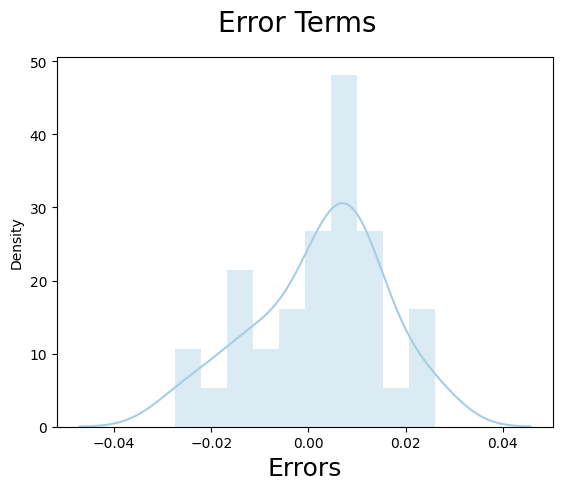

Text(0, 0.5, 'y_pred')

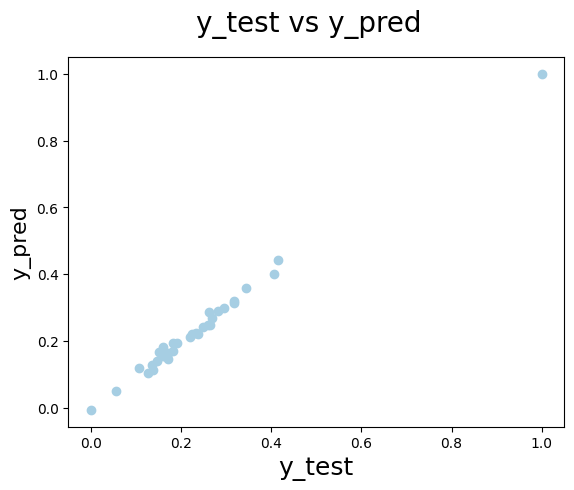

In [1622]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


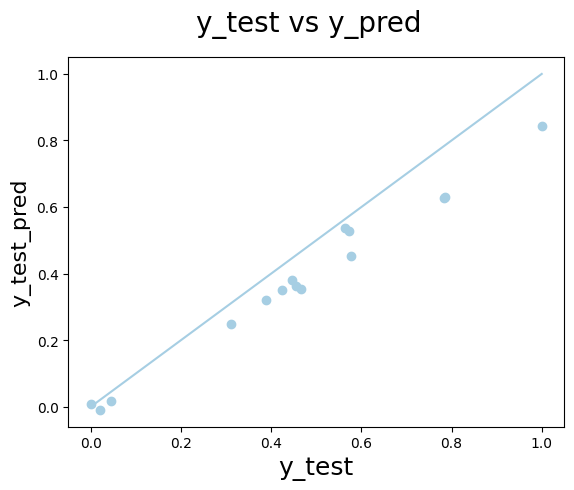

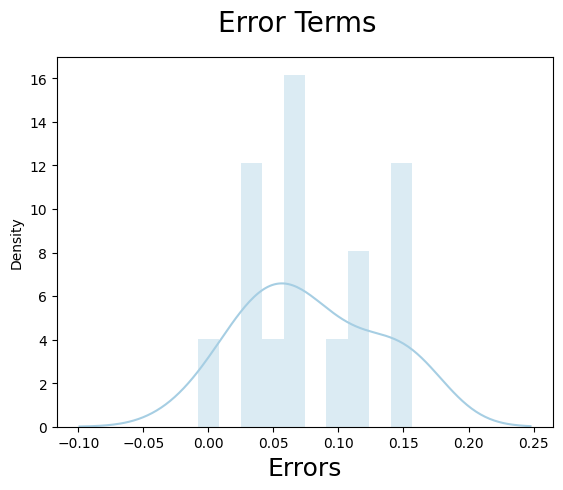

In [1623]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


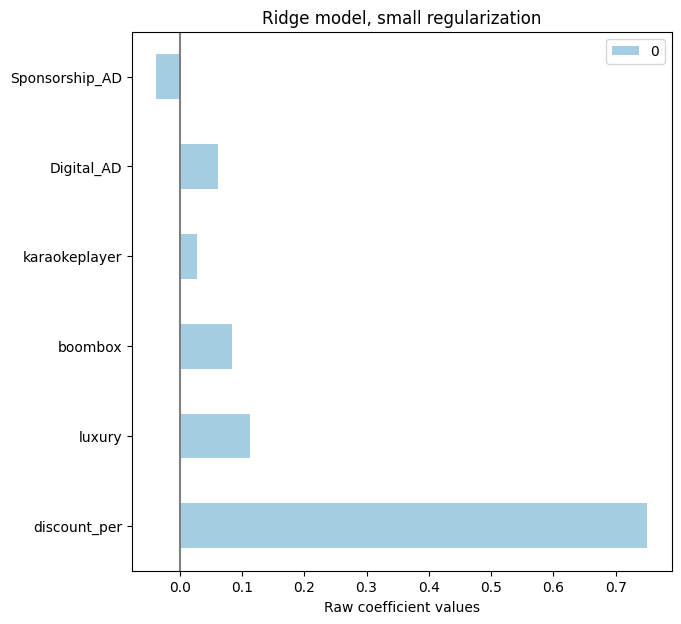

In [1624]:
ha_model1=pd.DataFrame(ha_mode1.params)
ha_model1.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

Multiplicative

In [1625]:
ha_wk[ha_wk.columns]=nm.log(ha_wk[ha_wk.columns])

ha_wk=ha_wk.replace([nm.inf, -nm.inf], 0)
ha_wk=ha_wk.fillna(0)

# ha_wk.drop(['product_mrp','order_count','Other_AD','units'],1,inplace=True)

In [1626]:
df_train, df_test = train_test_split(ha_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()
scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train


In [1627]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)

df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['sla', 'product_procurement_sla', 'discount_per', 'homeaudiospeaker',
       'luxury', 'boombox', 'djcontroller', 'hifisystem', 'voicerecorder',
       'mean_temp_c', 'cool_deg_c', 'Digital_AD', 'Content_Marketing_AD',
       'cod_per', 'sales_per'],
      dtype='object')

In [1628]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     332.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           9.74e-20
Time:                        12:04:15   Log-Likelihood:                 112.74
No. Observations:                  35   AIC:                            -193.5
Df Residuals:                      19   BIC:                            -168.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
2              discount_per  1082.42
3          homeaudiospeaker  1017.66
13                  cod_per    59.00
4                    luxury    37.40
12     Content_Marketing_AD    35.02
7                hifisystem    28.73
5                   boombox    21.16
1   product_procurement_sla    18.92
0                       sla    14.25
9               mean_temp_c    13.02
8             voicerecorder    10.67
11               Digital_AD     9.53
14                sales_per     7.17
6              djcontroller     5.36
10               cool_deg_c     5.28

In [1629]:
features=features.drop('homeaudiospeaker',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     125.1
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.54e-16
Time:                        12:04:15   Log-Likelihood:                 93.665
No. Observations:                  35   AIC:                            -157.3
Df Residuals:                      20   BIC:                            -134.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
2              discount_per  109.14
12                  cod_per   57.33
3                    luxury   36.91
11     Content_Marketing_AD   34.99
6                hifisystem   28.63
4                   boombox   21.13
1   product_procurement_sla   18.89
0                       sla   14.22
8               mean_temp_c   12.93
7             voicerecorder   10.46
10               Digital_AD    9.49
13                sales_per    7.09
5              djcontroller    5.28
9                cool_deg_c    4.65

In [1630]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     139.2
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.44e-17
Time:                        12:04:15   Log-Likelihood:                 93.389
No. Observations:                  35   AIC:                            -158.8
Df Residuals:                      21   BIC:                            -137.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2              discount_per  83.89
3                    luxury  36.83
11     Content_Marketing_AD  34.97
6                hifisystem  28.21
4                   boombox  20.84
1   product_procurement_sla  16.61
0                       sla  13.51
8               mean_temp_c  12.93
7             voicerecorder  10.29
10               Digital_AD   9.43
12                sales_per   6.78
5              djcontroller   4.96
9                cool_deg_c   4.30

In [1631]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     158.0
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.88e-18
Time:                        12:04:15   Log-Likelihood:                 93.389
No. Observations:                  35   AIC:                            -160.8
Df Residuals:                      22   BIC:                            -140.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2              discount_per  46.02
6                hifisystem  23.30
3                    luxury  21.36
4                   boombox  20.13
1   product_procurement_sla  16.60
8               mean_temp_c  12.06
7             voicerecorder  10.28
0                       sla   9.33
10               Digital_AD   7.11
11                sales_per   6.31
5              djcontroller   4.93
9                cool_deg_c   3.30

In [1632]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     180.0
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.36e-19
Time:                        12:04:16   Log-Likelihood:                 93.378
No. Observations:                  35   AIC:                            -162.8
Df Residuals:                      23   BIC:                            -144.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2              discount_per  43.29
6                hifisystem  23.16
4                   boombox  19.91
3                    luxury  19.04
1   product_procurement_sla  15.84
8               mean_temp_c  10.60
7             voicerecorder   9.96
0                       sla   9.23
10               Digital_AD   6.98
5              djcontroller   4.92
9                cool_deg_c   3.22

In [1633]:
features=features.drop('hifisystem',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           9.42e-21
Time:                        12:04:16   Log-Likelihood:                 93.334
No. Observations:                  35   AIC:                            -164.7
Df Residuals:                      24   BIC:                            -147.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2             discount_per  42.34
4                  boombox  19.12
3                   luxury  17.72
1  product_procurement_sla  15.04
7              mean_temp_c  10.58
6            voicerecorder   9.49
0                      sla   7.17
9               Digital_AD   6.98
5             djcontroller   4.20
8               cool_deg_c   2.95

In [1634]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     238.1
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           6.02e-22
Time:                        12:04:16   Log-Likelihood:                 93.298
No. Observations:                  35   AIC:                            -166.6
Df Residuals:                      25   BIC:                            -151.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0136      0.019     -0.705

Features    VIF
1   discount_per  36.14
3        boombox  19.12
2         luxury  15.73
6    mean_temp_c   9.55
5  voicerecorder   7.69
8     Digital_AD   6.87
0            sla   6.36
4   djcontroller   4.17
7     cool_deg_c   2.92

In [1635]:
features=features.drop('sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     271.1
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           4.90e-23
Time:                        12:04:16   Log-Likelihood:                 92.829
No. Observations:                  35   AIC:                            -167.7
Df Residuals:                      26   BIC:                            -153.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0090      0.018     -0.492

Features    VIF
0   discount_per  34.42
2        boombox  19.09
1         luxury  15.26
5    mean_temp_c   9.17
4  voicerecorder   7.69
7     Digital_AD   6.28
3   djcontroller   4.13
6     cool_deg_c   2.92

In [1636]:
features=features.drop('boombox',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     289.5
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.06e-23
Time:                        12:04:16   Log-Likelihood:                 91.006
No. Observations:                  35   AIC:                            -166.0
Df Residuals:                      27   BIC:                            -153.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0152      0.019     -0.814

Features    VIF
0   discount_per  24.11
1         luxury  14.70
4    mean_temp_c   8.46
3  voicerecorder   7.63
6     Digital_AD   5.56
2   djcontroller   4.04
5     cool_deg_c   2.70

In [1637]:
features=features.drop('voicerecorder',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     349.5
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           5.57e-25
Time:                        12:04:16   Log-Likelihood:                 90.965
No. Observations:                  35   AIC:                            -167.9
Df Residuals:                      28   BIC:                            -157.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0133      0.017     -0.791   

Features    VIF
0  discount_per  18.15
1        luxury  14.70
3   mean_temp_c   8.33
5    Digital_AD   5.42
2  djcontroller   4.03
4    cool_deg_c   2.70

In [1638]:
features=features.drop('djcontroller',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     418.7
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           4.25e-26
Time:                        12:04:16   Log-Likelihood:                 90.333
No. Observations:                  35   AIC:                            -168.7
Df Residuals:                      29   BIC:                            -159.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0120      0.017     -0.714   

Features    VIF
0  discount_per  16.06
1        luxury  14.70
2   mean_temp_c   7.29
4    Digital_AD   5.20
3    cool_deg_c   2.60

In [1639]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     535.8
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.99e-27
Time:                        12:04:16   Log-Likelihood:                 90.153
No. Observations:                  35   AIC:                            -170.3
Df Residuals:                      30   BIC:                            -162.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0073      0.014     -0.509   

Features    VIF
0  discount_per  15.58
1        luxury  14.70
3    Digital_AD   3.85
2    cool_deg_c   1.25

In [1640]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
ha_model2=lm
ha_features2=features

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              6689.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                    5.01e-45
Time:                        12:04:16   Log-Likelihood:                          90.002
No. Observations:                  35   AIC:                                     -172.0
Df Residuals:                      31   BIC:                                     -165.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

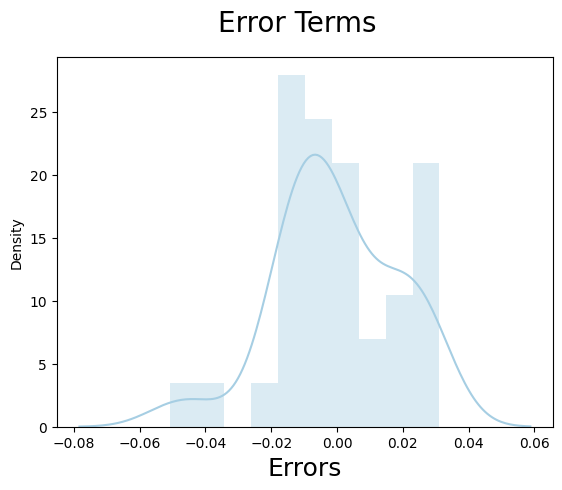

Text(0, 0.5, 'y_pred')

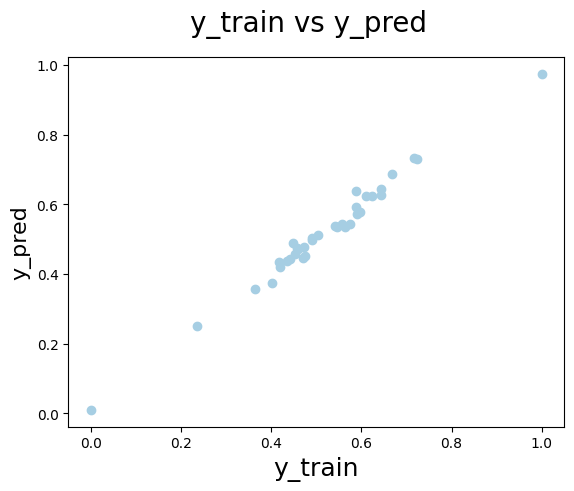

In [1641]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


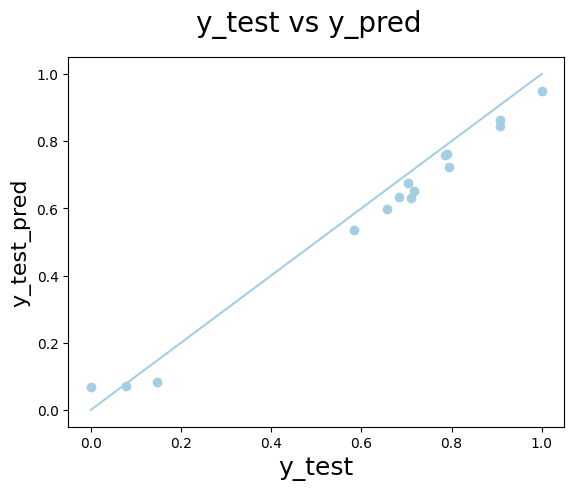

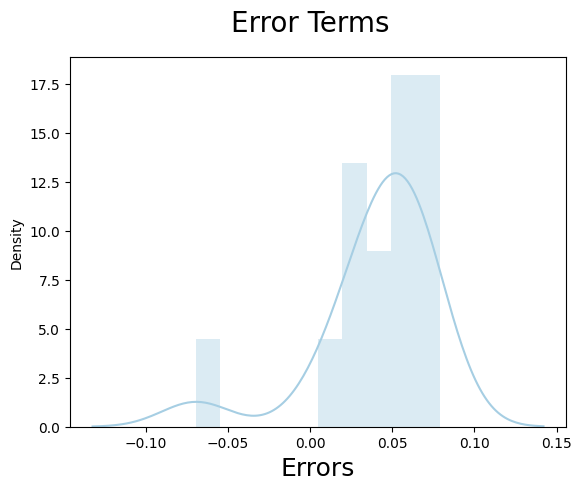

In [1642]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]

y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


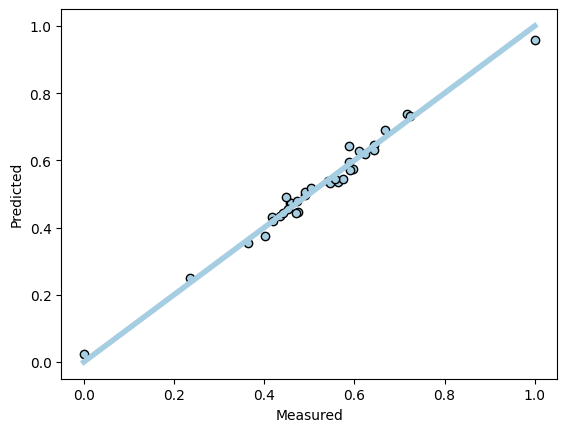

array([0.99062097, 0.96484186, 0.98943404, 0.96881212, 0.86442163])

In [1643]:
f = KFold(n_splits = 5, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)

y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

scores

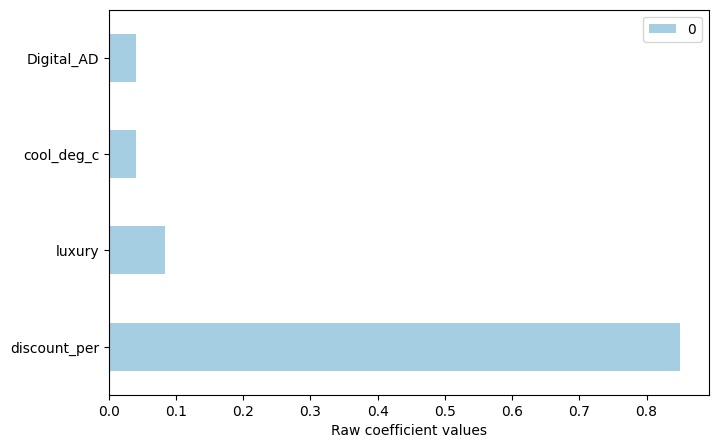

In [1645]:
ha_model2=pd.DataFrame(ha_model2.params)
ha_model2.plot.barh(figsize=(10, 5))
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

Gaming Accessories

In [ ]:
game=EleData3[EleData3.product_analytic_sub_category=='gamingaccessory']
# game.discount_per


In [ ]:
# game.columns
game_dum=pd.get_dummies(game.product_analytic_vertical)
game=pd.concat([game,game_dum],axis=1)

In [ ]:
for i in num:
  sns.boxplot(x=ha[i])
  plt.title(i)
  plt.show()

In [ ]:


# q1=game['product_mrp'].quantile(0.25)
# q3=game['product_mrp'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# game.loc[game['product_mrp']>up,'product_mrp']=up
# game.loc[game['product_mrp']<lw,'product_mrp']=lw


# q1=game['gmv'].quantile(0.25)
# q3=game['gmv'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# game.loc[game['gmv']>up,'gmv']=up
# game.loc[game['gmv']<lw,'gmv']=lw


# q1=game['listing_price'].quantile(0.25)
# q3=game['listing_price'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# game.loc[game['listing_price']>up,'listing_price']=up
# game.loc[game['listing_price']<lw,'listing_price']=lw


# q1=game['discount_per'].quantile(0.25)
# q3=game['discount_per'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# game.loc[game['discount_per']>up,'discount_per']=up
# game.loc[game['discount_per']<lw,'discount_per']=lw

# game[game['discount_per']>1.39]
q1=game['sla'].quantile(0.25)
q3=game['sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['sla']>up,'sla']=up
game.loc[game['sla']<lw,'sla']=lw
q1=game['product_procurement_sla'].quantile(0.25)
q3=game['product_procurement_sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['product_procurement_sla']>up,'product_procurement_sla']=up
game.loc[game['product_procurement_sla']<lw,'product_procurement_sla']=lw


In [ ]:
game.columns

In [ ]:
revenue_avg=pd.DataFrame(game.groupby('product_analytic_vertical').agg(nums=('order_item_id', 'count'),rev=('gmv', nm.sum))).reset_index()

In [ ]:
revenue_avg['avg']=revenue_avg.rev/revenue_avg.nums
plt.figure(figsize=(10,3))
sns.barplot(x=revenue_avg.product_analytic_vertical,y=revenue_avg.nums)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10,3))
plt.title("Product Type vs Revenue")
sns.barplot(x=revenue_avg.product_analytic_vertical,y=revenue_avg.rev)
plt.xticks(rotation=45)
plt.show()

## highest selling products : gamepad,gamingheadset and gamingmouse
##  High avg reveue generating products : motioncotroller,joystickgamingwheel,gamingcontrolmount

In [ ]:
game_wk=game.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique",'luxury':"sum", 'coolingpad':"sum",
                                    'gamecontrolmount':"sum", 'gamepad':"sum", 'gamingaccessorykit':"sum", 'gamingadapter':"sum",
                                    'gamingchargingstation':"sum", 'gamingheadset':"sum", 'gamingkeyboard':"sum",
                                    'gamingmemorycard':"sum", 'gamingmouse':"sum", 'gamingmousepad':"sum", 'gamingspeaker':"sum",
                                    'joystickgamingwheel':"sum", 'motioncontroller':"sum", 'tvoutcableaccessory':"sum"}).round(2)

game_wk=pd.merge(game_wk,weekly_kpis,on='week')

game_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

# game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
      #  'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day'],1,inplace=True)

game_wk.order_payment_type.value_counts()
game_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
game_wk["cod_per"]=game_wk["order_payment_cod"]/game_wk["order_count"]
game_wk.drop("order_payment_cod",1,inplace=True)
game_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)

game_wk['sales_per']=(game_wk['num_of_sales']-1)/7
game_wk.drop('num_of_sales',1,inplace=True)

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=game_wk['week'],y=game_wk['gmv'])
plt.title("Week vs GMV")
plt.show()
## 16 , 19, 20, 34, 36, 44

In [ ]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=game_wk['week'],height=game_wk['sales_per'],width=width)
plt.xticks(game_wk['week'])
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=game_wk['week'],height=game_wk['gmv'],width=width)
plt.xticks(game_wk['week'])
plt.show()


## sales per as impact

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(x=game_wk['week'],height=game_wk['discount_per'])
plt.xticks(game_wk['week'])
plt.show()

## not very much changes because of discount


In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=game_wk['week'],y=game_wk['gmv'],hue=game_wk['Holiday_flag'])
plt.xticks(game_wk['week'])
plt.show()


In [ ]:
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=game_wk['week'],y=nm.log(game_wk[i]))
    sns.lineplot(x=game_wk['week'],y=nm.log(game_wk['gmv']))
    plt.xticks(game_wk['week'])
    x=x+1
    plt.show()

## affiliates , digital and other and total


In [ ]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=game_wk['gmv'],x=pd.cut(game_wk[i],bins=4))
  x=x+1

  ## max temp can be kept


In [ ]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=game_wk['gmv'],x=pd.cut(game_wk[i],bins=6))
  x=x+1

## sla not required

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(game_wk.corr())

In [ ]:
game_wk.drop(['order_count','units','Other_AD','product_mrp','listing_price','max_temp_c','Other_AD','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio','week','Other_AD','Affiliates_AD'],1,inplace=True)


In [ ]:

plt.figure(figsize=(15, 15))
sns.heatmap(game_wk.corr())

In [ ]:
game_wk.drop(['Total_Investment_AD','cool_deg_c','tvoutcableaccessory','gamingheadset'],1,inplace=True)

In [ ]:
df_train, df_test = train_test_split(game_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']


In [ ]:
X_train.columns


In [ ]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=20, step=1)
selector.fit(X_train, y_train)


In [ ]:
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


In [ ]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])

In [ ]:
features=features.drop('discount_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

In [ ]:
features=features.drop('gamingaccessorykit',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

In [ ]:
features=features.drop('gamingspeaker',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('Holiday_flag',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])
#

In [ ]:
features=features.drop('gamingadapter',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('coolingpad',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('gamingmousepad',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('Sponsorship_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('motioncontroller',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('luxury',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


In [ ]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


In [ ]:
y_test

In [ ]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# multiplicative
game_wk[game_wk.columns]=nm.log(game_wk[game_wk.columns])


In [ ]:

game_wk=game_wk.replace([nm.inf, -nm.inf], 0)
game_wk=game_wk.fillna(0)



In [ ]:
# game_wk.drop(['gamingaccessorykit','coolingpad','product_procurement_sla'],1,inplace=True)

In [ ]:
df_train, df_test = train_test_split(game_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train


In [ ]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=22, step=1)
selector.fit(X_train, y_train)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features

# tvoutcableaccessory,gamingaccessorykit,gamingadapter,coolinpad

In [ ]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])



In [ ]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('total_rain',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('gamingaccessorykit',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

In [ ]:
features=features.drop('gamingkeyboard',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('gamingmemorycard',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('gamingadapter',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('luxury',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('gamingmousepad',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('gamingmouse',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('Sponsorship_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
game_model2=lm

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)
# Plot heading
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


In [ ]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()



In [ ]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)
print(scores)


fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
game_model2=pd.DataFrame(game_model2.params)

In [ ]:
game_model2.plot.barh(figsize=(9, 7))
plt.title("Game Model")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)